In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.io import ascii

from palettable.cartocolors.qualitative import Antique_2
from matplotlib.colors import ListedColormap
import pandas as pd

cmap = ListedColormap(Antique_2.mpl_colors)
import tools_Linmix

In [3]:
def plot_line_with_shaded_area(x,beta, alpha, beta_std, alpha_std,xlabel="x",ylabel="y"):
    y = beta * x + alpha  # Calculate y values for the line

    # Calculate upper and lower bounds for the shaded area
    upper_line = (beta + beta_std) * x + (alpha + alpha_std)
    lower_line = (beta - beta_std) * x + (alpha - alpha_std)

    # Plot the line
    plt.plot(x, y, color='blue', label='Line')

    # Plot the shaded area
    plt.fill_between(x, lower_line, upper_line, color='lightblue', alpha=0.5, label='Shaded Area')

    # Add labels and legend
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


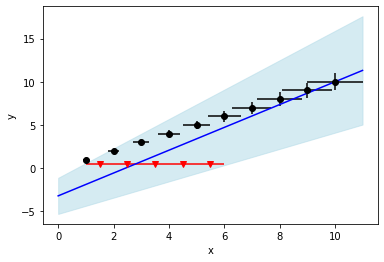

In [4]:
import tools_Linmix
%load_ext autoreload
%autoreload
x=[1,2,3,4,5,6,7,8,9,10]
y=[1,2,3,4,5,6,7,8,9,10]
dx=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
dy=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
x_uplim=[1.5,2.5,3.5,4.5,5.5]
dx_uplim=[0.5,0.5,0.5,0.5,0.5]
y_uplim=[0.5,0.5,0.5,0.5,0.5]

plt.errorbar(x,y,xerr=dx,yerr=dy,fmt='o', color='black')
plt.errorbar(x_uplim,y_uplim,xerr=dx_uplim,fmt='v', uplims=True, color='red')
plot_line_with_shaded_area(np.linspace(0,11,100),1.32,-3.2,0.38,2.09,"x","y")
plt.show()

#p=tools_Linmix.CorrelationObj(x,y,dx,dy,x_uplim=x_uplim,dx_uplim=dx_uplim,y_uplim=y_uplim)
#p.Run_linmix(silent=True)





In [5]:
Catalog=ascii.read("../../A-Catalogs/Binospec-Candels.cat")
mask=np.isnan(Catalog["EWLya"])==False
Catalog=Catalog[mask]

In [6]:
sns.set_theme(style="white",font_scale = 2.)
plt.rcParams["figure.figsize"] = (8.7,7.)

TypeMask=Catalog["Type"]=="LAE"
Muv,dMuv=Catalog["Muv"],Catalog["dMuv"]
slope,dslope=Catalog["slope"],Catalog["dslope"]
EWlya,dEWlya=Catalog["EWLya"],Catalog["dEWLya"]
FWHMLya=Catalog["LyaFWHM_int"]
dFWHMLya=Catalog["dLyaFWHM_int"]
Skewness=Catalog["Skewness"]
redshift=[]
for gal in Catalog:
    if np.isnan(gal["zsys"])==False:
        redshift.append(gal["zsys"])
    elif np.isnan(gal["z"])==False:
        redshift.append(gal["z"])
    else:
        redshift.append(gal["photoz"])
redshift=np.array(redshift)

In [7]:
list(Catalog["dLyaFWHM_int"])

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 75.18771445192469,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 116.67468887378234,
 nan,
 nan,
 65.90138901208623,
 nan,
 nan,
 nan,
 65.08426597785434,
 nan,
 46.943696001311935,
 48.42708602508563,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 18.27593206652619,
 nan,
 nan,
 nan,
 nan,
 nan,
 63.124895414037724,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 34.915516114158706,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 33.735676768323046,
 nan,
 nan,
 nan,
 72.75477261394838,
 nan,
 nan,
 nan,
 nan,
 75.02369721250422,
 nan,
 nan,
 nan,
 16.01107535372326,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 15.551437473955872,
 14.030017634169706,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 51.85575178904331,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 26.855726525220188,
 29.934374421906927,
 nan,
 nan,
 nan,
 nan,
 253.35,
 127.7866756232404,
 57.59112831789552,
 nan,
 nan,
 nan,
 17.815738027509994,
 nan,
 11.338298407267684,


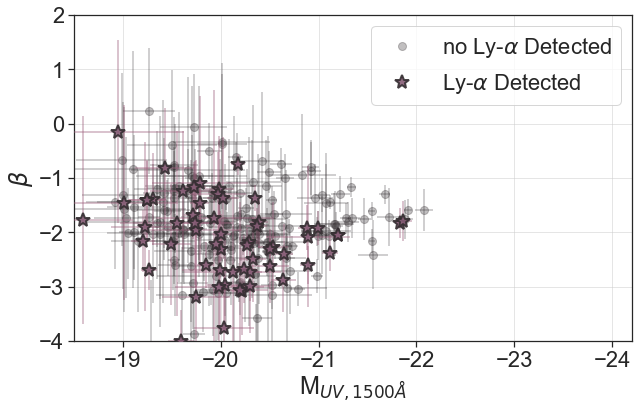

In [8]:
sns.set_theme(style="ticks",font_scale=2)
plt.rcParams["figure.figsize"] = (10,6.)

kwsLAE= dict(linewidth = 2,fmt="*",markeredgecolor="#342E31",color=cmap(0.1),alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=15,zorder=100,elinewidth=2,label=r"Ly-$\alpha$ Detected")
kwsnoLAE = dict(linewidth = 2,fmt="o",markeredgecolor="#342E31",color="#342E31",alpha=0.3\
            ,capsize=0,markeredgewidth=1,markersize=8,zorder=10,elinewidth=1.0,label=r"no Ly-$\alpha$ Detected")

#plt.axhline(y=-2.23,color="black",ls="--",alpha=0.5,lw=5)

plt.errorbar(Muv[~TypeMask],slope[~TypeMask],**kwsnoLAE)
plt.errorbar(Muv[~TypeMask],slope[~TypeMask],xerr=dMuv[~TypeMask],yerr=dslope[~TypeMask],fmt=" ",alpha=0.3,color="#342E31")
plt.errorbar(Muv[TypeMask],slope[TypeMask],**kwsLAE)
plt.errorbar(Muv[TypeMask],slope[TypeMask],xerr=dMuv[TypeMask],yerr=dslope[TypeMask],fmt=" ",color="#9e607d",alpha=0.5,zorder=99)


#plt.scatter(All[1],All[0])

plt.ylabel(r"$\beta$")
plt.xlabel(r"M$_{UV,1500\AA}$")
plt.ylim(-4,2)
plt.xlim(-18.5,-24.2)
plt.legend()
plt.grid(alpha=0.5)

plt.savefig("Figures/Beta_Muv.pdf",dpi=200,bbox_inches="tight")
plt.show()

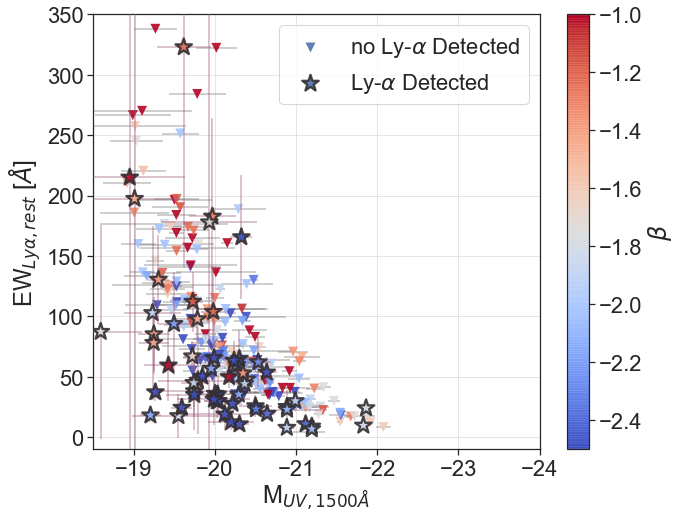

In [9]:
import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=-2.5, vmax=-1)
#cmap='plasma_r',norm=norm,c=list(z[~maskFW])
plt.rcParams["figure.figsize"] = (10,8.)
kwsLAE= dict(linewidth = 2.3,marker="*",edgecolors="#342E31",alpha=0.9,cmap='coolwarm',norm=norm,c=slope[TypeMask]\
            ,s=300,zorder=100,label=r"Ly-$\alpha$ Detected")
kwsnoLAE = dict(linewidth = 0,marker="v",edgecolors="#342E31",alpha=0.9,cmap='coolwarm',norm=norm,c=slope[~TypeMask]\
            ,s=100,zorder=10,label=r"no Ly-$\alpha$ Detected")


plt.scatter(Muv[~TypeMask],EWlya[~TypeMask],**kwsnoLAE)
plt.errorbar(Muv[~TypeMask],EWlya[~TypeMask],xerr=dMuv[~TypeMask],fmt=" ",zorder=9,alpha=0.3,color="#342E31")


sc=plt.scatter(Muv[TypeMask],EWlya[TypeMask],**kwsLAE)
plt.errorbar(Muv[TypeMask],EWlya[TypeMask],xerr=dMuv[TypeMask],yerr=dEWlya[TypeMask],fmt=" ",color="#9e607d",alpha=0.5,zorder=99)
plt.colorbar(sc,label=r"$\beta$")
plt.ylabel(r"EW$_{Ly\alpha,rest}$ [$\AA$]")
plt.xlabel(r"M$_{UV,1500\AA}$")
plt.ylim(-10,350)
plt.xlim(-18.5,-24)
plt.legend()
plt.grid(alpha=0.5)
plt.savefig("Figures/EW_Muv.pdf",dpi=200,bbox_inches="tight")
plt.show()

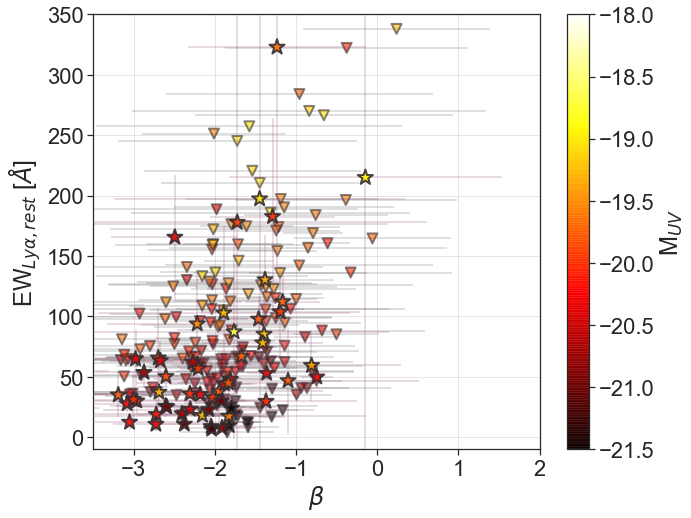

In [10]:
norm = mpl.colors.Normalize(vmin=-21.5, vmax=-18)
kwsLAE= dict(linewidth = 2,marker="*",edgecolors="#342E31",alpha=0.9,cmap='hot',norm=norm,c=Muv[TypeMask]\
            ,s=250,zorder=100,label=r"Ly-$\alpha$ Detected")
kwsnoLAE = dict(linewidth = 2,marker="v",edgecolors="#342E31",alpha=0.6,cmap='hot',norm=norm,c=Muv[~TypeMask]\
            ,s=100,zorder=10,label=r"no Ly-$\alpha$ Detected")

#plt.axvline(x=-2.23,color="black",ls="--",alpha=0.5,lw=5)
plt.scatter(slope[~TypeMask],EWlya[~TypeMask],**kwsnoLAE)
plt.errorbar(slope[~TypeMask],EWlya[~TypeMask],xerr=dslope[~TypeMask],fmt=" ",zorder=9,alpha=0.2,color="#342E31")


sc=plt.scatter(slope[TypeMask],EWlya[TypeMask],**kwsLAE)
plt.errorbar(slope[TypeMask],EWlya[TypeMask],xerr=dslope[TypeMask],yerr=dEWlya[TypeMask],fmt=" ",color="#9e607d",alpha=0.3,zorder=99)
plt.colorbar(sc,label=r"M$_{UV}$")
plt.ylabel(r"EW$_{Ly\alpha,rest}$ [$\AA$]")
plt.xlabel(r"$\beta$")
plt.ylim(-10,350)
plt.xlim(-3.5,2)
#plt.legend(loc=2,fontsize=15)
plt.grid(alpha=0.5)
plt.savefig("Figures/EW_Beta.pdf",dpi=200,bbox_inches="tight")
plt.show()

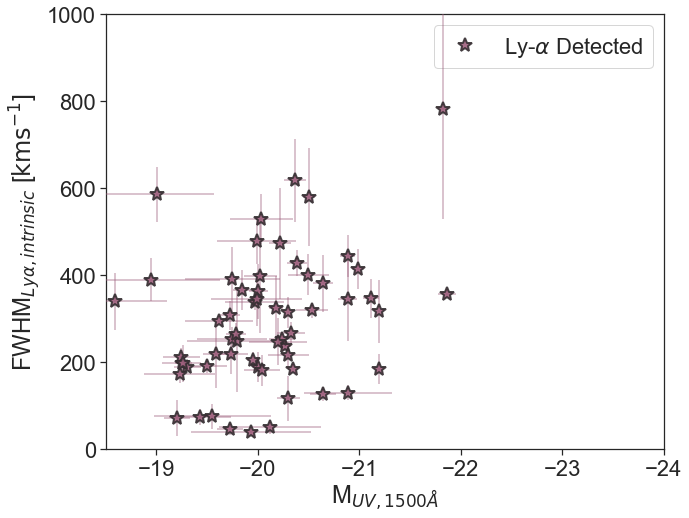

In [11]:
kwsLAE= dict(linewidth = 2,fmt="*",markeredgecolor="#342E31",color='#9e607d',alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=15,zorder=100,elinewidth=2,label=r"Ly-$\alpha$ Detected")
kwsnoLAE = dict(linewidth = 2,fmt="v",markeredgecolor="#342E31",color="#342E31",alpha=0.3\
            ,capsize=0,markeredgewidth=1,markersize=8,zorder=10,elinewidth=1.0,label=r"no Ly-$\alpha$ Detected")



plt.errorbar(Muv[TypeMask],FWHMLya[TypeMask],**kwsLAE)
plt.errorbar(Muv[TypeMask],FWHMLya[TypeMask],xerr=dMuv[TypeMask],yerr=dFWHMLya[TypeMask],fmt=" ",color="#9e607d",alpha=0.5,zorder=99)

plt.ylabel(r"FWHM$_{Ly\alpha,intrinsic}$ [$\mathrm{kms}^{-1}$]")
plt.xlabel(r"M$_{UV,1500\AA}$")
plt.ylim(0,1000)
plt.xlim(-18.5,-24)
plt.legend()
plt.savefig("Figures/FWHM_Muv.pdf",dpi=200,bbox_inches="tight")
plt.show()

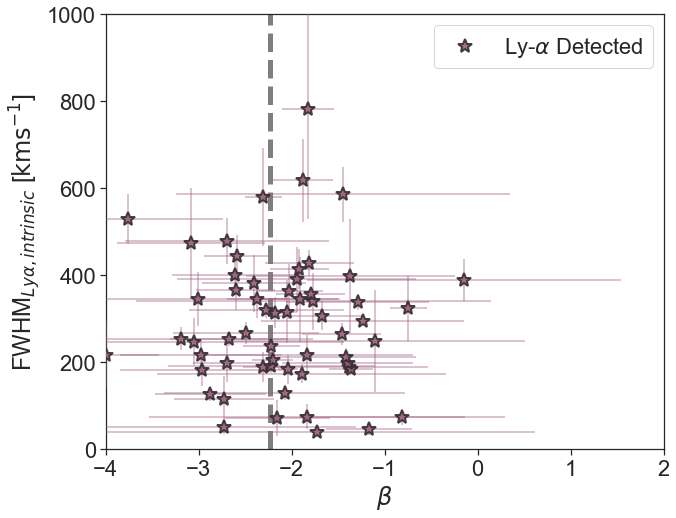

In [12]:
kwsLAE= dict(linewidth = 2,fmt="*",markeredgecolor="#342E31",color='#9e607d',alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=15,zorder=100,elinewidth=2,label=r"Ly-$\alpha$ Detected")
kwsnoLAE = dict(linewidth = 2,fmt="v",markeredgecolor="#342E31",color="#342E31",alpha=0.3\
            ,capsize=0,markeredgewidth=1,markersize=8,zorder=10,elinewidth=1.0,label=r"no Ly-$\alpha$ Detected")


plt.axvline(x=-2.23,color="black",ls="--",alpha=0.5,lw=5)
plt.errorbar(slope[TypeMask],FWHMLya[TypeMask],**kwsLAE)
plt.errorbar(slope[TypeMask],FWHMLya[TypeMask],xerr=dslope[TypeMask],yerr=dFWHMLya[TypeMask],fmt=" ",color="#9e607d",alpha=0.5,zorder=99)

plt.ylabel(r"FWHM$_{Ly\alpha,intrinsic}$ [$\mathrm{kms}^{-1}$]")
plt.xlabel(r"$\beta$")
plt.ylim(0,1000)
plt.xlim(-4,2)
plt.legend()
plt.savefig("Figures/FWHM_beta.pdf",dpi=200,bbox_inches="tight")
plt.show()

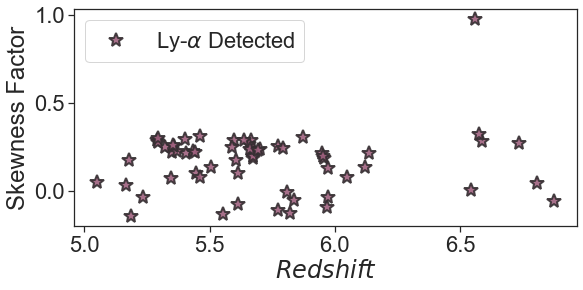

In [13]:
maskSkew=Skewness>0.1
plt.rcParams["figure.figsize"] = (9,4.)
kwsLAE= dict(linewidth = 2,fmt="*",markeredgecolor="#342E31",color='#9e607d',alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=15,zorder=100,elinewidth=2,label=r"Ly-$\alpha$ Detected")
kwsnoLAE = dict(linewidth = 2,fmt="v",markeredgecolor="#342E31",color="#342E31",alpha=0.3\
            ,capsize=0,markeredgewidth=1,markersize=8,zorder=10,elinewidth=1.0,label=r"no Ly-$\alpha$ Detected")


#plt.axvline(x=-2.23,color="black",ls="--",alpha=0.5,lw=5)
plt.errorbar(redshift,Skewness,**kwsLAE)
#plt.errorbar(slope[TypeMask],FWHMLya[TypeMask],xerr=dslope[TypeMask],yerr=dFWHMLya[TypeMask],fmt=" ",color="#9e607d",alpha=0.5,zorder=99)

plt.ylabel(r"Skewness Factor")
plt.xlabel(r"$Redshift$")
#plt.ylim(0,1000)
#plt.xlim(-4,2)
plt.legend()
plt.savefig("Figures/Skew_z.pdf",dpi=200,bbox_inches="tight")
plt.show()

In [14]:
Catalog["id_charlotte"]

count = 0
for name,type in zip(Catalog["id_charlotte"],Catalog["Type"]):
    if "Hu" in name: #or "Jung" in name or "Hu" in name:
        print(name,type)
        count += 1
count

Hu10_z6_5 LAE
Hu10_z6_11 LAE
Hu10_z6_12 NonDetect
Hu10_z6_9 NonDetect
Hu10_z6_7 LAE
Hu10_z6_6 LAE
Hu10_z6_4 NonDetect
Hu10_z7_1 LAE
Hu10_z7_2 LAE


9

In [15]:
count=0
countlya=0
countha=0
countoiii=0
for gal in Catalog:
    if gal["Type"]=="LAE":
        countlya+=1
        continue
    if gal["line"]=="Ha" and gal["zsys"]>0:
        print(gal["zsys"])
        countha+=1
        continue
    if gal["line"]=="Oiii" and gal["zsys"]>0:
        countoiii+=1
        continue
    else:
        count+=1
        #print(gal["id_charlotte"],gal["line"])
        continue
        


5.30715415766223
5.172143195679631
5.422913713190561
5.651776672972265
5.782828138398909
5.308411684925374
5.361964124280825
5.612082235360376
5.77642534989655
5.967074687783709
5.300804900483525
5.660475996651622
5.604018128192154
5.984858663497578
5.446233917647105
6.557645528569698
6.564199773643629
6.568703244169775
5.314695022759301
5.189204951064103
5.227379379334462
5.313230283786638
5.197174093385477
5.301303086378162
5.1844262587177585
5.226835820986581
5.274889427980322
6.190993113252018
5.191580664774309
5.29494152817231
5.208184028105967
5.243003913742814
5.270288727271262
5.3828141788624
5.362537858175751
5.543885223121926
5.445991156718443
6.4190814557605504
6.53037816235456


Galaxies per bin: 15


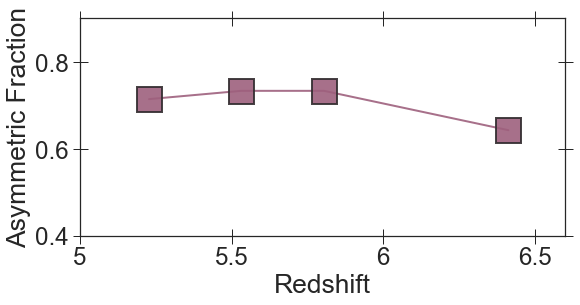

In [16]:
kwsLAE = dict(linewidth=2, marker="s", markeredgecolor="#342E31", color='#9e607d', alpha=0.9, markeredgewidth=2, markersize=25, zorder=100, label=r"Ly-$\alpha$ Detected")
n = 4
bins = pd.qcut(redshift[TypeMask], q=n, labels=False, retbins=True)[1]
print("Galaxies per bin:", int(len(redshift[TypeMask])/n))
zs = [(bins[i] + bins[i+1]) / 2 for i in range(0, len(bins)-1)]
Frac = [[] for _ in range(0, len(bins)-1)]

for sk, z in zip(Skewness, redshift):
    for i in range(0, len(bins)-1):
        if z > bins[i] and z < bins[i+1]:
            if sk > 0.1:
                Frac[i].append(1)
            if sk < 0.1:
                Frac[i].append(0)

FracPercentage = [my_array.count(1) / len(my_array) for my_array in Frac]
plt.rcParams["figure.figsize"] = (8.7,4.)
sns.set_theme(style="ticks",font_scale=2.2)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.tick_params(axis='both', direction='inout', length=15, width=1, which='both', top=True, right=True)
ax.plot(zs, FracPercentage, **kwsLAE)
ax.set_ylabel(r"Asymmetric Fraction")
ax.set_xlabel(r"Redshift")
ax.set_ylim(0.4, 0.9)
ax.set_xlim(5, 6.6)
ax.set_xticks([5, 5.5, 6,6.5])
ax.set_xticklabels([5, 5.5, 6,6.5])
plt.savefig("Figures/Skew_Fraction.pdf", dpi=200, bbox_inches="tight")
plt.show()

In [17]:
z=[]
zsys=[]
for gal in Catalog:
    if gal['zsys']>1:
        z.append(gal["zsys"])
    elif gal["z"]>1:
        z.append(gal["z"])
    else:
        z.append(gal["photoz"])


def Resolution(wave):
    R=1600
    return wave/R

def angstromTokms(centralA,As):
    c=299792
    v=c*(As-centralA)/centralA
    return v+c

zsys=Catalog["zsys"]
fesc=Catalog["fesc"]
dfesc=Catalog["dfesc"]
voff=Catalog["voff"]
dvoff=Catalog["dvoff"]
EWHa=Catalog["EWHa"]
dEWHa=Catalog["dEWHa"]
Muv=Catalog["Muv"]
dMuv=Catalog["dMuv"]
slope=Catalog["slope"]
EWLya=Catalog["EWLya"]
dEWLya=Catalog["dEWLya"]
Type=Catalog["Type"]
FWHMLya=Catalog["LyaFWHM_int"]
FWHMHa=Catalog["HaFWHM"]
FWHMHa=np.sqrt(FWHMHa**2-180**2)
dFWHMHa=Catalog["dHaFWHM"]





flya=Catalog["LyaFlux"]

for i in range(0,len(Type)):
    if Type[i]=="NonDetect":
        dEWLya[i]=np.nan




/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


[<AxesSubplot:ylabel='fesc'> <AxesSubplot:> None None None None None None]
[<AxesSubplot:ylabel='UV Magnitude'> <AxesSubplot:> <AxesSubplot:> None
 None None None None]


(0.0, 1000.0)

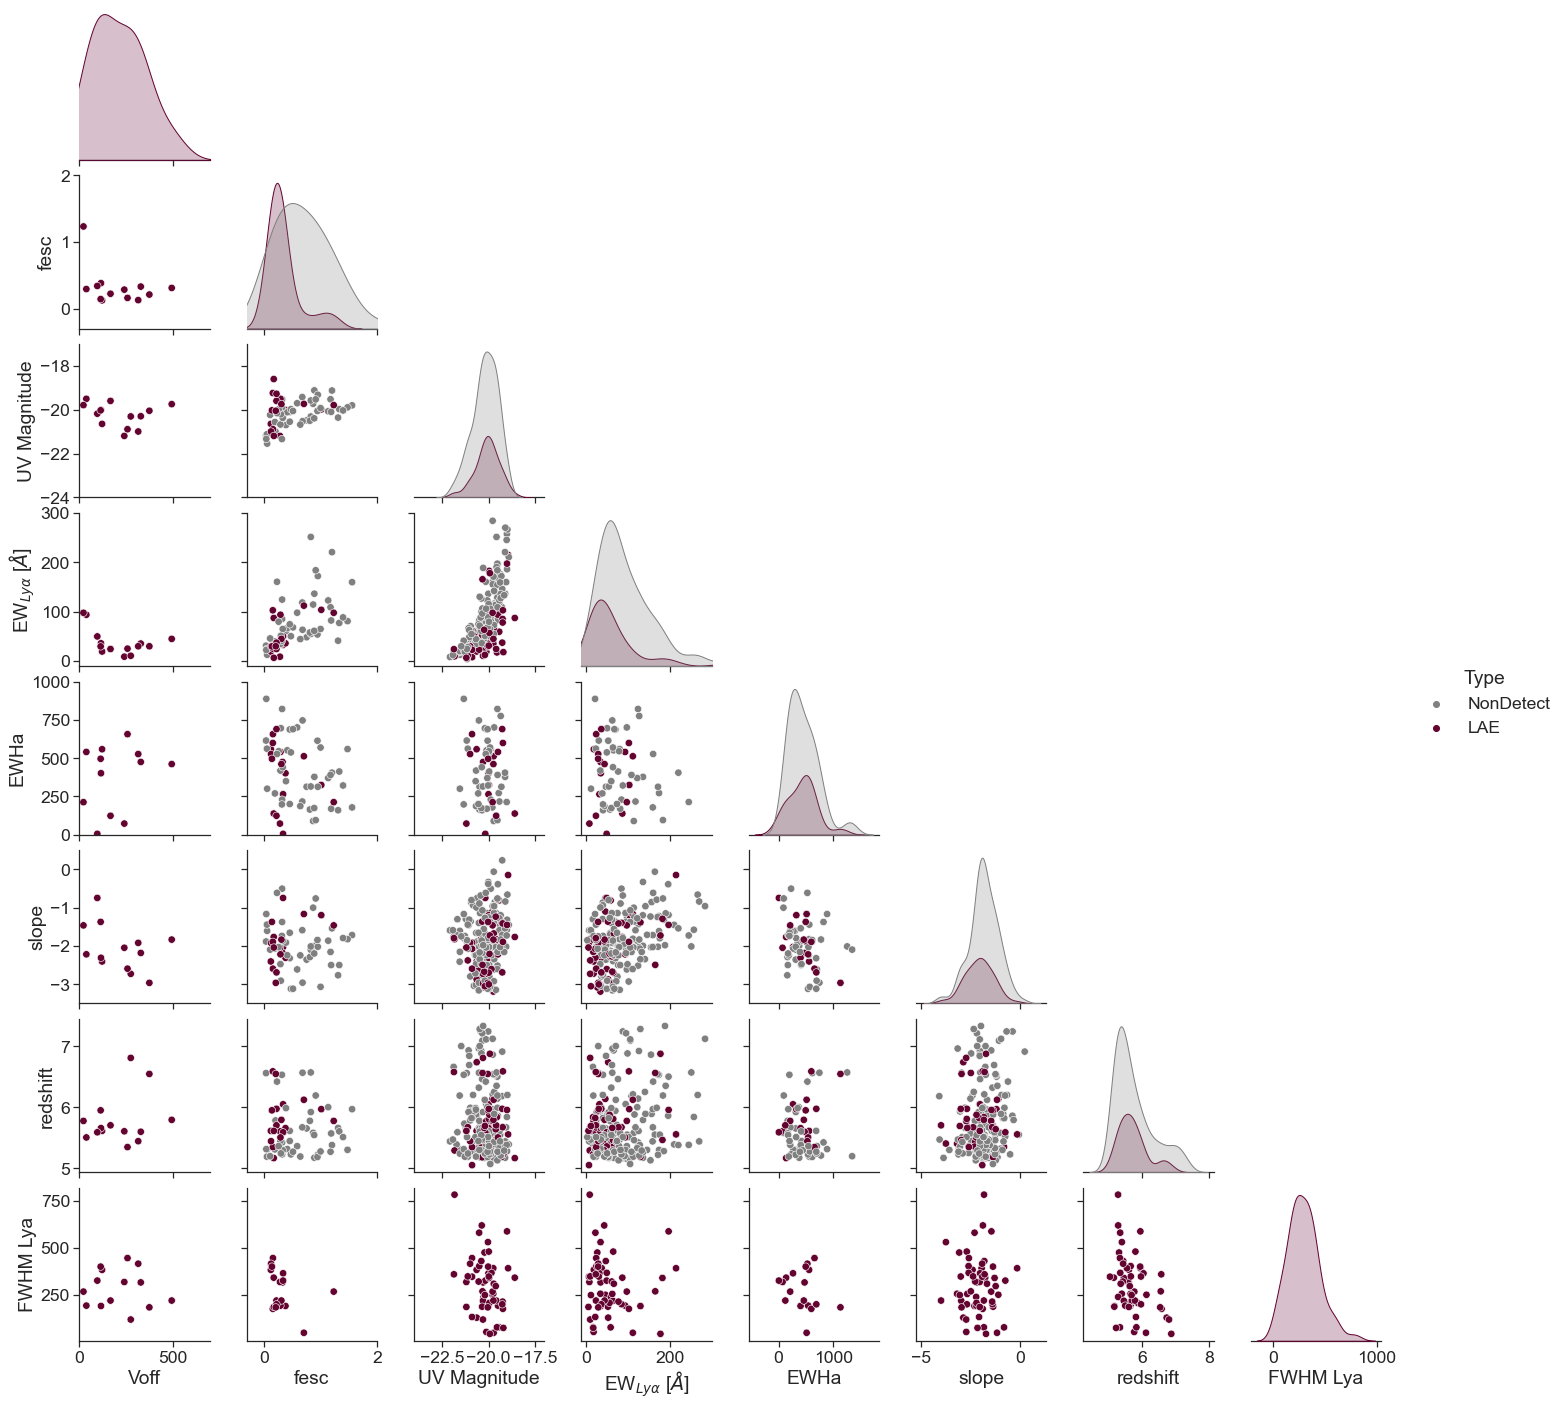

In [18]:


sns.set_theme(style="ticks",font_scale=1.6)
d   =   {'Voff':voff,'fesc':fesc, 'UV Magnitude': Muv,r'EW$_{Ly\alpha}$ [$\AA$]':EWLya, 'EWHa':EWHa,'slope':slope,'redshift':z,'Type':Type,'FWHM Lya':FWHMLya}
df  =   pd.DataFrame(data=d)
df=pd.concat([df[df['Type'] == 'Lya Detected'],df[df['Type'] != 'Lya Detected']])

palette = [ "gray", "#630330"]
sns.set_palette(palette)
g=sns.pairplot(df, hue="Type",corner=True,plot_kws={"s": 55})
ax=g.axes[3]
ax[3].set_xlim(-10,300)
ax[3].set_ylim(-10,300)
ax=g.axes[1]
print(ax)
#voff
ax[0].set_xlim(0,700)
ax[0].set_ylim(0,700)
#fesc
ax[1].set_xlim(-0.3,2)
ax[1].set_ylim(-0.3,2)

ax=g.axes[2]
print(ax)
#Muv
ax[2].set_xlim(-24,-17)
ax[2].set_ylim(-24,-17)


ax=g.axes[5]
#Muv
#ax[1].set_xlim(-24,-17)
ax[1].set_ylim(-3.5,0.5)

ax=g.axes[4]
#Muv
#ax[1].set_xlim(-24,-17)
ax[1].set_ylim(0,1000)


#ax[0].set_xlim(-3.5,0.5)
#ax[2].set_xlim(-20,280)
#ax[0].set_xticks([0.5,-1,-2.5])
#ax[1].set_xticks([-18,-20,-22])
#ax[0].set_yticks([0,500,1000])
#ax[2].set_xticks([0,100,250])
#ax[0].invert_xaxis()
#ax[1].invert_xaxis()
#ax=g.axes[1]
#ax[0].set_yticks([-18,-20,-22])
#ax[0].invert_yaxis()

#plt.savefig('../data/large_files/plots/properties/Corner2-2.png',dpi=200, bbox_inches = "tight")
#plt.ylim(-20,400)

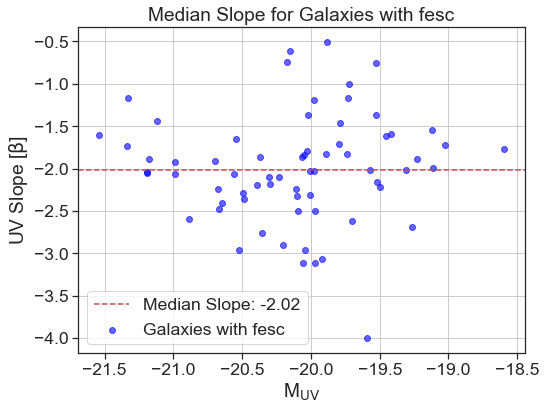

In [19]:
# Filter galaxies with fesc
mask_fesc = fesc > 0

# Calculate the median slope for galaxies with fesc
median_slope_fesc = np.median(slope[mask_fesc])

# Plot the median slope
plt.figure(figsize=(8, 6))
plt.axhline(y=median_slope_fesc, color='r', linestyle='--', label=f'Median Slope: {median_slope_fesc:.2f}')
plt.scatter(Muv[mask_fesc], slope[mask_fesc], label='Galaxies with fesc', color='blue', alpha=0.6)
plt.xlabel(r'M$_{\mathrm{UV}}$')
plt.ylabel(r'UV Slope [$\mathrm{\beta}$]')
plt.legend()
plt.title('Median Slope for Galaxies with fesc')
plt.grid(True)
plt.show()

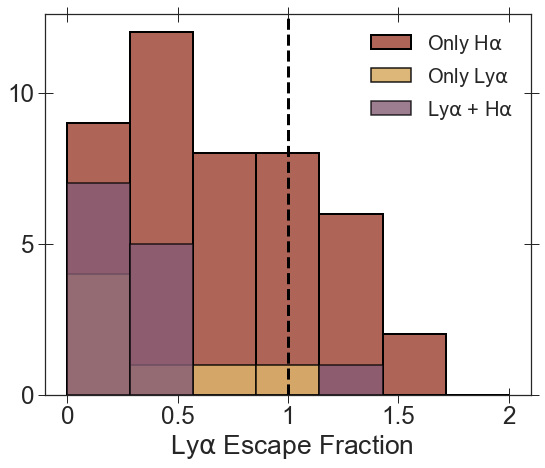

In [20]:
from palettable.cartocolors.qualitative import Antique_3
from matplotlib.colors import ListedColormap
plt.rcParams["figure.figsize"] = (8.7,7.)
sns.set_theme(style="ticks",font_scale=2.2)
cmap = ListedColormap(Antique_3.mpl_colors)

fig, axs = plt.subplots()


#4 separaciones 
#1) LAE with error, data``
#2) LAE, with nan error, islowlim  
mask=(Type=="LAE") & (dfesc>-1) #LAE
mask2=(Type=="LAE") & (np.isnan(dfesc)==True) & (fesc>-1) #LAE lowlim
mask3=(Type=="NonDetect") & (fesc>-1) #uplim

#kwsLAE= dict(linewidth = 2,marker="s",markeredgecolor="#342E31",color='#9e607d',alpha=0.9,markeredgewidth=2,markersize=25,zorder=100,label=r"Ly-$\alpha$ Detected")
b=7
axs.tick_params(axis='both', direction='inout', length=15, width=1, which='both', top=True, right=True)  # Set the length and width of the ticks

axs.hist(fesc[mask3],color=cmap(0.8),label=r"Only H$\mathrm{\alpha}$",range=[0,2],alpha=1,bins=b,lw=2,edgecolor="black")
axs.hist(fesc[mask2],color=cmap(0.5),label=r"Only Ly$\mathrm{\alpha}$",range=[0,2],alpha=0.9,linestyle="-",lw=1.5,edgecolor="black",bins=b)
axs.hist(fesc[mask],color=cmap(0.1),label=r"Ly$\mathrm{\alpha}$ + H$\mathrm{\alpha}$",range=[0,2],alpha=0.8,bins=b,lw=1.5,edgecolor="black")
axs.axvline(x=1,ls="--",color="black",lw=3,zorder=99)

axs.set_yticks([0,5,10]) 
axs.set_yticklabels([0,5,10])
axs.set_xticks([0,0.5,1,1.5,2]) 
axs.set_xticklabels([0,0.5,1,1.5,2])
axs.set_xlabel(r" Ly$\mathrm{\alpha}$ Escape Fraction")
axs.legend(fontsize=20,frameon=False)
#plt.grid()
plt.savefig("Figures/Escape_Fraction_Dist.pdf",dpi=200)
plt.show()

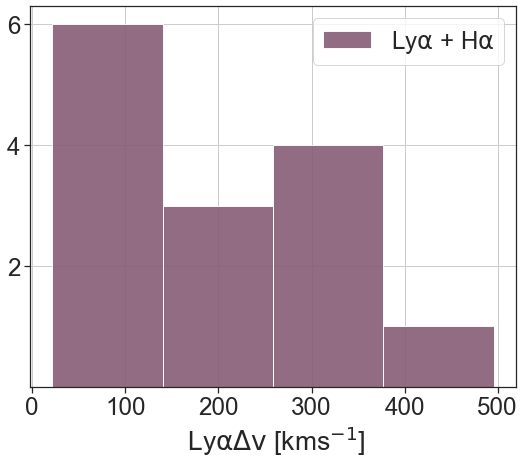

In [21]:

fig, axs = plt.subplots()

axs.hist(voff,color=cmap(0.1),label=r"Ly$\mathrm{\alpha}$ + H$\mathrm{\alpha}$",bins=4,alpha=0.9)

axs.set_yticks([2,4,6]) 
axs.set_yticklabels([2,4,6])

axs.set_xlabel(r" Ly$\mathrm{\alpha\Delta v}$ [kms$^{-1}$]")
axs.legend()
plt.grid()
plt.savefig("Figures/voff_Dist.pdf",dpi=200)
plt.show()

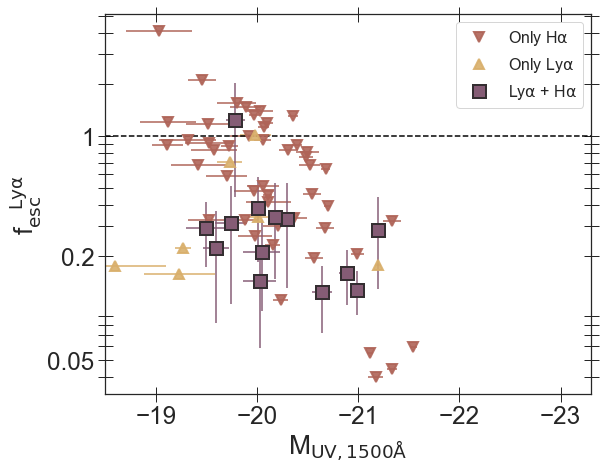

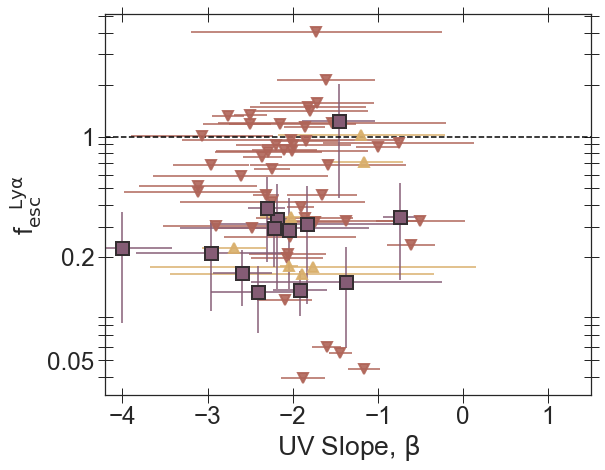

In [22]:
plt.rcParams["figure.figsize"] = (8.7,7.)
sns.set_theme(style="ticks",font_scale=2.2)

fig, axs = plt.subplots()
kwsLAE= dict(linewidth = 1,fmt="s",markeredgecolor="#342E31",alpha=1\
            ,capsize=0,markeredgewidth=2,markersize=13,zorder=100,elinewidth=2,color=cmap(0.1),label=r"Ly$\mathrm{\alpha}$ + H$\mathrm{\alpha}$")

kwsU= dict(linewidth = 2,fmt="v",alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=10,zorder=2,elinewidth=2,color=cmap(0.8),label=r"Only H$\mathrm{\alpha}$")

kwsL= dict(linewidth = 2,fmt="^",alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=10,zorder=2,elinewidth=2,color=cmap(0.5),label=r"Only Ly$\mathrm{\alpha}$")


mask=(Type=="LAE") & (dfesc>-1) #LAE
maskL=(Type=="LAE") & (np.isnan(dfesc)==True) & (fesc>-1) #LAE lowlim
maskU=(Type=="NonDetect") & (fesc>-1) #uplim


axs.errorbar(Muv[maskU],fesc[maskU],xerr=dMuv[maskU],fmt=" ",color=cmap(0.8))
axs.errorbar(Muv[maskL],fesc[maskL],xerr=dMuv[maskL],fmt=" ",color=cmap(0.5))
axs.errorbar(Muv[mask],fesc[mask],yerr=dfesc[mask],xerr=dMuv[mask],fmt=" ",color=cmap(0.1))

#Uplim
axs.errorbar(Muv[maskU],fesc[maskU],**kwsU)
#lowlim
axs.errorbar(Muv[maskL],fesc[maskL],**kwsL)

#Full
axs.errorbar(Muv[mask],fesc[mask],**kwsLAE)


axs.tick_params(axis='both', direction='inout', length=15, width=1, which='both', top=True, right=True)  # Set the length and width of the ticks


axs.axhline(y=1,ls="--",color="black")
#axs.set_ylim(-0,2.1)
axs.set_xlim(-18.5,-23.3)
axs.legend(fontsize=16)
axs.set_xlabel(r"M$_{\mathrm{UV,1500\AA}}$")
axs.set_ylabel(r"f$_{\mathrm{esc}}^{\mathrm{\quadLy\alpha}}$")

axs.set_yscale("log")
axs.set_yticks([0.05,0.2,1]) 
axs.set_yticklabels([0.05,0.2,1])
#plt.grid(zorder=0)
plt.savefig("Figures/fesc_Muv.pdf",dpi=200,bbox_inches="tight")
plt.show()

fig, axs = plt.subplots()
kwsLAE= dict(linewidth = 1,fmt="s",markeredgecolor="#342E31",alpha=1\
            ,capsize=0,markeredgewidth=2,markersize=13,zorder=100,elinewidth=2,color=cmap(0.1),label=r"Ly$\mathrm{\alpha}$ + H$\mathrm{\alpha}$")

kwsU= dict(linewidth = 2,fmt="v",alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=10,zorder=2,elinewidth=2,color=cmap(0.8),label=r"Only H$\mathrm{\alpha}$")

kwsL= dict(linewidth = 2,fmt="^",alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=10,zorder=2,elinewidth=2,color=cmap(0.5),label=r"Only Ly$\mathrm{\alpha}$")


mask=(Type=="LAE") & (dfesc>-1) #LAE
maskL=(Type=="LAE") & (np.isnan(dfesc)==True) & (fesc>-1) #LAE lowlim
maskU=(Type=="NonDetect") & (fesc>-1) #uplim


axs.errorbar(slope[maskU],fesc[maskU],xerr=dslope[maskU],fmt=" ",color=cmap(0.8))
axs.errorbar(slope[maskL],fesc[maskL],xerr=dslope[maskL],fmt=" ",color=cmap(0.5))
axs.errorbar(slope[mask],fesc[mask],yerr=dfesc[mask],xerr=dslope[mask],fmt=" ",color=cmap(0.1))

#Uplim
axs.errorbar(slope[maskU],fesc[maskU],**kwsU)
#lowlim
axs.errorbar(slope[maskL],fesc[maskL],**kwsL)

#Full
axs.errorbar(slope[mask],fesc[mask],**kwsLAE)



axs.tick_params(axis='both', direction='inout', length=15, width=1, which='both', top=True, right=True)  # Set the length and width of the ticks
axs.axhline(y=1,ls="--",color="black")
#axs.set_ylim(-0,2)
axs.set_xlim(-4.2,1.5)
#axs.legend(loc=3)
axs.set_xlabel(r"UV Slope, $\mathrm{\beta}$")
axs.set_ylabel(r"f$_{\mathrm{esc}}^{\mathrm{\quadLy\alpha}}$")
axs.set_yscale("log")
axs.set_yticks([0.05,0.2,1]) 
axs.set_yticklabels([0.05,0.2,1])
#axs.set_yticklabels([0,0.5,1,1.5,2])
plt.savefig("Figures/fesc_beta.pdf",dpi=200)
plt.show()



47 7 13


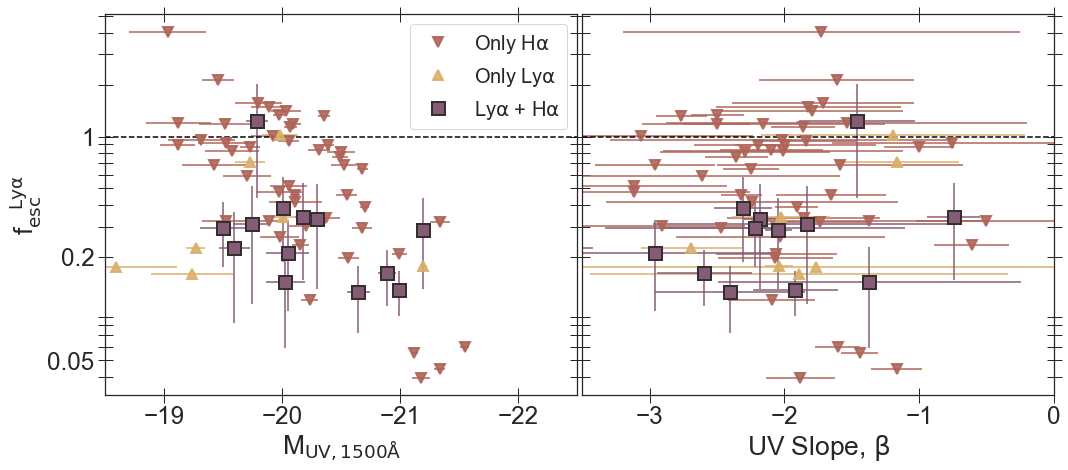

In [23]:

plt.rcParams["figure.figsize"] = (17, 7)  # Set the figure size
fig, axs = plt.subplots(1, 2, sharey=True)

# First subplot
axs[0].errorbar(Muv[maskU], fesc[maskU], xerr=dMuv[maskU], fmt=" ", color=cmap(0.8))
axs[0].errorbar(Muv[maskL], fesc[maskL], xerr=dMuv[maskL], fmt=" ", color=cmap(0.5))
axs[0].errorbar(Muv[mask], fesc[mask], yerr=dfesc[mask], xerr=dMuv[mask], fmt=" ", color=cmap(0.1))

# Uplim
axs[0].errorbar(Muv[maskU], fesc[maskU], **kwsU)
# Lowlim
axs[0].errorbar(Muv[maskL], fesc[maskL], **kwsL)

# Full
axs[0].errorbar(Muv[mask], fesc[mask], **kwsLAE)

axs[0].tick_params(axis='both', direction='inout', length=15, width=1, which='both', top=True, right=True)
axs[0].axhline(y=1, ls="--", color="black")
axs[0].set_xlim(-18.5, -22.5)
axs[0].set_xlabel(r"M$_{\mathrm{UV,1500\AA}}$")
axs[0].set_ylabel(r"f$_{\mathrm{esc}}^{\mathrm{\quadLy\alpha}}$")
axs[0].set_yscale("log")
axs[0].set_yticks([0.05, 0.2, 1])
axs[0].set_yticklabels([0.05, 0.2, 1])

# Second subplot
axs[1].errorbar(slope[maskU], fesc[maskU], xerr=dslope[maskU], fmt=" ", color=cmap(0.8))
axs[1].errorbar(slope[maskL], fesc[maskL], xerr=dslope[maskL], fmt=" ", color=cmap(0.5))
axs[1].errorbar(slope[mask], fesc[mask], yerr=dfesc[mask], xerr=dslope[mask], fmt=" ", color=cmap(0.1))


print(len(slope[maskU]),len(slope[maskL]),len(slope[mask]))
# Uplim
axs[1].errorbar(slope[maskU], fesc[maskU], **kwsU)
# Lowlim
axs[1].errorbar(slope[maskL], fesc[maskL], **kwsL)

# Full
axs[1].errorbar(slope[mask], fesc[mask], **kwsLAE)

axs[1].tick_params(axis='both', direction='inout', length=15, width=1, which='both', top=True, right=True)
axs[1].axhline(y=1, ls="--", color="black")
axs[1].set_xlim(-3.5, 0)
axs[1].set_xlabel(r"UV Slope, $\mathrm{\beta}$")
#axs[1].set_ylabel(r"f$_{\mathrm{esc}}^{\mathrm{\quadLy\alpha}}$")
axs[1].set_yscale("log")
axs[1].set_yticks([0.05, 0.2, 1])
axs[1].set_yticklabels([0.05, 0.2, 1])
plt.subplots_adjust(wspace=0.01)
#plt.tight_layout()
axs[0].legend(fontsize=20)
plt.savefig("Figures/fesc_combined.pdf", dpi=200)
plt.show()

0.001060872842475859


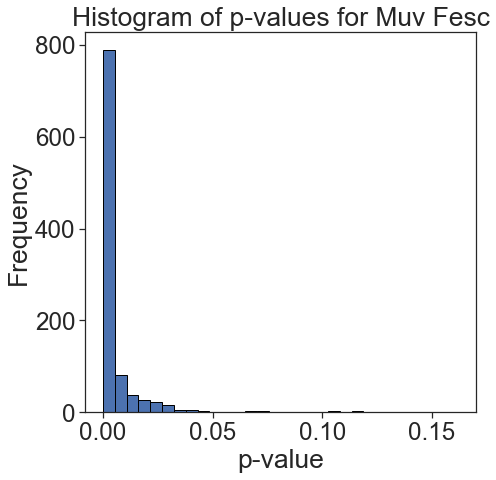

0.48600989592908134


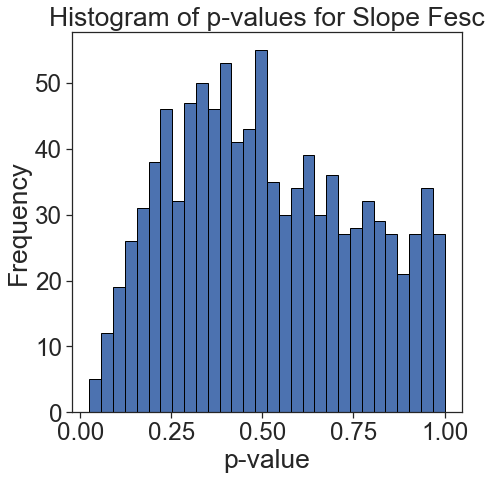

0.01782616948723073


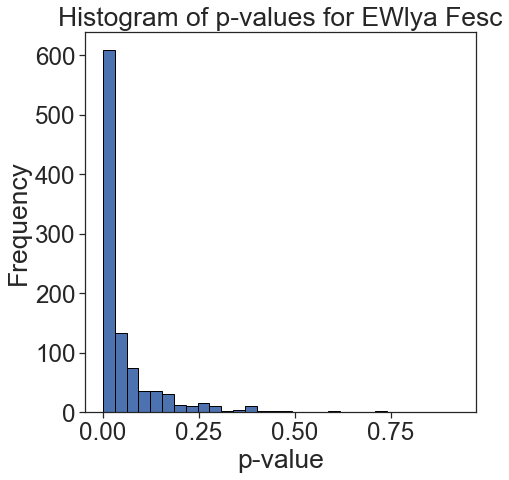

0.09534348310950384


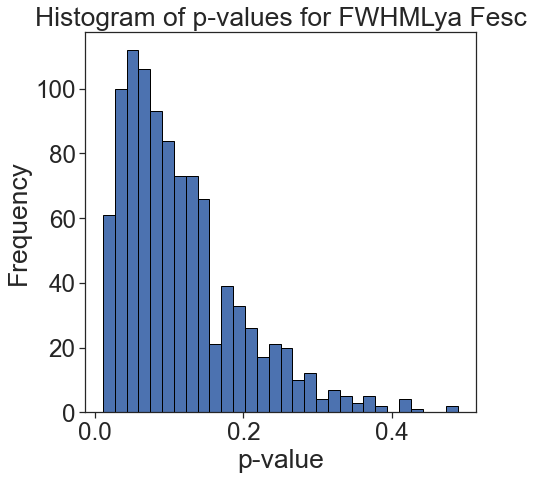

0.03371684077412035


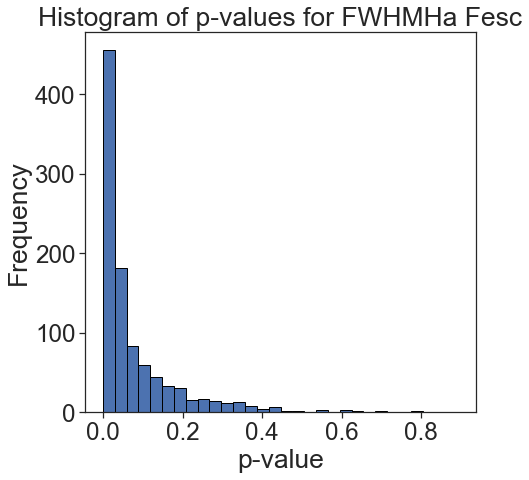

In [24]:
from scipy.stats import pearsonr

def calculate_p_values(x, y, mask, maskU, maskL, xlabel, title):
    plt.rcParams["figure.figsize"] = (7, 7)  # Set the figure size

    pvalue = []
    for _ in range(1000):
        random_fesc_U = np.random.uniform(0, np.minimum(y[maskU], 1))
        random_fesc_L = np.random.uniform(y[maskL], 1)
        
        x_combined = np.concatenate([x[mask], x[maskU], x[maskL]])
        f_combined = np.concatenate([y[mask], random_fesc_U, random_fesc_L])
        
        # Remove NaNs
        valid_mask = ~np.isnan(x_combined) & ~np.isnan(f_combined)
        x_combined = x_combined[valid_mask]
        f_combined = f_combined[valid_mask]

        _, p = pearsonr(x_combined, f_combined)
        pvalue.append(p)

    # Plot the p-value distribution
    plt.hist(pvalue, bins=30, edgecolor='black')
    print(np.median(pvalue))
    plt.xlabel('p-value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of p-values for {title}')
    plt.show()

# Run the function for Muv vs fesc
calculate_p_values(Muv, fesc, mask, maskU, maskL, 'Muv', 'Muv Fesc')

# Run the function for slope vs fesc
calculate_p_values(slope, fesc, mask, maskU, maskL, 'slope', 'Slope Fesc')

# Run the function for EWlya vs fesc
calculate_p_values(EWLya, fesc, mask, maskU, maskL, 'EWlya', 'EWlya Fesc')

# Run the function for FWHMLya vs fesc
calculate_p_values(FWHMLya, fesc, mask, maskU, maskL, 'FWHMLya', 'FWHMLya Fesc')

# Run the function for FWHMHa vs fesc
calculate_p_values(FWHMHa, fesc, mask, maskU, maskL, 'FWHMHa', 'FWHMHa Fesc')


/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2141: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


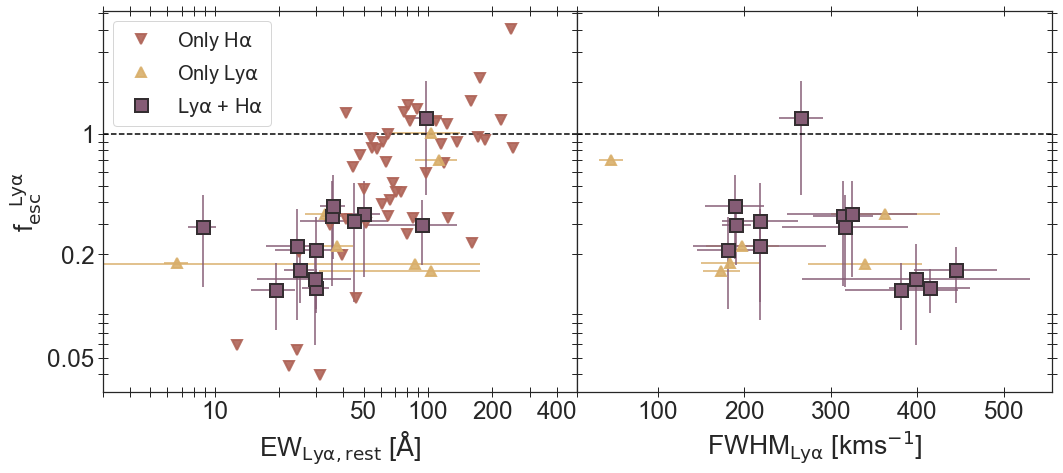

In [25]:

sns.set_theme(style="ticks", font_scale=2.2)
plt.rcParams["figure.figsize"] = (17, 7)  # Set the figure size
fig, axs = plt.subplots(1, 2, sharey=True)

kwsLAE = dict(linewidth=1, fmt="s", markeredgecolor="#342E31", alpha=1, capsize=0, markeredgewidth=2, markersize=13, zorder=100, elinewidth=2, color=cmap(0.1), label=r"Ly$\mathrm{\alpha}$ + H$\mathrm{\alpha}$")
kwsU = dict(linewidth=2, fmt="v", alpha=0.9, capsize=0, markeredgewidth=2, markersize=10, zorder=2, elinewidth=2, color=cmap(0.8), label=r"Only H$\mathrm{\alpha}$")
kwsL = dict(linewidth=2, fmt="^", alpha=0.9, capsize=0, markeredgewidth=2, markersize=10, zorder=2, elinewidth=2, color=cmap(0.5), label=r"Only Ly$\mathrm{\alpha}$")

mask = (Type == "LAE") & (dfesc > -1)  # LAE
maskL = (Type == "LAE") & (np.isnan(dfesc) == True) & (fesc > -1)  # LAE lowlim
maskU = (Type == "NonDetect") & (fesc > -1)  # uplim

# Plot 1: EW_Lya
axs[0].errorbar(EWLya[maskU], fesc[maskU], xerr=dEWLya[maskU], fmt=" ", color=cmap(0.8))
axs[0].errorbar(EWLya[maskL], fesc[maskL], xerr=dEWLya[maskL], fmt=" ", color=cmap(0.5))
axs[0].errorbar(EWLya[mask], fesc[mask], yerr=dfesc[mask], xerr=dEWLya[mask], fmt=" ", color=cmap(0.1))
axs[0].errorbar(EWLya[maskU], fesc[maskU], **kwsU)
axs[0].errorbar(EWLya[maskL], fesc[maskL], **kwsL)
axs[0].errorbar(EWLya[mask], fesc[mask], **kwsLAE)
axs[0].axhline(y=1, ls="--", color="black")
axs[0].set_xlabel(r"EW$_{\mathrm{Ly\alpha,rest}}$ [$\mathrm{\AA}$]")
axs[0].set_xscale("log")
axs[0].set_xlim(3, 500)
axs[0].set_xticks([10, 50, 100, 200, 400])
axs[0].set_xticklabels([10, 50, 100, 200, 400])
axs[0].tick_params(axis='both', direction='inout', length=10, width=1, which='both', top=True, right=True)

# Plot 2: FWHM_Lya
axs[1].errorbar(FWHMLya[maskU], fesc[maskU], xerr=dFWHMLya[maskU], fmt=" ", color=cmap(0.8))
axs[1].errorbar(FWHMLya[maskL], fesc[maskL], xerr=dFWHMLya[maskL], fmt=" ", color=cmap(0.5))
axs[1].errorbar(FWHMLya[mask], fesc[mask], yerr=dfesc[mask], xerr=dFWHMLya[mask], fmt=" ", color=cmap(0.1))
axs[1].errorbar(FWHMLya[maskU], fesc[maskU], **kwsU)
axs[1].errorbar(FWHMLya[maskL], fesc[maskL], **kwsL)
axs[1].errorbar(FWHMLya[mask], fesc[mask], **kwsLAE)
axs[1].axhline(y=1, ls="--", color="black")
axs[1].set_xlabel(r"FWHM$_{\mathrm{Ly\alpha}}$ [kms$^{\mathrm{-1}}$]")
axs[1].tick_params(axis='both', direction='inout', length=10, width=1, which='both', top=True, right=True)

# Plot 3: EW_Ha
#axs[2].errorbar(FWHMHa[maskU], fesc[maskU], xerr=dFWHMHa[maskU], fmt=" ", color=cmap(0.8))
#axs[2].errorbar(FWHMHa[maskL], fesc[maskL], xerr=dFWHMHa[maskL], fmt=" ", color=cmap(0.5))
#axs[2].errorbar(FWHMHa[mask], fesc[mask], yerr=dfesc[mask], xerr=dFWHMHa[mask], fmt=" ", color=cmap(0.1))
#axs[2].errorbar(FWHMHa[maskU], fesc[maskU], **kwsU)
#axs[2].errorbar(FWHMHa[maskL], fesc[maskL], **kwsL)
#axs[2].errorbar(FWHMHa[mask], fesc[mask], **kwsLAE)
#axs[2].axhline(y=1, ls="--", color="black")
#axs[2].set_xlabel(r"FWHM$_{\mathrm{H\alpha}}$ [kms$^{\mathrm{-1}}$]")
#axs[2].tick_params(axis='both', direction='inout', length=10, width=1, which='both', top=True, right=True)

# Shared Y axis settings
axs[0].set_ylabel(r"f$_{\mathrm{esc}}^{\mathrm{\quadLy\alpha}}$")
axs[0].set_yscale("log")
axs[0].set_yticks([0.05, 0.2, 1])
axs[0].set_yticklabels([0.05, 0.2, 1])
axs[0].legend(fontsize=20)
plt.subplots_adjust(wspace=0.0)
plt.savefig("Figures/All_fescx.pdf", dpi=200, bbox_inches="tight")
plt.show()


/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2141: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


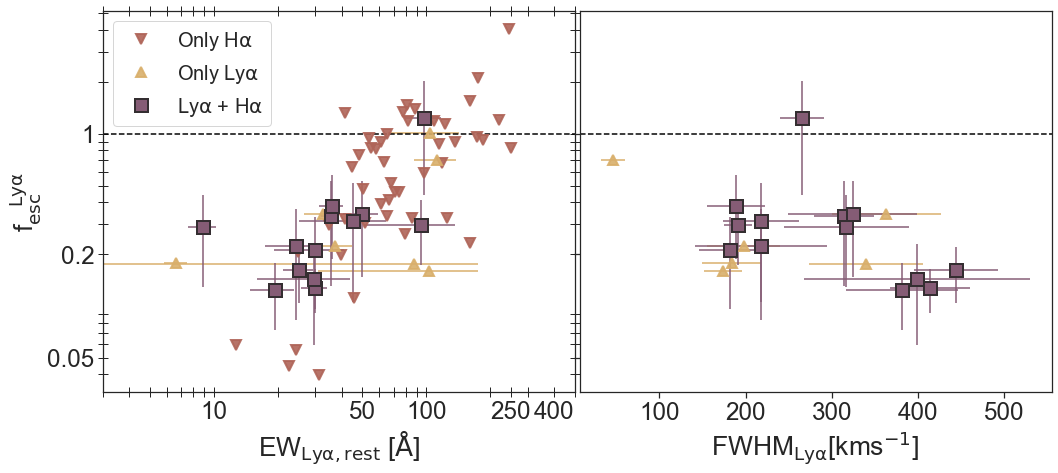

In [26]:

fig, axs = plt.subplots(1, 2, figsize=(17, 7), sharey=True)

# First subplot
axs[0].errorbar(EWLya[maskU], fesc[maskU], xerr=dEWLya[maskU], fmt=" ", color=cmap(0.8))
axs[0].errorbar(EWLya[maskL], fesc[maskL], xerr=dEWLya[maskL], fmt=" ", color=cmap(0.5))
axs[0].errorbar(EWLya[mask], fesc[mask], yerr=dfesc[mask], xerr=dEWLya[mask], fmt=" ", color=cmap(0.1))

# Uplim
axs[0].errorbar(EWLya[maskU], fesc[maskU], **kwsU)
# Lowlim
axs[0].errorbar(EWLya[maskL], fesc[maskL], **kwsL)

# Full
axs[0].errorbar(EWLya[mask], fesc[mask], **kwsLAE)

axs[0].axhline(y=1, ls="--", color="black")
axs[0].set_xlabel(r"EW$_{\mathrm{Ly\alpha,rest}}$ [$\mathrm{\AA}$]")
axs[0].set_ylabel(r"f$_{\mathrm{esc}}^{\mathrm{\quadLy\alpha}}$")
axs[0].set_yscale("log")
axs[0].set_xscale("log")
axs[0].set_yticks([0.05, 0.2, 1])
axs[0].set_yticklabels([0.05, 0.2, 1])
axs[0].set_xticks([10, 50, 100, 250, 400])
axs[0].set_xticklabels([10, 50, 100, 250, 400])
axs[0].set_xlim(3, 500)
axs[0].tick_params(axis='both', direction='inout', length=10, width=1, which='both', top=True, right=True)

# Second subplot
axs[1].errorbar(FWHMLya[maskU], fesc[maskU], xerr=dFWHMLya[maskU], fmt=" ", color=cmap(0.8))
axs[1].errorbar(FWHMLya[maskL], fesc[maskL], xerr=dFWHMLya[maskL], fmt=" ", color=cmap(0.5))
axs[1].errorbar(FWHMLya[mask], fesc[mask], yerr=dfesc[mask], xerr=dFWHMLya[mask], fmt=" ", color=cmap(0.1))

# Uplim
axs[1].errorbar(FWHMLya[maskU], fesc[maskU], **kwsU)
# Lowlim
axs[1].errorbar(FWHMLya[maskL], fesc[maskL], **kwsL)

# Full
axs[1].errorbar(FWHMLya[mask], fesc[mask], **kwsLAE)

axs[1].axhline(y=1, ls="--", color="black")
axs[1].set_xlabel(r"FWHM$_{\mathrm{Ly\alpha}}$[kms$^{\mathrm{-1}}$]")
axs[1].set_yscale("log")
axs[1].set_yticks([0.05, 0.2, 1])
axs[1].set_yticklabels([0.05, 0.2, 1])
#axs[1].grid(zorder=0)
axs[0].legend(fontsize=20)
plt.subplots_adjust(wspace=0.01)
plt.savefig("Figures/All_fesc.pdf", dpi=200, bbox_inches="tight")
plt.show()


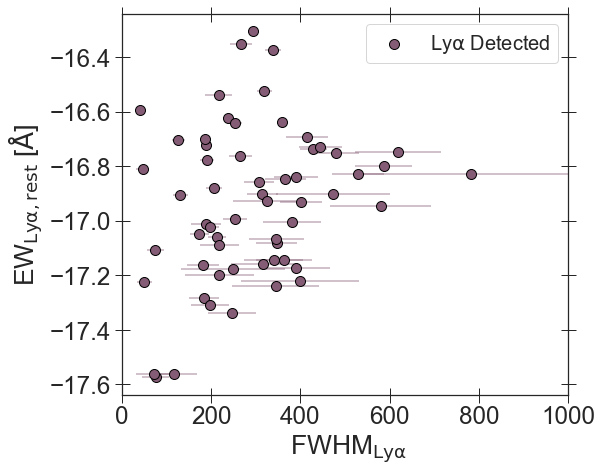

In [27]:
plt.rcParams["figure.figsize"] = (8, 7)  # Set the figure size

fig, ax1 = plt.subplots(1, 1, sharey=True)  # Create subplots with shared Y axis


mask=Catalog["Type"]=="LAE"
# Plot 2
ax1.tick_params(axis='both', direction='inout', length=15, width=1, which='both', top=True, right=True)  # Set the length and width of the ticks


ax1.scatter(FWHMLya[mask], flya[mask], label=r"Ly$\mathrm{\alpha}$ Detected", color=cmap(0.1), s=100, edgecolor="black", zorder=100)  # Increase the size of the markers
ax1.errorbar(FWHMLya[mask], flya[mask], xerr=dFWHMLya[mask], fmt=" ", alpha=0.5, color=cmap(0.1))

ax1.legend(fontsize=20)

ax1.set_xlim(0, 1000)
#ax1.set_ylim(-10, 220)
ax1.set_ylabel(r"EW$_{\mathrm{Ly\alpha,rest}}$ [$\mathrm{\AA}$]")
ax1.set_xlabel(r" FWHM$_{\mathrm{Ly\alpha}}$")
plt.subplots_adjust(wspace=0.01)
#plt.savefig("Figures/EW_combined.pdf", dpi=200,bbox_inches="tight")
plt.show()


/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2141: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


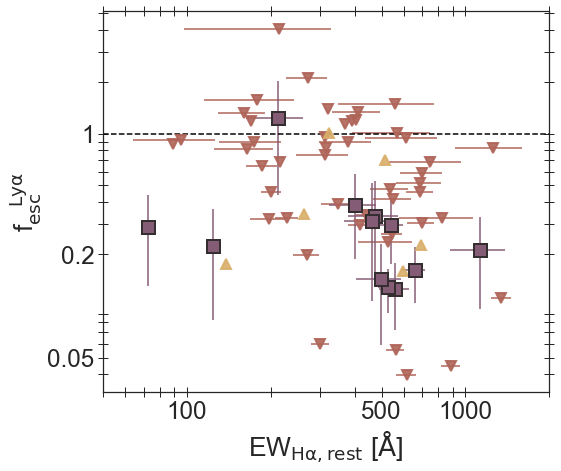

/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2141: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


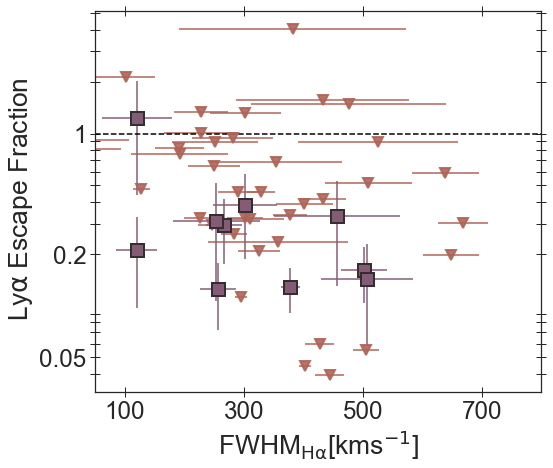

In [28]:
fig, axs = plt.subplots()

kwsLAE = dict(linewidth=1, fmt="s", markeredgecolor="#342E31", alpha=1, capsize=0, markeredgewidth=2, markersize=13, zorder=100, elinewidth=2, color=cmap(0.1), label=r"Ly$\mathrm{\alpha}$ + H$\mathrm{\alpha}$")
kwsU = dict(linewidth=2, fmt="v", alpha=0.9, capsize=0, markeredgewidth=2, markersize=10, zorder=2, elinewidth=2, color=cmap(0.8), label=r"Only H$\mathrm{\alpha}$")
kwsL = dict(linewidth=2, fmt="^", alpha=0.9, capsize=0, markeredgewidth=2, markersize=10, zorder=2, elinewidth=2, color=cmap(0.5), label=r"Only Ly$\mathrm{\alpha}$")

mask = (Type == "LAE") & (dfesc > -1)  # LAE
maskL = (Type == "LAE") & (np.isnan(dfesc) == True) & (fesc > -1)  # LAE lowlim
maskU = (Type == "NonDetect") & (fesc > -1)  # uplim

axs.tick_params(axis='both', direction='inout', length=10, width=1, which='both', top=True, right=True)
axs.errorbar(EWHa[maskU], fesc[maskU], xerr=dEWHa[maskU], fmt=" ", color=cmap(0.8))
axs.errorbar(EWHa[maskL], fesc[maskL], xerr=dEWHa[maskL], fmt=" ", color=cmap(0.5))
axs.errorbar(EWHa[mask], fesc[mask], yerr=dfesc[mask], xerr=dEWHa[mask], fmt=" ", color=cmap(0.1))

# Uplim
axs.errorbar(EWHa[maskU], fesc[maskU], **kwsU)
# Lowlim
axs.errorbar(EWHa[maskL], fesc[maskL], **kwsL)

# Full
axs.errorbar(EWHa[mask], fesc[mask], **kwsLAE)

axs.axhline(y=1, ls="--", color="black")
axs.set_xlim(50, 2000)
axs.set_xlabel(r"EW$_{\mathrm{H\alpha,rest}}$ [$\mathrm{\AA}$]")
axs.set_ylabel(r"f$_{\mathrm{esc}}^{\mathrm{\quadLy\alpha}}$")
axs.set_yscale("log")
axs.set_xscale("log")
axs.set_yticks([0.05, 0.2, 1])
axs.set_yticklabels([0.05, 0.2, 1])
axs.set_xticks([100, 500, 1000])
axs.set_xticklabels([100, 500, 1000])

plt.savefig("Figures/fesc_ewha.pdf", dpi=200)
plt.show()

fig, axs = plt.subplots()

kwsLAE = dict(linewidth=1, fmt="s", markeredgecolor="#342E31", alpha=1, capsize=0, markeredgewidth=2, markersize=13, zorder=100, elinewidth=2, color=cmap(0.1), label=r"Ly$\mathrm{\alpha}$ + H$\mathrm{\alpha}$")
kwsU = dict(linewidth=2, fmt="v", alpha=0.9, capsize=0, markeredgewidth=2, markersize=10, zorder=2, elinewidth=2, color=cmap(0.8), label=r"Only H$\mathrm{\alpha}$")
kwsL = dict(linewidth=2, fmt="^", alpha=0.9, capsize=0, markeredgewidth=2, markersize=10, zorder=2, elinewidth=2, color=cmap(0.5), label=r"Only Ly$\mathrm{\alpha}$")

axs.tick_params(axis='both', direction='inout', length=10, width=1, which='both', top=True, right=True)
mask = (Type == "LAE") & (dfesc > -1)  # LAE
maskL = (Type == "LAE") & (np.isnan(dfesc) == True) & (fesc > -1)  # LAE lowlim
maskU = (Type == "NonDetect") & (fesc > -1)  # uplim

axs.errorbar(FWHMHa[maskU], fesc[maskU], xerr=dFWHMHa[maskU], fmt=" ", color=cmap(0.8))
axs.errorbar(FWHMHa[maskL], fesc[maskL], xerr=dFWHMHa[maskL], fmt=" ", color=cmap(0.5))
axs.errorbar(FWHMHa[mask], fesc[mask], yerr=dfesc[mask], xerr=dFWHMHa[mask], fmt=" ", color=cmap(0.1))

# Uplim
axs.errorbar(FWHMHa[maskU], fesc[maskU], **kwsU)
# Lowlim
axs.errorbar(FWHMHa[maskL], fesc[maskL], **kwsL)
# Full
axs.errorbar(FWHMHa[mask], fesc[mask], **kwsLAE)

axs.axhline(y=1, ls="--", color="black")
axs.set_xlabel(r"FWHM$_{\mathrm{H\alpha}}$[kms$^{\mathrm{-1}}$]")
axs.set_ylabel(r" Ly$\mathrm{\alpha}$ Escape Fraction")
axs.set_yscale("log")
axs.set_yticks([0.05, 0.2, 1])
axs.set_yticklabels([0.05, 0.2, 1])
axs.set_xticks([100, 300, 500, 700])
axs.set_xticklabels([100, 300, 500, 700])
axs.set_xlim(50, 800)

plt.savefig("Figures/fesc_ewha.pdf", dpi=200)
plt.show()


/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2141: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


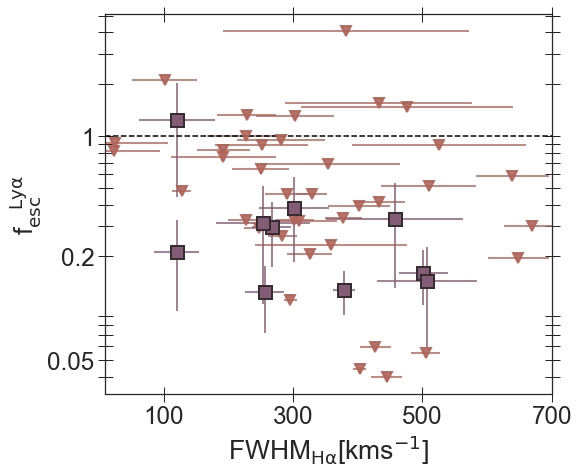

In [29]:
fig, axs = plt.subplots(1, 1, figsize=(8, 7), sharey=True)

# First plot
#axs[0].errorbar(EWHa[maskU], fesc[maskU], xerr=dEWHa[maskU], fmt=" ", color=cmap(0.8))
#axs[0].errorbar(EWHa[maskL], fesc[maskL], xerr=dEWHa[maskL], fmt=" ", color=cmap(0.5))
#axs[0].errorbar(EWHa[mask], fesc[mask], yerr=dfesc[mask], xerr=dEWHa[mask], fmt=" ", color=cmap(0.1))
#axs[0].errorbar(EWHa[maskU], fesc[maskU], **kwsU)
#axs[0].errorbar(EWHa[maskL], fesc[maskL], **kwsL)
#axs[0].errorbar(EWHa[mask], fesc[mask], **kwsLAE)
#axs[0].axhline(y=1, ls="--", color="black")
#axs[0].set_xlim(50, 2000)
#axs[0].set_xlabel(r"EW$_{\mathrm{H\alpha,rest}}$ [$\mathrm{\AA}$]")
#axs[0].set_ylabel(r"f$_{\mathrm{esc}}^{\mathrm{\quadLy\alpha}}$")
#axs[0].set_yscale("log")
#axs[0].set_xscale("log")
#axs[0].set_yticks([0.05, 0.2, 1])
#axs[0].set_yticklabels([0.05, 0.2, 1])
#axs[0].set_xticks([100, 500, 1000])
#axs[0].set_xticklabels([100, 500, 1000])

# Second plot
axs.errorbar(FWHMHa[maskU], fesc[maskU], xerr=dFWHMHa[maskU], fmt=" ", color=cmap(0.8))
axs.errorbar(FWHMHa[maskL], fesc[maskL], xerr=dFWHMHa[maskL], fmt=" ", color=cmap(0.5))
axs.errorbar(FWHMHa[mask], fesc[mask], yerr=dfesc[mask], xerr=dFWHMHa[mask], fmt=" ", color=cmap(0.1))
axs.errorbar(FWHMHa[maskU], fesc[maskU], **kwsU)
axs.errorbar(FWHMHa[maskL], fesc[maskL], **kwsL)
axs.errorbar(FWHMHa[mask], fesc[mask], **kwsLAE)
axs.axhline(y=1, ls="--", color="black")
axs.set_xlim(10, 700)
axs.set_xlabel(r"FWHM$_{\mathrm{H\alpha}}$[kms$^{\mathrm{-1}}$]")
axs.set_ylabel(r"f$_{\mathrm{esc}}^{\mathrm{\quadLy\alpha}}$")

axs.set_yscale("log")
axs.set_yticks([0.05, 0.2, 1])
axs.set_yticklabels([0.05, 0.2, 1])
axs.set_xticks([100, 300, 500, 700])
axs.set_xticklabels([100, 300, 500, 700])
axs.tick_params(axis='both', direction='inout', length=15, width=1, which='both', top=True, right=True)  # Set the length and width of the ticks

plt.subplots_adjust(wspace=0.01)
plt.savefig("Figures/fesc_plots.pdf", dpi=200,bbox_inches="tight")
plt.show()

/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2141: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


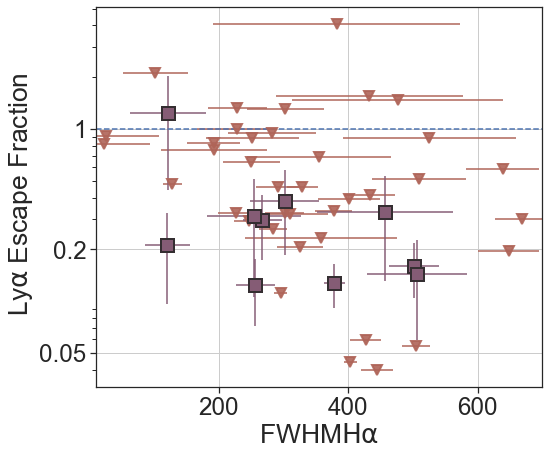

In [30]:
fig, axs = plt.subplots()
kwsLAE= dict(linewidth = 1,fmt="s",markeredgecolor="#342E31",alpha=1\
            ,capsize=0,markeredgewidth=2,markersize=13,zorder=100,elinewidth=2,color=cmap(0.1),label=r"Ly$\mathrm{\alpha}$ + H$\mathrm{\alpha}$")

kwsU= dict(linewidth = 2,fmt="v",alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=10,zorder=2,elinewidth=2,color=cmap(0.8),label=r"Only H$\mathrm{\alpha}$")

kwsL= dict(linewidth = 2,fmt="^",alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=10,zorder=2,elinewidth=2,color=cmap(0.5),label=r"Only Ly$\mathrm{\alpha}$")


mask=(Type=="LAE") & (dfesc>-1) #LAE
maskL=(Type=="LAE") & (np.isnan(dfesc)==True) & (fesc>-1) #LAE lowlim
maskU=(Type=="NonDetect") & (fesc>-1) #uplim


axs.errorbar(FWHMHa[maskU],fesc[maskU],xerr=dFWHMHa[maskU],fmt=" ",color=cmap(0.8))
axs.errorbar(FWHMHa[maskL],fesc[maskL],xerr=dFWHMHa[maskL],fmt=" ",color=cmap(0.5))
axs.errorbar(FWHMHa[mask],fesc[mask],yerr=dfesc[mask],xerr=dFWHMHa[mask],fmt=" ",color=cmap(0.1))

#Uplim
axs.errorbar(FWHMHa[maskU],fesc[maskU],**kwsU)
#lowlim
axs.errorbar(FWHMHa[maskL],fesc[maskL],**kwsL)

#Full
axs.errorbar(FWHMHa[mask],fesc[mask],**kwsLAE)




axs.axhline(y=1,ls="--")
#axs.set_ylim(-0,2)
axs.set_xlim(10,700)
#axs.legend(loc=3)
axs.set_xlabel(r"FWHM$\mathrm{H\alpha}$")
axs.set_ylabel(r" Ly$\mathrm{\alpha}$ Escape Fraction")
axs.set_yscale("log")
axs.set_yticks([0.05,0.2,1]) 
axs.set_yticklabels([0.05,0.2,1])
#axs.set_yticklabels([0,0.5,1,1.5,2])
plt.grid(zorder=0)
plt.savefig("Figures/fesc_ewha.pdf",dpi=200)
plt.show()

/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2141: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


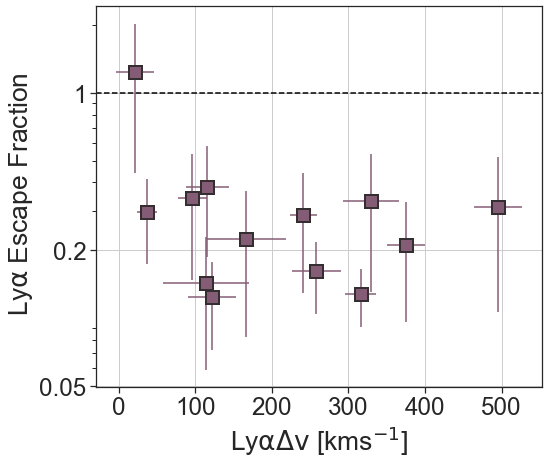

In [31]:
fig, axs = plt.subplots()
kwsLAE= dict(linewidth = 1,fmt="s",markeredgecolor="#342E31",alpha=1\
            ,capsize=0,markeredgewidth=2,markersize=13,zorder=100,elinewidth=2,color=cmap(0.1),label=r"Ly$\mathrm{\alpha}$ + H$\mathrm{\alpha}$")

kwsU= dict(linewidth = 2,fmt="v",alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=10,zorder=2,elinewidth=2,color=cmap(0.8),label=r"Only H$\mathrm{\alpha}$")

kwsL= dict(linewidth = 2,fmt="^",alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=10,zorder=2,elinewidth=2,color=cmap(0.5),label=r"Only Ly$\mathrm{\alpha}$")


mask=(Type=="LAE") & (dfesc>-1) #LAE
maskL=(Type=="LAE") & (np.isnan(dfesc)==True) & (fesc>-1) #LAE lowlim
maskU=(Type=="NonDetect") & (fesc>-1) #uplim


axs.errorbar(voff[maskU],fesc[maskU],xerr=dvoff[maskU],fmt=" ",color=cmap(0.8))
axs.errorbar(voff[maskL],fesc[maskL],xerr=dvoff[maskL],fmt=" ",color=cmap(0.5))
axs.errorbar(voff[mask],fesc[mask],yerr=dfesc[mask],xerr=dvoff[mask],fmt=" ",color=cmap(0.1))

#Uplim
axs.errorbar(voff[maskU],fesc[maskU],**kwsU)
#lowlim
axs.errorbar(voff[maskL],fesc[maskL],**kwsL)

#Full
axs.errorbar(voff[mask],fesc[mask],**kwsLAE)




axs.axhline(y=1,ls="--",color="black")
#axs.set_ylim(-0,2)
#axs.set_xlim(120,700)
#axs.legend(loc=3)
axs.set_xlabel(r"Ly$\mathrm{\alpha \Delta v}$ [kms$^{-1}$]")
axs.set_ylabel(r" Ly$\mathrm{\alpha}$ Escape Fraction")
#axs.set_yticks([0,0.5,1,1.5,2]) 
#axs.set_yticklabels([0,0.5,1,1.5,2])
axs.set_yscale("log")
axs.set_yticks([0.05,0.2,1]) 
axs.set_yticklabels([0.05,0.2,1])

plt.grid(zorder=0)
plt.savefig("Figures/fesc_dv.pdf",dpi=200)
plt.show()

/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2141: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


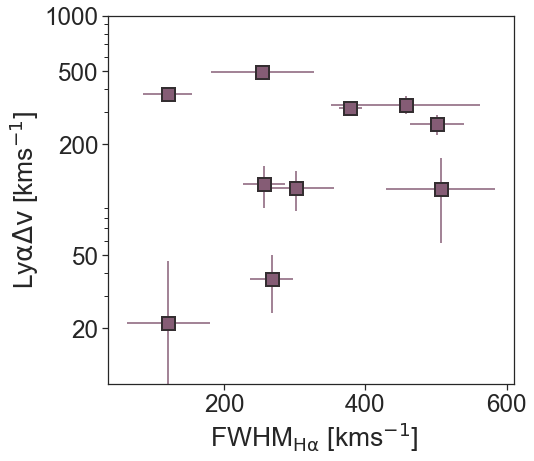

ValueError: array must not contain infs or NaNs

In [32]:
from scipy.stats import pearsonr

fig, axs = plt.subplots()
kwsLAE= dict(linewidth = 1,fmt="s",markeredgecolor="#342E31",alpha=1\
            ,capsize=0,markeredgewidth=2,markersize=13,zorder=100,elinewidth=2,color=cmap(0.1),label=r"Ly$\mathrm{\alpha}$ + H$\mathrm{\alpha}$")

kwsU= dict(linewidth = 2,fmt="v",alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=10,zorder=2,elinewidth=2,color=cmap(0.8),label=r"Only H$\mathrm{\alpha}$")

kwsL= dict(linewidth = 2,fmt="^",alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=10,zorder=2,elinewidth=2,color=cmap(0.5),label=r"Only Ly$\mathrm{\alpha}$")


mask=(Type=="LAE") & (dfesc>-1) #LAE
maskL=(Type=="LAE") & (np.isnan(dfesc)==True) & (fesc>-1) #LAE lowlim
maskU=(Type=="NonDetect") & (fesc>-1) #uplim




axs.errorbar(FWHMHa[maskU], voff[maskU], xerr=dFWHMHa[maskU], yerr=dvoff[maskU], fmt=" ", color=cmap(0.8))
axs.errorbar(FWHMHa[maskL], voff[maskL], xerr=dFWHMHa[maskL], yerr=dvoff[maskL], fmt=" ", color=cmap(0.5))
axs.errorbar(FWHMHa[mask], voff[mask], xerr=dFWHMHa[mask], yerr=dvoff[mask], fmt=" ", color=cmap(0.1))

# Uplim
axs.errorbar(FWHMHa[maskU], voff[maskU], **kwsU)
# Lowlim
axs.errorbar(FWHMHa[maskL], voff[maskL], **kwsL)
# Full
axs.errorbar(FWHMHa[mask], voff[mask], **kwsLAE)




#axs.axhline(y=1,ls="--")

#axs.set_xlim(120,700)
#axs.legend(loc=3)
#axs.set_yscale("log")
axs.set_ylabel(r"Ly$\mathrm{\alpha \Delta v}$ [kms$^{-1}$]")
axs.set_xlabel(r" FWHM$_{\mathrm{H\alpha}}$ [kms$^{-1}$]")
#axs.set_yticks([0,0.5,1,1.5,2]) 
#axs.set_yticklabels([0,0.5,1,1.5,2])
axs.set_ylim(10,1000)
dv_labels = (20,50,200,500,1000)
dv_labels2 = (20,50,200,500,1000)

axs.set_yscale("log")
plt.yticks(dv_labels,dv_labels2)
plt.tight_layout()
plt.savefig("Figures/fwhmha_dv.pdf",dpi=200,bbox_inches="tight")
plt.show()




# Calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(FWHMHa[mask], np.log10(voff[mask]))

print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

<ipython-input-33-8910976ebbd0>:21: RuntimeWarning: invalid value encountered in sqrt
  sigmaHa = np.sqrt((FWHMHa / FWHM_to_sigma)**2-(80)**2)
/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2141: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


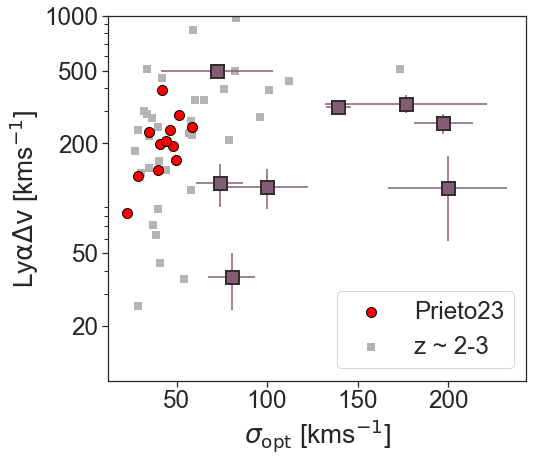

NameError: name 'corr' is not defined

In [33]:
from scipy.stats import pearsonr

fig, axs = plt.subplots()
kwsLAE= dict(linewidth = 1,fmt="s",markeredgecolor="#342E31",alpha=1\
            ,capsize=0,markeredgewidth=2,markersize=13,zorder=100,elinewidth=2,color=cmap(0.1))#,label=r"Ly$\mathrm{\alpha}$ + H$\mathrm{\alpha}$")

kwsU= dict(linewidth = 2,fmt="v",alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=10,zorder=2,elinewidth=2,color=cmap(0.8))#,label=r"Only H$\mathrm{\alpha}$")

kwsL= dict(linewidth = 2,fmt="^",alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=10,zorder=2,elinewidth=2,color=cmap(0.5))#,label=r"Only Ly$\mathrm{\alpha}$")


mask=(Type=="LAE") & (dfesc>-1) #LAE
maskL=(Type=="LAE") & (np.isnan(dfesc)==True) & (fesc>-1) #LAE lowlim
maskU=(Type=="NonDetect") & (fesc>-1) #uplim

FWHM_to_sigma = 2 * np.sqrt(2 * np.log(2))

# Convert FWHM to sigma
sigmaHa = np.sqrt((FWHMHa / FWHM_to_sigma)**2-(80)**2)
dsigmaHa = dFWHMHa / FWHM_to_sigma

axs.errorbar(sigmaHa[maskU], voff[maskU], xerr=dsigmaHa[maskU], yerr=dvoff[maskU], fmt=" ", color=cmap(0.8))
axs.errorbar(sigmaHa[maskL], voff[maskL], xerr=dsigmaHa[maskL], yerr=dvoff[maskL], fmt=" ", color=cmap(0.5))
axs.errorbar(sigmaHa[mask], voff[mask], xerr=dsigmaHa[mask], yerr=dvoff[mask], fmt=" ", color=cmap(0.1))

# Uplim
axs.errorbar(sigmaHa[maskU], voff[maskU], **kwsU)
# Lowlim
axs.errorbar(sigmaHa[maskL], voff[maskL], **kwsL)
# Full
axs.errorbar(sigmaHa[mask], voff[mask], **kwsLAE)


Prieto23_sigma = [
    39.57101161, 28.76323429, 22.76217341, 40.81384525, 49.86057255, 46.50033559,
    48.2577419, 51.29767956, 58.41889376, 34.96861947, 41.9805727, 44.357004
]

Prieto23_voff = [
    143.06856706, 132.5850269, 83.06644067, 198.98018896, 161.44484073,
    235.29396753, 192.08147966, 286.95013054, 244.78038618, 229.89173932,
    391.19912625, 206.83140877
]

Prieto23_z = [
    5.61795854, 5.18643788, 5.28243438, 5.42918643, 4.04281861, 3.57956407,
    3.95090728, 3.12872396, 4.79676796, 4.72461777, 3.47235959, 2.94022105
]

# Add Prieto23 data to the scatter plot
axs.scatter(Prieto23_sigma, Prieto23_voff, label='Prieto23', color='red', s=100, edgecolor="black", zorder=200)
erb_sigma = np.genfromtxt('/Users/gonzalo/Desktop/Code/GLASS_deltav/catalogs/velocity_offsets/e14laes.DV_sigma.dat', dtype=None, names=True, skip_header=1)
axs.scatter(erb_sigma['sigma'], erb_sigma['DV'],
            alpha=1, lw=0, color='0.7', s=60, marker='s', label='z ~ 2-3',zorder=0)


axs.set_ylabel(r"Ly$\mathrm{\alpha \Delta v}$ [kms$^{-1}$]")
axs.set_xlabel(r"$\sigma_{\mathrm{opt}}$ [kms$^{-1}$]")
axs.set_ylim(10,1000)
dv_labels = (20,50,200,500,1000)
dv_labels2 = (20,50,200,500,1000)

axs.set_yscale("log")
plt.yticks(dv_labels,dv_labels2)
plt.tight_layout()
plt.savefig("Figures/sigmaha_dv.pdf",dpi=200,bbox_inches="tight")
plt.legend()
plt.show()

# Calculate the Pearson correlation coefficient and p-value
#corr, p_value = pearsonr(sigmaHa[mask], np.log10(voff[mask]))

print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")


/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2141: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


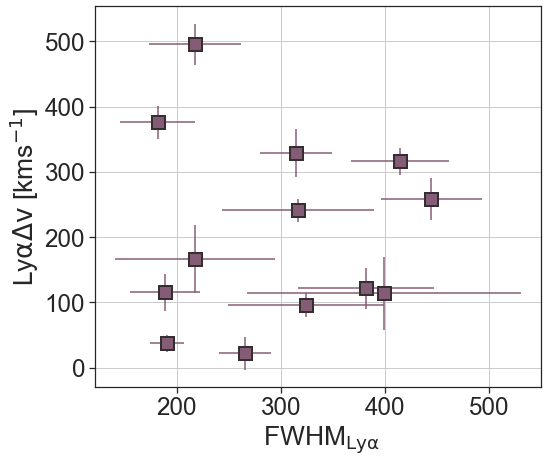

In [34]:
fig, axs = plt.subplots()
kwsLAE= dict(linewidth = 1,fmt="s",markeredgecolor="#342E31",alpha=1\
            ,capsize=0,markeredgewidth=2,markersize=13,zorder=100,elinewidth=2,color=cmap(0.1),label=r"Ly$\mathrm{\alpha}$ + H$\mathrm{\alpha}$")

kwsU= dict(linewidth = 2,fmt="v",alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=10,zorder=2,elinewidth=2,color=cmap(0.8),label=r"Only H$\mathrm{\alpha}$")

kwsL= dict(linewidth = 2,fmt="^",alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=10,zorder=2,elinewidth=2,color=cmap(0.5),label=r"Only Ly$\mathrm{\alpha}$")


mask=(Type=="LAE") & (dfesc>-1) #LAE|
maskL=(Type=="LAE") & (np.isnan(dfesc)==True) & (fesc>-1) #LAE lowlim
maskU=(Type=="NonDetect") & (fesc>-1) #uplim


axs.errorbar(FWHMLya[maskU],voff[maskU],xerr=dvoff[maskU],fmt=" ",color=cmap(0.8))
axs.errorbar(FWHMLya[maskL],voff[maskL],xerr=dvoff[maskL],fmt=" ",color=cmap(0.5))
axs.errorbar(FWHMLya[mask],voff[mask],yerr=dvoff[mask],xerr=dFWHMLya[mask],fmt=" ",color=cmap(0.1))

#Uplim
axs.errorbar(FWHMLya[maskU],voff[maskU],**kwsU)
#lowlim
axs.errorbar(FWHMLya[maskL],voff[maskL],**kwsL)
#Full
axs.errorbar(FWHMLya[mask],voff[mask],**kwsLAE)




#axs.axhline(y=1,ls="--")
#axs.set_ylim(-0,2)
#axs.set_xlim(120,700)
#axs.legend(loc=3)
axs.set_ylabel(r"Ly$\mathrm{\alpha \Delta v}$ [kms$^{-1}$]")
axs.set_xlabel(r" FWHM$_{\mathrm{Ly\alpha}}$")
#axs.set_yticks([0,0.5,1,1.5,2]) 
#axs.set_yticklabels([0,0.5,1,1.5,2])
plt.grid(zorder=0)
plt.savefig("Figures/fwhmlyaa_dv.pdf",dpi=200)
plt.show()

/Users/gonzalo/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2141: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
<ipython-input-35-24d903c015d9>:41: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "vvbox_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("Figures/merged_fwhmlyaa.pdf", dpi=200,vvbox_inches="tight")


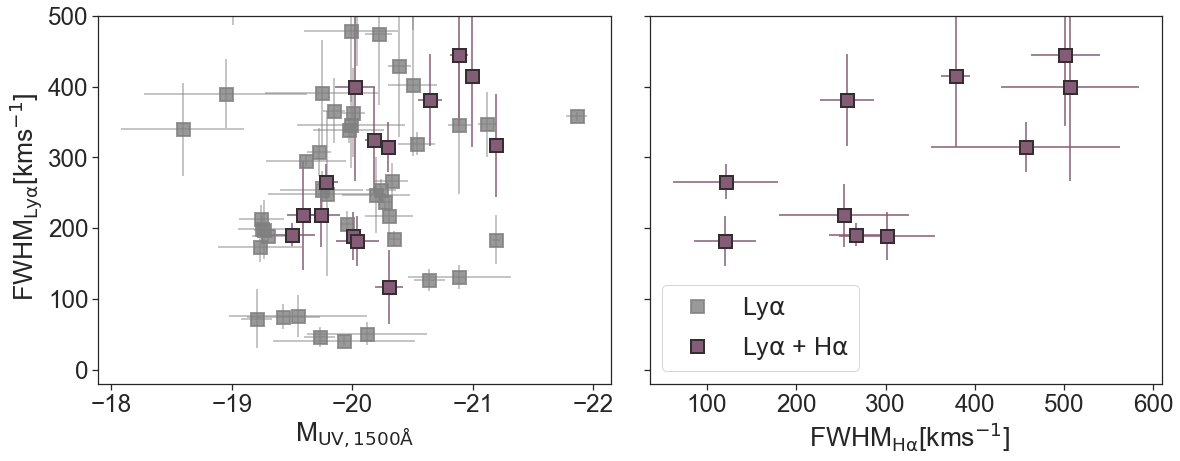

In [35]:
kwsLAE= dict(linewidth = 1,fmt="s",markeredgecolor="#342E31",alpha=1\
            ,capsize=0,markeredgewidth=2,markersize=13,zorder=100,elinewidth=2,color=cmap(0.1),label=r"Ly$\mathrm{\alpha}$ + H$\mathrm{\alpha}$")
kwsLAE2= dict(linewidth = 1,fmt="s",markeredgecolor="gray",alpha=0.8\
            ,capsize=0,markeredgewidth=2,markersize=13,zorder=100,elinewidth=2,color="gray",label=r"Ly$\mathrm{\alpha}$")
kwsU= dict(linewidth = 2,fmt="v",alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=10,zorder=2,elinewidth=2,color=cmap(0.8),label=r"Only H$\mathrm{\alpha}$")
kwsL= dict(linewidth = 2,fmt="^",alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=10,zorder=2,elinewidth=2,color=cmap(0.5),label=r"Only Ly$\mathrm{\alpha}$")
mask=FWHMLya>400
dFWHMLya[mask]=100

z=np.array(z)
mask=(Type=="LAE") & (zsys>1) #LAE
mask2=(Type=="LAE") & (np.isnan(zsys)) #LAE

fig, axs = plt.subplots(1, 2, figsize=(17, 7), sharey=True)

# First subplot
axs[0].errorbar(Muv[mask2], FWHMLya[mask2], xerr=dMuv[mask2], yerr=dFWHMLya[mask2], fmt=" ", color="gray", alpha=0.6)
axs[0].errorbar(Muv[mask], FWHMLya[mask], xerr=dMuv[mask], yerr=dFWHMLya[mask], fmt=" ", color=cmap(0.1))
axs[0].errorbar(Muv[mask2], FWHMLya[mask2], **kwsLAE2)
axs[0].errorbar(Muv[mask], FWHMLya[mask], **kwsLAE)
axs[0].set_xlabel(r"M$_{\mathrm{UV,1500\AA}}$")
axs[0].set_ylabel(r" FWHM$_{\mathrm{Ly\alpha}}$[kms$^{\mathrm{-1}}$]")
axs[0].invert_xaxis()
axs[0].set_ylim(00, 800)

#axs[0].grid(zorder=0)

# Second subplot
axs[1].errorbar(FWHMHa[mask2], FWHMLya[mask2], xerr=dFWHMHa[mask2], yerr=dFWHMLya[mask2], fmt=" ", color="gray", alpha=0.6)
axs[1].errorbar(FWHMHa[mask], FWHMLya[mask], xerr=dFWHMHa[mask], yerr=dFWHMLya[mask], fmt=" ", color=cmap(0.1))
axs[1].errorbar(FWHMHa[mask2], FWHMLya[mask2], **kwsLAE2)
axs[1].errorbar(FWHMHa[mask], FWHMLya[mask], **kwsLAE)
axs[1].set_xlabel(r" FWHM$_{\mathrm{H\alpha}}$[kms$^{\mathrm{-1}}$]")
#axs[1].grid(zorder=0)
axs[1].legend(fontsize=25)
axs[1].set_ylim(-20, 500)
fig.subplots_adjust(wspace=0.)
plt.tight_layout()
plt.savefig("Figures/merged_fwhmlyaa.pdf", dpi=200,vvbox_inches="tight")
plt.show()


Mean p-value: 0.093135038259848
Standard deviation of p-values: 0.12638661183385097


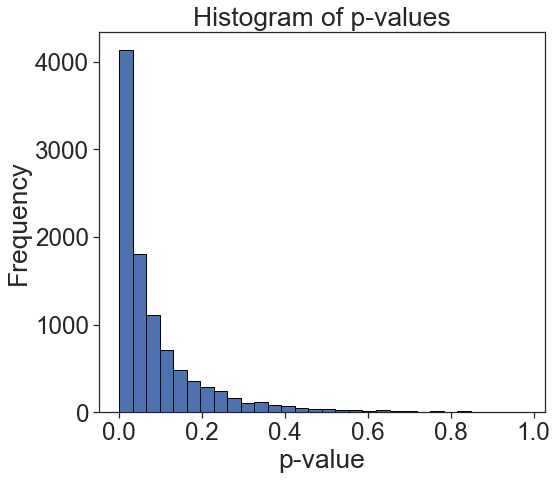

Mean p-value: 0.18710594720453663
Standard deviation of p-values: 0.20324406416993804


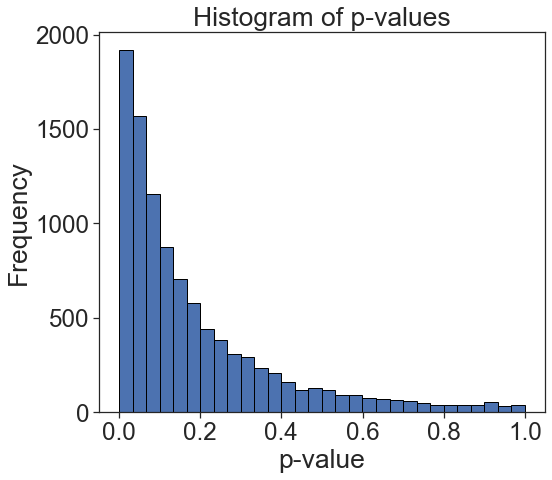

Mean p-value: 0.718526912559404
Standard deviation of p-values: 0.1910235854006459


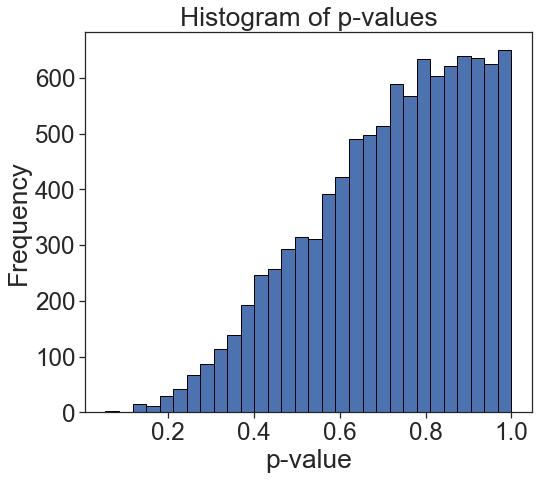

In [36]:
def calculate_p_values(x, dx, y, dy, num_iterations=10000):
    # Initialize arrays to store the results
    p_values = np.zeros(num_iterations)

    # Mask NaNs
    valid_mask = ~np.isnan(x) & ~np.isnan(dx) & ~np.isnan(y) & ~np.isnan(dy)
    x_valid = x[valid_mask]
    dx_valid = dx[valid_mask]
    y_valid = y[valid_mask]
    dy_valid = dy[valid_mask]

    # Iterate num_iterations times
    for i in range(num_iterations):
        # Draw random samples from a Gaussian distribution
        x_sample = np.random.normal(x_valid, dx_valid)
        y_sample = np.random.normal(y_valid, dy_valid)

        # Calculate the Pearson correlation coefficient and p-value
        _, p_value = pearsonr(x_sample, y_sample)
        p_values[i] = p_value

    # Calculate the mean and standard deviation of the p-values
    mean_p_value = np.mean(p_values)
    std_p_value = np.std(p_values)

    # Print the results
    print(f"Mean p-value: {mean_p_value}")
    print(f"Standard deviation of p-values: {std_p_value}")

    # Plot the histogram of p-values
    plt.hist(p_values, bins=30, edgecolor='black')
    plt.xlabel('p-value')
    plt.ylabel('Frequency')
    plt.title('Histogram of p-values')
    plt.show()

# Apply the function to FWHMLya vs Muv
mask=FWHMLya>400
dFWHMLya[mask]=150
calculate_p_values(FWHMLya, dFWHMLya, Muv, dMuv)

# Apply the function to FWHMLya vs FWHMHa
calculate_p_values(FWHMLya, dFWHMLya, FWHMHa, dFWHMHa)


calculate_p_values(voff, dvoff, FWHMHa, dFWHMHa)

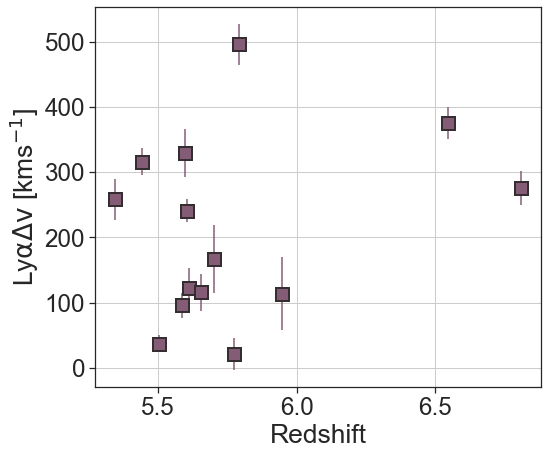

In [37]:
fig, axs = plt.subplots()
kwsLAE= dict(linewidth = 1,fmt="s",markeredgecolor="#342E31",alpha=1\
            ,capsize=0,markeredgewidth=2,markersize=13,zorder=100,elinewidth=2,color=cmap(0.1),label=r"Ly$\mathrm{\alpha}$ + H$\mathrm{\alpha}$")

kwsU= dict(linewidth = 2,fmt="v",alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=10,zorder=2,elinewidth=2,color=cmap(0.8),label=r"Only H$\mathrm{\alpha}$")

kwsL= dict(linewidth = 2,fmt="^",alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=10,zorder=2,elinewidth=2,color=cmap(0.5),label=r"Only Ly$\mathrm{\alpha}$")

z=np.array(z)
mask=(Type=="LAE") & (dfesc>-1) #LAE
maskL=(Type=="LAE") & (np.isnan(dfesc)==True) & (fesc>-1) #LAE lowlim
maskU=(Type=="NonDetect") & (fesc>-1) #uplim


#axs.errorbar(z[maskU],voff[maskU],yerr=dvoff[maskU],fmt=" ",color=cmap(0.8))
#axs.errorbar(z[maskL],voff[maskL],yerr=dvoff[maskL],fmt=" ",color=cmap(0.5))
axs.errorbar(z,voff,yerr=dvoff,fmt=" ",color=cmap(0.1))

#Uplim
#axs.errorbar(z[maskU],voff[maskU],**kwsU)
#lowlim
#axs.errorbar(z[maskL],voff[maskL],**kwsL)
#Full
axs.errorbar(z,voff,**kwsLAE)




#axs.axhline(y=1,ls="--")
#axs.set_ylim(-0,2)
#axs.set_xlim(120,700)
#axs.legend(loc=3)
axs.set_ylabel(r"Ly$\mathrm{\alpha \Delta v}$ [kms$^{-1}$]")
axs.set_xlabel(r"Redshift")
#axs.set_yticks([0,0.5,1,1.5,2]) 
#axs.set_yticklabels([0,0.5,1,1.5,2])
plt.grid(zorder=0)
plt.savefig("Figures/z_dv.pdf",dpi=200)
plt.show()

In [38]:
Bunker23={}
Bunker23["Muv"]=[-21.5]
Bunker23["LyaOff"]=[555.0]
Bunker23["LyaEW"]=[18.0]
Bunker23["z"]=[10.5]

tang23=ascii.read("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/velocity_offsets/Tang23.txt")
tang24=ascii.read("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/velocity_offsets/Tang24.txt")
Cass1=ascii.read("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/velocity_offsets/cassata1.dat")
Cass2=ascii.read("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/velocity_offsets/cassata2.dat")
CassDic={}
CassDic["ID"]=[]
CassDic["LyaEW"]=[]
CassDic["Muv"]=[]
CassDic["LyaOff"]=[]
CassDic["z"]=[]

def toNeg(val):
    if val<0:
        return val
    if val>0:
        return -1*val

for i in range(0,len(Cass1)):
    CassDic["ID"].append(Cass1[i]["ID"])
    CassDic["z"].append(Cass2[i]["zCII"])
    CassDic["Muv"].append(toNeg(Cass1[i]["MFUV"]))
    CassDic["LyaEW"].append(Cass2[i]["EWLya"])
    CassDic["LyaOff"].append(Cass2[i]["offsetLya"])



In [39]:
Catalog[Catalog["id_charlotte"]=="z5_GND_21153"]["voff"]

315.8296295396785


<ipython-input-40-3764b08ab00b>:11: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  erb      = np.genfromtxt('/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/velocity_offsets/e14laes.muv_specew_photew_dv_zneb.dat', dtype=None, names=True)
<ipython-input-40-3764b08ab00b>:13: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  stark    = np.genfromtxt('/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/velocity_offsets/Stark_vel_off_highz.txt', dtype=None, names=True)


121.59045460664453 -20.64337968295851
115.5867217298377 -20.003607960626795
95.94860266393484 -20.176336648033086
113.83944081246861 -20.023482682342028


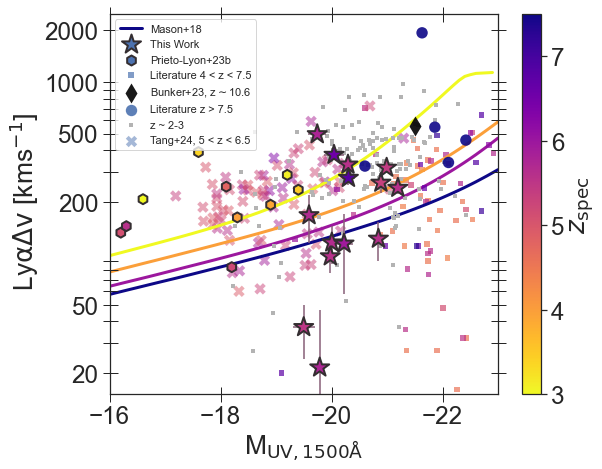

In [40]:
plt.rcParams["figure.figsize"] = (8.7,7.)
sns.set_theme(style="ticks",font_scale=2.2)
norm = mpl.colors.Normalize(vmin=3., vmax=7.5)
fig, axs = plt.subplots()

modelF=ascii.read("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/velocity_offsets/M18_DV_Muv_z_faint.txt")
modelMUV,model2,model4,model6,model8=modelF["Muv"],modelF["z=2"],modelF["z=4"],modelF["z=6"],modelF["z=8"]


erb_c    = np.genfromtxt('/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/velocity_offsets/compsample.muv_wlya_dv_zneb.dat', skip_header=1, names=True)
erb      = np.genfromtxt('/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/velocity_offsets/e14laes.muv_specew_photew_dv_zneb.dat', dtype=None, names=True)
schenker = np.genfromtxt('/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/velocity_offsets/schenker_z3.txt', dtype=None, names=True)
stark    = np.genfromtxt('/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/velocity_offsets/Stark_vel_off_highz.txt', dtype=None, names=True)


GPL23=[[-16.6,-19.2,-17.6,-19.4,-18.9,-18.3,-15.4,-18.1,-16.2,-18.2,-15.7,-16.3],[207,287,390,235,192,162,230,245,132,83,199,144],[2.9,3.1,3.4,3.5,3.9,4,4.7,4.8,5.1,5.2,5.4,5.6]]

# Combine the data
sample_lowz = {'Muv':np.concatenate((erb['muv'], erb_c['muv'])),
              'deltav':np.concatenate((erb['dv'], erb_c['dv'])),
              'ew':np.concatenate((erb['photew'],erb_c['wlya']))}

sample_lowz['ew']    = sample_lowz['ew'][sample_lowz['deltav'] > 0.]
sample_lowz['Muv']    = sample_lowz['Muv'][sample_lowz['deltav'] > 0.]
sample_lowz['deltav'] = sample_lowz['deltav'][sample_lowz['deltav'] > 0.]
maskStarkz=stark['zspec']<7.5



kwsLAE= dict(linewidth = 2,marker="*",edgecolor="#342E31",alpha=1\
            ,s=400,zorder=100,label=r"This Work")

modifier=[]
mod=[-0.2,0,0.2,-0.2,0.2]
x=0
for i,j in zip(voff,Muv):
    if i<150 and i>50:
        print(i,j)
        modifier.append(mod[x])
        x=x+1
    else:
        modifier.append(0)

#modvoff=[20 if gal<10 else gal for gal in voff]


mask_lower= (voff > 0) & np.isnan(dvoff) #Lower than our resolution

axs.errorbar(Muv+modifier,voff,yerr=dvoff,xerr=dMuv,fmt=" ",color=cmap(0.1))
axs.scatter(Muv+modifier,voff,cmap='plasma_r',norm=norm,c=z,**kwsLAE)



im=axs.scatter(GPL23[0],GPL23[1],c=GPL23[2],marker="h",s=100,label="Prieto-Lyon+23b",edgecolor="#342E31",linewidth=2,cmap='plasma_r',norm=norm)

#Full

c_map  = mpl.cm.plasma_r
# Scalar mappable of normalized array to colormap
s_map  = mpl.cm.ScalarMappable(cmap=c_map, norm=norm)
s_map.set_array([])


plt.scatter(stark['M_uv'][maskStarkz], stark['del_v'][maskStarkz], c=stark['zspec'][maskStarkz], marker='s', cmap='plasma_r', norm=norm, 
                edgecolors=None, alpha=0.7, lw=0, s=30, zorder=10, label='Literature 4 < z < 7.5')

plt.scatter(CassDic["Muv"], CassDic["LyaOff"], c=CassDic["z"], marker='s', cmap='plasma_r', norm=norm, 
                edgecolors=None, alpha=0.7, lw=0, s=30, zorder=0)
plt.scatter(Bunker23["Muv"],Bunker23["LyaOff"],c="black", marker='d', 
                edgecolors=None, alpha=0.9, lw=0, s=200, zorder=10,label=r"Bunker+23, z$\sim$10.6")
plt.scatter(stark['M_uv'][~maskStarkz], stark['del_v'][~maskStarkz], c=stark['zspec'][~maskStarkz], marker='o', cmap='plasma_r', norm=norm, 
                edgecolors=None, alpha=0.9, lw=0, s=130, zorder=10)               
plt.scatter(tang23["Muv"],tang23["delta_v"],c=tang23["z_sys"], marker='o', cmap='plasma_r', norm=norm, 
                edgecolors=None, alpha=0.9, lw=0, s=130, zorder=10,label=r"Literature z > 7.5")

plt.scatter(sample_lowz['Muv'], sample_lowz['deltav'], 
            alpha=1, lw=0, color='0.7', s=10, marker='s', label='z ~ 2-3')

plt.scatter(tang24["Muv"],tang24["voff"],c=tang24["zlya"], marker='X', cmap='plasma_r', norm=norm, 
                edgecolors=None, alpha=0.5, lw=0, s=130, zorder=0,label=r"Tang+24, 5 < z < 6.5")



plt.colorbar(im, label='$z_\mathrm{spec}$', orientation='vertical')
plt.plot(modelMUV,model2,"-",lw=3,c=s_map.to_rgba(2),zorder=0)
plt.plot(modelMUV,model4,"-",lw=3,c=s_map.to_rgba(4),zorder=0)
plt.plot(modelMUV,model6,"-",lw=3,c=s_map.to_rgba(6),zorder=0)
plt.plot(modelMUV,model8,"-",lw=3,c=s_map.to_rgba(8),label="Mason+18",zorder=0)


#axs.axhline(y=1,ls="--")
#axs.set_ylim(-0,2)
axs.set_xlim(-16,-23)
axs.tick_params(axis='both', direction='inout', length=15, width=1, which='both', top=True, right=True)  # Set the length and width of the ticks

axs.legend(loc=2,fontsize=11)
axs.set_xlabel(r"M$_{\mathrm{UV,1500\AA}}$")
axs.set_ylabel(r" Ly$\mathrm{\alpha\Delta v}$ [kms$^{-1}$]")
axs.set_yscale("log")
axs.set_ylim(15,2500)
dv_labels = (20,50,200,500,1000,2000)
dv_labels2 = (20,50,200,500,1000,2000)
plt.yticks(dv_labels,dv_labels2)
#axs.set_xticks([-19,-20,-21]) 
#axs.set_xticklabels([-19,-20,-21])
#plt.grid(zorder=0)
plt.savefig("Figures/voff_Muv.pdf",dpi=200,bbox_inches="tight")
plt.show()

In [41]:
mask=tang24["Muv"]<-19.5

np.nanstd(tang24["voff"][mask])

156.16522144475348

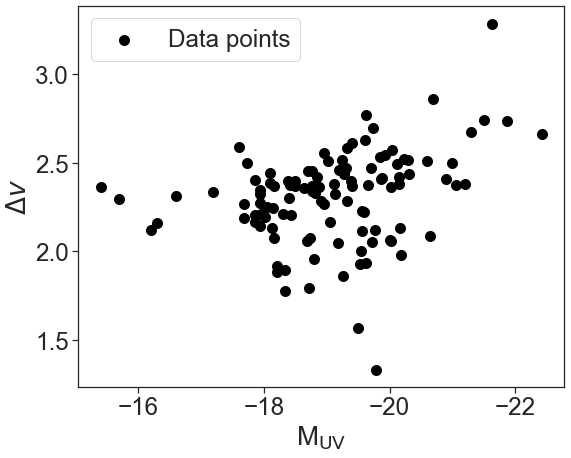

Pearson correlation coefficient: -0.3105661125935866
P-value: 0.0009596904710812396


In [42]:
from scipy.stats import pearsonr

# Combine all Muv values into one array
combined_Muv = np.concatenate([GPL23[0], Muv, tang24["Muv"], tang23["Muv"], Bunker23["Muv"]])

# Combine all voff values into one array
combined_voff = np.log10(np.concatenate([GPL23[1], voff, tang24["voff"], tang23["delta_v"], Bunker23["LyaOff"]]))

plt.scatter(combined_Muv, combined_voff, c='black', marker='o', s=100, edgecolor='black', label='Data points')
plt.xlabel(r'M$_\mathrm{UV}$')
plt.ylabel(r'$\Delta v$')
plt.legend()
plt.gca().invert_xaxis()
plt.show()

# Calculate the Pearson correlation coefficient and p-value
# Mask NaNs
valid_mask = ~np.isnan(combined_Muv) & ~np.isnan(combined_voff)
combined_Muv = combined_Muv[valid_mask]
combined_voff = combined_voff[valid_mask]
corr, p_value = pearsonr(combined_Muv, combined_voff)

print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")


<ipython-input-43-ad22381b0067>:10: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  erb = np.genfromtxt('/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/velocity_offsets/e14laes.muv_specew_photew_dv_zneb.dat', dtype=None, names=True)
<ipython-input-43-ad22381b0067>:12: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  stark = np.genfromtxt('/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/velocity_offsets/Stark_vel_off_highz.txt', dtype=None, names=True)


121.59045460664453 -20.64337968295851
115.5867217298377 -20.003607960626795
95.94860266393484 -20.176336648033086
113.83944081246861 -20.023482682342028


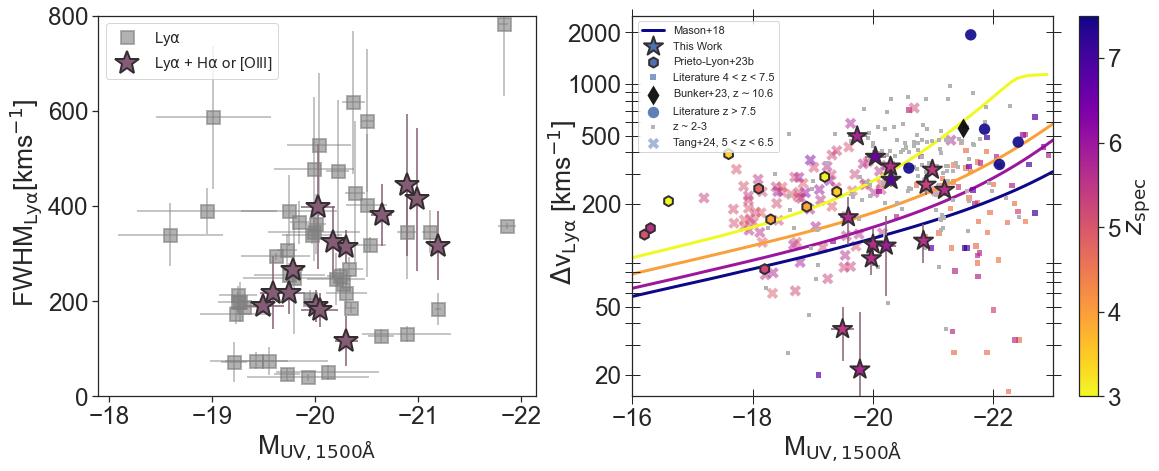

In [43]:
plt.rcParams["figure.figsize"] = (19, 7)
sns.set_theme(style="ticks", font_scale=2.2)
norm = mpl.colors.Normalize(vmin=3., vmax=7.5)
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1.2]}) 

modelF = ascii.read("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/velocity_offsets/M18_DV_Muv_z_faint.txt")
modelMUV, model2, model4, model6, model8 = modelF["Muv"], modelF["z=2"], modelF["z=4"], modelF["z=6"], modelF["z=8"]

erb_c = np.genfromtxt('/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/velocity_offsets/compsample.muv_wlya_dv_zneb.dat', skip_header=1, names=True)
erb = np.genfromtxt('/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/velocity_offsets/e14laes.muv_specew_photew_dv_zneb.dat', dtype=None, names=True)
schenker = np.genfromtxt('/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/velocity_offsets/schenker_z3.txt', dtype=None, names=True)
stark = np.genfromtxt('/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/velocity_offsets/Stark_vel_off_highz.txt', dtype=None, names=True)

GPL23 = [[-16.6, -19.2, -17.6, -19.4, -18.9, -18.3, -15.4, -18.1, -16.2, -18.2, -15.7, -16.3], [207, 287, 390, 235, 192, 162, 230, 245, 132, 83, 199, 144], [2.9, 3.1, 3.4, 3.5, 3.9, 4, 4.7, 4.8, 5.1, 5.2, 5.4, 5.6]]

# Combine the data
sample_lowz = {'Muv': np.concatenate((erb['muv'], erb_c['muv'])),
               'deltav': np.concatenate((erb['dv'], erb_c['dv'])),
               'ew': np.concatenate((erb['photew'], erb_c['wlya']))}

sample_lowz['ew'] = sample_lowz['ew'][sample_lowz['deltav'] > 0.]
sample_lowz['Muv'] = sample_lowz['Muv'][sample_lowz['deltav'] > 0.]
sample_lowz['deltav'] = sample_lowz['deltav'][sample_lowz['deltav'] > 0.]
maskStarkz = stark['zspec'] < 7.5

kwsLAE = dict(linewidth=2, marker="*", edgecolor="#342E31", alpha=1, s=400, zorder=100, label=r"This Work")

modifier = []
mod = [-0.2, 0, 0.2, -0.2, 0.2]
x = 0
for i, j in zip(voff, Muv):
    if 150 > i > 50:
        print(i, j)
        modifier.append(mod[x])
        x = x + 1
    else:
        modifier.append(0)

mask_lower = (voff > 0) & np.isnan(dvoff)  # Lower than our resolution

ax2.errorbar(Muv + modifier, voff, yerr=dvoff, xerr=dMuv, fmt=" ", color=cmap(0.1))
ax2.scatter(Muv + modifier, voff, cmap='plasma_r', norm=norm, c=z, **kwsLAE)

kwsLAE2 = dict(linewidth=2, marker="*", edgecolor="#342E31", alpha=1, s=400, zorder=100)
#ax2.errorbar(FWHMHa, voff, xerr=dFWHMHa, yerr=dvoff, fmt=" ", color=cmap(0.1))
#ax2.scatter(FWHMHa, voff, cmap='plasma_r',norm=norm, c=z, **kwsLAE2)



im = ax2.scatter(GPL23[0], GPL23[1], c=GPL23[2], marker="h", s=100, label="Prieto-Lyon+23b", edgecolor="#342E31", linewidth=2, cmap='plasma_r', norm=norm)

# Full
c_map = mpl.cm.plasma_r
# Scalar mappable of normalized array to colormap
s_map = mpl.cm.ScalarMappable(cmap=c_map, norm=norm)
s_map.set_array([])

ax2.scatter(stark['M_uv'][maskStarkz], stark['del_v'][maskStarkz], c=stark['zspec'][maskStarkz], marker='s', cmap='plasma_r', norm=norm,
            edgecolors=None, alpha=0.7, lw=0, s=30, zorder=10, label='Literature 4 < z < 7.5')

ax2.scatter(CassDic["Muv"], CassDic["LyaOff"], c=CassDic["z"], marker='s', cmap='plasma_r', norm=norm,
            edgecolors=None, alpha=0.7, lw=0, s=30, zorder=0)
ax2.scatter(Bunker23["Muv"], Bunker23["LyaOff"], c="black", marker='d',
            edgecolors=None, alpha=0.9, lw=0, s=200, zorder=10, label=r"Bunker+23, z$\sim$10.6")
ax2.scatter(stark['M_uv'][~maskStarkz], stark['del_v'][~maskStarkz], c=stark['zspec'][~maskStarkz], marker='o', cmap='plasma_r', norm=norm,
            edgecolors=None, alpha=0.9, lw=0, s=130, zorder=10)
ax2.scatter(tang23["Muv"], tang23["delta_v"], c=tang23["z_sys"], marker='o', cmap='plasma_r', norm=norm,
            edgecolors=None, alpha=0.9, lw=0, s=130, zorder=10, label=r"Literature z > 7.5")

ax2.scatter(sample_lowz['Muv'], sample_lowz['deltav'],
            alpha=1, lw=0, color='0.7', s=10, marker='s', label='z ~ 2-3')

ax2.scatter(tang24["Muv"], tang24["voff"], c=tang24["zlya"], marker='X', cmap='plasma_r', norm=norm,
            edgecolors=None, alpha=0.5, lw=0, s=130, zorder=0, label=r"Tang+24, 5 < z < 6.5")



ax2.plot(modelMUV,model2,"-",lw=3,c=s_map.to_rgba(2),zorder=0)
ax2.plot(modelMUV,model4,"-",lw=3,c=s_map.to_rgba(4),zorder=0)
ax2.plot(modelMUV,model6,"-",lw=3,c=s_map.to_rgba(6),zorder=0)
ax2.plot(modelMUV,model8,"-",lw=3,c=s_map.to_rgba(8),label="Mason+18",zorder=0)


ax2.set_xlim(-16, -23)
ax2.tick_params(axis='both', direction='inout', length=15, width=1, which='both', top=True, right=True)  # Set the length and width of the ticks

ax2.legend(loc=2, fontsize=11)
ax2.set_xlabel(r"M$_{\mathrm{UV,1500\AA}}$")
ax2.set_ylabel(r" $\Delta$v$_{\mathrm{Ly\alpha}}$ [kms$^{-1}$]")
ax2.set_yscale("log")
ax2.yaxis.set_label_coords(-0.12, 0.5)
ax2.set_ylim(15, 2500)
dv_labels = (20, 50, 200, 500, 1000, 2000)
dv_labels2 = (20, 50, 200, 500, 1000, 2000)
ax2.set_yticks(dv_labels)
ax2.set_yticklabels(dv_labels2)

# Plot Lyaoffset vs FWHMHa on the secondary Y-axis
#marker="*", edgecolor="#342E31", alpha=1, s=400, zorder=100,
kwsLAE= dict(linewidth = 1,fmt="*",markeredgecolor="#342E31",alpha=1\
            ,capsize=0,markeredgewidth=2,markersize=25,zorder=100,elinewidth=2,color=cmap(0.1),label=r"Ly$\mathrm{\alpha}$ + H$\mathrm{\alpha}$ or [OIII]")
kwsLAE2= dict(linewidth = 1,fmt="s",markeredgecolor="gray",alpha=0.6\
            ,capsize=0,markeredgewidth=2,markersize=13,zorder=100,elinewidth=2,color="gray",label=r"Ly$\mathrm{\alpha}$")
kwsU= dict(linewidth = 2,fmt="v",alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=10,zorder=2,elinewidth=2,color=cmap(0.8),label=r"Only H$\mathrm{\alpha}$")
kwsL= dict(linewidth = 2,fmt="^",alpha=0.9\
            ,capsize=0,markeredgewidth=2,markersize=10,zorder=2,elinewidth=2,color=cmap(0.5),label=r"Only Ly$\mathrm{\alpha}$")
#mask=FWHMLya>400
#dFWHMLya[mask]=100

z=np.array(z)
mask=(Type=="LAE") & (zsys>1) #LAE
mask2=(Type=="LAE") & (np.isnan(zsys)) #LAE

ax1.errorbar(Muv[mask2], FWHMLya[mask2], xerr=dMuv[mask2], yerr=dFWHMLya[mask2], fmt=" ", color="gray", alpha=0.6)
ax1.errorbar(Muv[mask], FWHMLya[mask], xerr=dMuv[mask], yerr=dFWHMLya[mask], fmt=" ", color=cmap(0.1))
ax1.errorbar(Muv[mask2], FWHMLya[mask2], **kwsLAE2)
ax1.errorbar(Muv[mask], FWHMLya[mask], **kwsLAE)
ax1.set_xlabel(r"M$_{\mathrm{UV,1500\AA}}$")
ax1.set_ylabel(r" FWHM$_{\mathrm{Ly\alpha}}$[kms$^{\mathrm{-1}}$]")
ax1.invert_xaxis()
#ax1.set_aspect(0.005)
ax1.set_ylim(00, 800)
ax1.legend(fontsize=15)


#axs.axhline(y=1,ls="--")

#axs.set_xlim(120,700)
#axs.legend(loc=3)
#axs.set_yscale("log")


#ax2.set_aspect(250)
#ax2.set_xlabel(r" FWHM$_{\mathrm{H\alpha}}$ [kms$^{-1}$]")

#ax2.set_ylim(15, 2500)

plt.subplots_adjust(wspace=0.2)
plt.colorbar(im, ax=ax2, label='$z_\mathrm{spec}$', orientation='vertical')

plt.savefig("Figures/merged_fwhmlyaa_voff.pdf", dpi=200, bbox_inches="tight")
plt.show()


In [44]:
list(dFWHMLya[mask2])

[75.18771445192469,
 116.67468887378234,
 65.90138901208623,
 150.0,
 48.42708602508563,
 18.27593206652619,
 63.124895414037724,
 nan,
 16.01107535372326,
 15.551437473955872,
 14.030017634169706,
 26.855726525220188,
 150.0,
 150.0,
 150.0,
 150.0,
 17.815738027509994,
 11.338298407267684,
 16.5519323651941,
 97.26553472823298,
 34.18353811307043,
 46.070231686115015,
 150.0,
 29.393657830329754,
 150.0,
 7.969736694220519,
 29.72460767287763,
 150.0,
 41.312490365752424,
 10.388400264881172,
 16.859703740610005,
 20.113907105991693,
 18.072113066201968,
 7.616016023798315,
 45.58106104263765,
 20.00391061994707,
 7.655163518013766,
 15.876776584172715,
 21.62473502592441,
 34.04912849298497,
 42.23580217518872,
 25.100358357077766,
 54.049271507001386,
 150.0,
 61.528752052503066,
 6.210632516947095]

In [45]:
# Find the index of the object with the lowest voff
min_voff_index = np.nanargmin(voff)

# Get the ID of the object with the lowest voff
lowest_voff_id = Catalog[min_voff_index]["id_charlotte"]
print("ID of the object with the lowest voff:", lowest_voff_id)

ID of the object with the lowest voff: z5_GND_17752


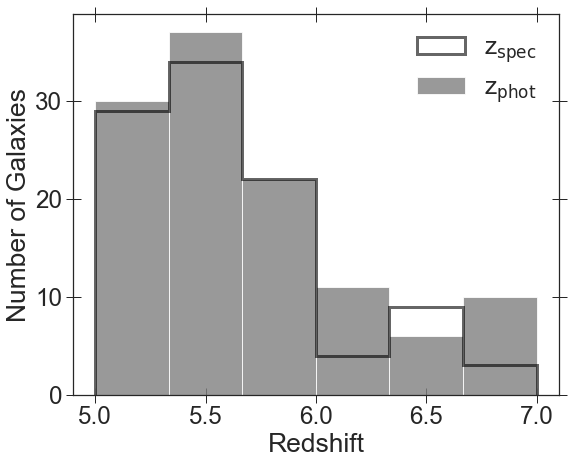

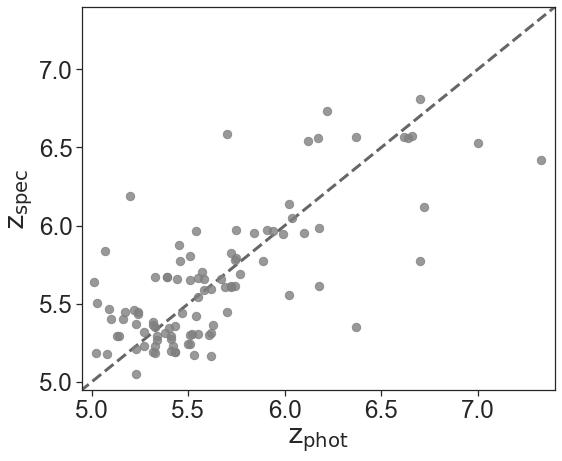

In [46]:
plt.rcParams["figure.figsize"] = (8.7,7.)


fig, axs = plt.subplots()
z=np.array(z)



mask1=( np.isnan(Catalog["zsys"])==False ) | ( np.isnan(Catalog["z"])==False )

axs.hist(z[mask1],color=cmap(0.1),label=r"z$_{\mathrm{spec}}$",range=[5,7],bins=6,alpha=0.6,linestyle="-",lw=3,edgecolor="black",histtype='step',zorder=2)
axs.hist(z[~mask1],color="gray",label=r"z$_\mathrm{phot}$",range=[5,7],bins=6,alpha=0.8,zorder=1)

#axs.set_yticks([2,4,6]) 
#axs.set_yticklabels([2,4,6])

axs.set_xlabel(r"Redshift")
axs.set_ylabel(r"Number of Galaxies")

axs.legend(frameon=False)
axs.tick_params(axis='both', direction='inout', length=15, width=1, which='both', top=True, right=True)  # Set the length and width of the ticks

#plt.grid(zorder=-100)
plt.savefig("Figures/Redshift.pdf",dpi=200)
plt.show()


plt.rcParams["figure.figsize"] = (8.4,7.)
zphot=Catalog["photoz"]
zspec=[]
for gal in Catalog:
    if np.isnan(gal["zsys"])==False:
        zspec.append(gal["zsys"])
    else:
        zspec.append(gal["z"])


zphot=Catalog["photoz"]
zlya=[]
for gal in Catalog:
    if np.isnan(gal["z"])==False:
        zlya.append(gal["z"])
    else:
        zlya.append(np.nan)

#plt.scatter(zphot,zlya,zorder=11)
plt.scatter(zphot,zspec,color="gray",alpha=0.8,zorder=10,s=70)
plt.plot([4.94,7.4],[4.94,7.4],color="black",ls="--",lw=3,alpha=0.6,zorder=1)
plt.xlabel(r"z$_\mathrm{phot}$",fontsize=28)
plt.ylabel(r"z$_\mathrm{spec}$",fontsize=28)
plt.xlim(4.95,7.4)
plt.ylim(4.95,7.4)

plt.tight_layout()
plt.savefig("Figures/zphot_zspec.pdf",dpi=200,bbox_inches="tight")
plt.show()

In [46]:
dif=np.abs(zphot-zspec)

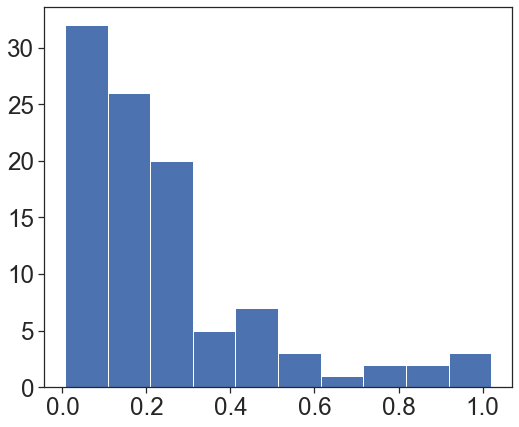

0.16494152817231011


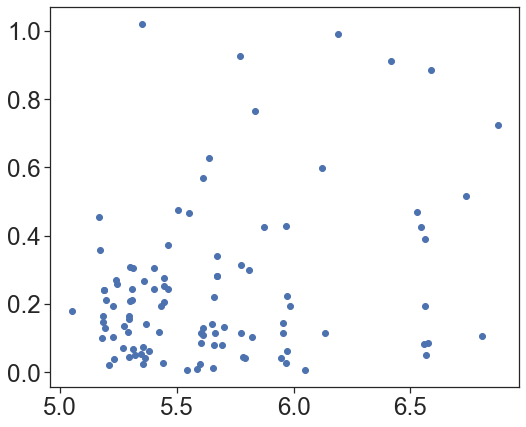

In [47]:
plt.hist(dif)
plt.show()
print(np.nanmedian(dif))

plt.scatter(zspec,dif)

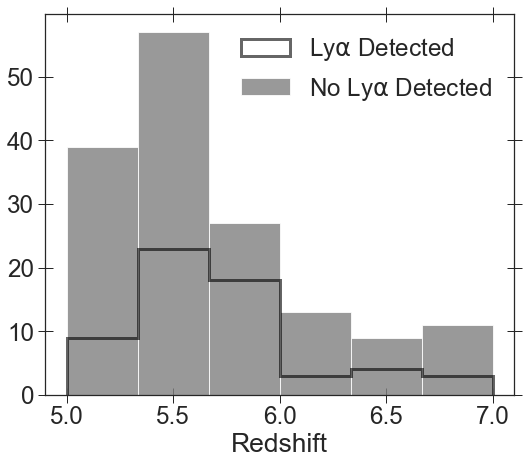

In [48]:
fig, axs = plt.subplots()
z=np.array(z)
zsys=list(z[maskL])+list(z[maskU])+list(z[mask])

#mask=(Type=="LAE") & (dfesc>-1) #LAE

#maskL=(Type=="LAE") & (np.isnan(dfesc)==True) & (fesc>-1) & (np.isnan(Catalog["zsys"])==True) #LAE lowlim

#maskU=(Type=="NonDetect") & (fesc>-1) & (np.isnan(Catalog["zsys"])==False)  #uplim

mask2= ( np.isnan(Catalog["z"])==False )

axs.hist(z[mask2],color=cmap(0.1),label=r"Ly$\mathrm{\alpha}$ Detected",range=[5,7],bins=6,alpha=0.6,linestyle="-",lw=3,edgecolor="black",histtype='step',zorder=2)
#axs.hist(z[mask1],color=cmap(0.8),label=r"z$_\mathrm{sys}$",range=[5,7],bins=6,alpha=0.9,zorder=2,histtype="step",lw=3)

#axs.hist(z[mask],color=cmap(0.1),label=r"Ly$\mathrm{\alpha}$ + H$\mathrm{\alpha}$",range=[5,7],bins=6,alpha=0.8,zorder=2)

zphot=[]
idx=[]
for gal in Catalog:
    if np.isnan(gal["z"])==True:
        idx.append(gal["id_charlotte"])
        zphot.append(gal["photoz"])

axs.hist(zphot,color="gray",label=r"No Ly$\mathrm{\alpha}$ Detected",range=[5,7],bins=6,alpha=0.8,zorder=1)

#axs.set_yticks([2,4,6]) 
#axs.set_yticklabels([2,4,6])

axs.set_xlabel(r"Redshift")
axs.legend(frameon=False)
axs.tick_params(axis='both', direction='inout', length=15, width=1, which='both', top=True, right=True)  # Set the length and width of the ticks

#plt.grid(zorder=-100)
plt.savefig("Figures/Redshift2.pdf",dpi=200)
plt.show()

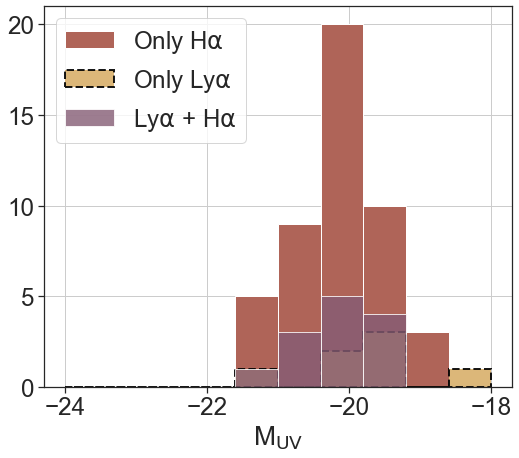

In [49]:
fig, axs = plt.subplots()

mask=(Type=="LAE") & (dfesc>-1) #LAE
maskL=(Type=="LAE") & (np.isnan(dfesc)==True) & (fesc>-1) #LAE lowlim
maskU=(Type=="NonDetect") & (fesc>-1) #uplim


axs.hist(Muv[maskU],color=cmap(0.8),label=r"Only H$\mathrm{\alpha}$",range=[-24,-18],alpha=1)
axs.hist(Muv[maskL],color=cmap(0.5),label=r"Only Ly$\mathrm{\alpha}$",range=[-24,-18],alpha=0.9,linestyle="--",lw=2,edgecolor="black",histtype='stepfilled')
axs.hist(Muv[mask],color=cmap(0.1),label=r"Ly$\mathrm{\alpha}$ + H$\mathrm{\alpha}$",range=[-24,-18],alpha=0.8)
#axs.set_yticks([2,4,6]) 
#axs.set_yticklabels([2,4,6])

axs.set_xlabel(r"M$_{\mathrm{UV}}$")
axs.legend()
plt.grid()
plt.savefig("Figures/Muv.pdf",dpi=200)
plt.show()

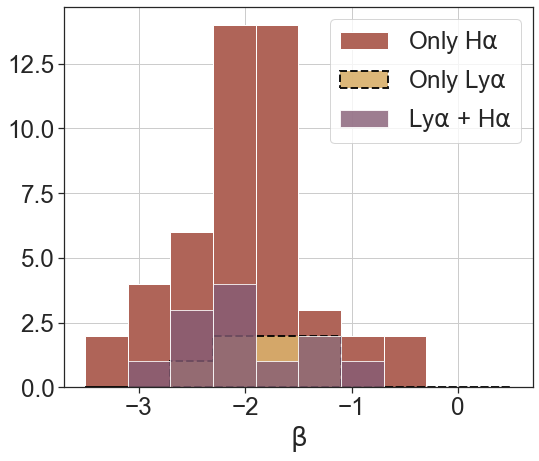

In [50]:
fig, axs = plt.subplots()

mask=(Type=="LAE") & (dfesc>-1) #LAE
maskL=(Type=="LAE") & (np.isnan(dfesc)==True) & (fesc>-1) #LAE lowlim
maskU=(Type=="NonDetect") & (fesc>-1) #uplim


axs.hist(slope[maskU],color=cmap(0.8),label=r"Only H$\mathrm{\alpha}$",range=[-3.5,0.5],alpha=1)
axs.hist(slope[maskL],color=cmap(0.5),label=r"Only Ly$\mathrm{\alpha}$",range=[-3.5,0.5],alpha=0.9,linestyle="--",lw=2,edgecolor="black",histtype='stepfilled')
axs.hist(slope[mask],color=cmap(0.1),label=r"Ly$\mathrm{\alpha}$ + H$\mathrm{\alpha}$",range=[-3.5,0.5],alpha=0.8)
#axs.set_yticks([2,4,6]) 
#axs.set_yticklabels([2,4,6])

axs.set_xlabel(r"$\mathrm{\beta}$")
axs.legend()
plt.grid()
plt.savefig("Figures/Slope.pdf",dpi=200)
plt.show()

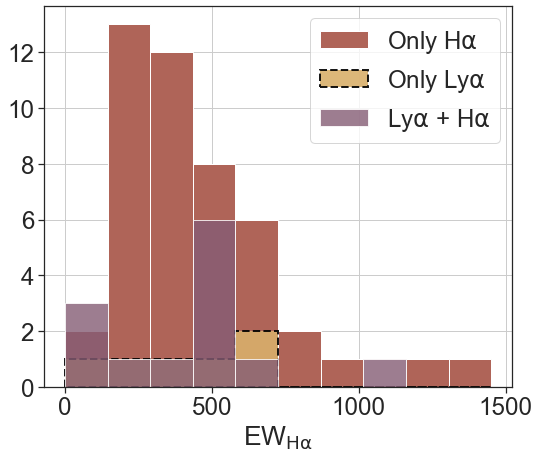

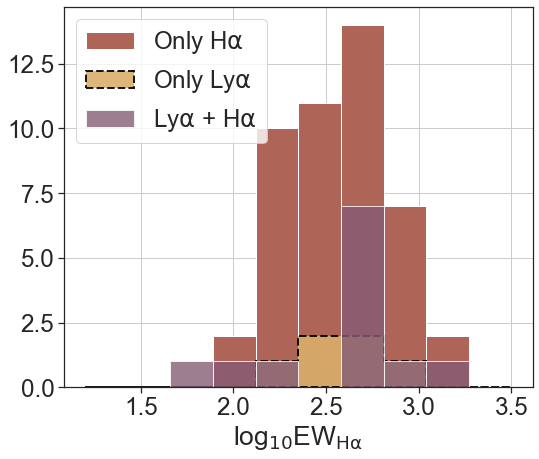

In [51]:
fig, axs = plt.subplots()

mask=(Type=="LAE") & (dfesc>-1) #LAE
maskL=(Type=="LAE") & (np.isnan(dfesc)==True) & (fesc>-1) #LAE lowlim
maskU=(Type=="NonDetect") & (fesc>-1) #uplim


axs.hist(EWHa[maskU],color=cmap(0.8),label=r"Only H$\mathrm{\alpha}$",alpha=1,range=[0,1450])
axs.hist(EWHa[maskL],color=cmap(0.5),label=r"Only Ly$\mathrm{\alpha}$",alpha=0.9,linestyle="--",range=[0,1450],lw=2,edgecolor="black",histtype='stepfilled')
axs.hist(EWHa[mask],color=cmap(0.1),label=r"Ly$\mathrm{\alpha}$ + H$\mathrm{\alpha}$",alpha=0.8,range=[0,1450])
#axs.set_yticks([2,4,6]) 
#axs.set_yticklabels([2,4,6])

axs.set_xlabel(r"EW$_\mathrm{H\alpha}$")
axs.legend()
plt.grid()
plt.savefig("Figures/EWHa.pdf",dpi=200)
plt.show()

fig, axs = plt.subplots()

mask=(Type=="LAE") & (dfesc>-1) #LAE
maskL=(Type=="LAE") & (np.isnan(dfesc)==True) & (fesc>-1) #LAE lowlim
maskU=(Type=="NonDetect") & (fesc>-1) #uplim


axs.hist(np.log10(EWHa[maskU]),color=cmap(0.8),label=r"Only H$\mathrm{\alpha}$",alpha=1,range=[1.2,3.5])
axs.hist(np.log10(EWHa[maskL]),color=cmap(0.5),label=r"Only Ly$\mathrm{\alpha}$",alpha=0.9,linestyle="--",range=[1.2,3.5],lw=2,edgecolor="black",histtype='stepfilled')
axs.hist(np.log10(EWHa[mask]),color=cmap(0.1),label=r"Ly$\mathrm{\alpha}$ + H$\mathrm{\alpha}$",alpha=0.8,range=[1.2,3.5])
#axs.set_yticks([2,4,6]) 
#axs.set_yticklabels([2,4,6])

axs.set_xlabel(r"log$_{\mathrm{10}}$EW$_\mathrm{H\alpha}$")
axs.legend()
plt.grid()
plt.savefig("Figures/EWHa.pdf",dpi=200)
plt.show()

In [ ]:

# Your existing code
plt.rcParams["figure.figsize"] = (8.7,7.)
sns.set_theme(style="ticks",font_scale=2.2)



fig, axs = plt.subplots()

mask=(Type=="LAE")

# Add ticks going in and out
axs.tick_params(axis='both', direction='inout', length=15, width=1, which='both', top=True, right=True)  # Set the length and width of the ticks

axs.hist(Muv[~mask], color="gray", label=r"No Ly$\mathrm{\alpha}$ Detected", alpha=1, bins=15, range=[-22.5, -18.3],edgecolor="black", linewidth=2)
axs.hist(Muv[mask], color=cmap(0.1), label=r"Ly$\mathrm{\alpha}$ Detected", alpha=1, bins=15, range=[-22.5, -18.3], edgecolor="black", linewidth=2)

axs.set_xlabel(r"M$_{\mathrm{UV}}$[1500$\mathrm{\AA}$]")
axs.legend(fontsize=20,frameon=False)
plt.tight_layout()
plt.savefig("Figures/Muv.pdf", dpi=200,bbox_inches="tight")
plt.show()

fig, axs = plt.subplots()

axs.tick_params(axis='both', direction='inout', length=15, width=1, which='both', top=True, right=True)  # Set the length and width of the ticks


axs.hist(slope[~mask], color="gray", label=r"No Ly$\mathrm{\alpha}$ Detected", alpha=1, bins=15, range=[-4.2, 0.3],edgecolor="black", linewidth=2)
axs.hist(slope[mask], color=cmap(0.1), label=r"Ly$\mathrm{\alpha}$ Detected", alpha=1, bins=15, range=[-4.2, 0.3], edgecolor="black", linewidth=2)

axs.set_xlabel(r"UV Slope [$\mathrm{\beta}$]")
axs.legend(fontsize=20,loc=2,frameon=False)
plt.tight_layout()
plt.savefig("Figures/Slope.pdf", dpi=200,bbox_inches="tight")
plt.show()

print(np.nanmedian(slope[mask]),np.nanmedian(slope[~mask]))








In [ ]:
from scipy.stats import ks_2samp


print(np.nanmedian(slope[mask]),np.nanmedian(slope[~mask]))

ks_stat, p_value = ks_2samp(slope[mask], slope[~mask])
print(f"KS Statistic: {ks_stat}, P-value: {p_value}")


In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
maskFESC = Catalog["fesc"] > 0
maskFESC2 = Catalog["dfesc"] > 0

maskFESC= np.logical_xor(maskFESC, maskFESC2)
# Your existing code
plt.rcParams["figure.figsize"] = (14, 10)
sns.set_theme(style="ticks", font_scale=2.2)

fig = plt.figure()
gs = fig.add_gridspec(4, 4, hspace=0.25, wspace=0.25)
axs = fig.add_subplot(gs[1:4, 0:3])  # Corrected line

# Top histogram
ax_histx = fig.add_subplot(gs[0, 0:3], sharex=axs)
ax_histx.tick_params(axis='x', labelbottom=False)

# Right histogram
ax_histy = fig.add_subplot(gs[1:4, 3], sharey=axs)
ax_histy.tick_params(axis='y', labelleft=False)

mask = (Type == "LAE")

# Main scatter plot
axs.tick_params(axis='both', direction='inout', length=15, width=1, which='both', top=True, right=True)
axs.scatter(Muv[~mask], slope[~mask], label=r"No Ly$\mathrm{\alpha}$ Detected", color="gray", s=70, alpha=0.7)
axs.errorbar(Muv[~mask], slope[~mask], xerr=dMuv[~mask], yerr=dslope[~mask], fmt=" ", alpha=0.3, color="gray")
axs.scatter(Muv[mask], slope[mask], label=r"Ly$\mathrm{\alpha}$ Detected", color=cmap(0.1), s=100, linewidths=2, edgecolor="black", zorder=100)
axs.errorbar(Muv[mask], slope[mask], xerr=dMuv[mask], yerr=dslope[mask], fmt=" ", alpha=0.5, color=cmap(0.1))

axs.legend(fontsize=20, loc=1)
axs.set_xlim(-22.5, -18.3)
axs.set_ylim(-4.5, 1)
axs.invert_xaxis()
axs.set_ylabel(r"UV Slope, $\mathrm{\beta}$")
axs.set_xlabel(r"M$_{\mathrm{UV}}$, 1500$\mathrm{\AA}$")


axs.axvline(x=-19.5, ls="--", color="black", lw=3,alpha=0.5,zorder=0)
axs.axvspan(-18.3, -19.5, color='gray', alpha=0.2, zorder=0)

#axs.scatter(Muv[maskFESC],slope[maskFESC],color="red", s=30,zorder=101,marker="o",alpha=0.4)  # Increase the size of the markers
#axs.scatter(Muv[maskFESC2],slope[maskFESC2],label=r"H$\mathrm{\alpha}$ Detected",color="red", s=50,zorder=101,marker="o",alpha=0.9)  # Increase the size of the markers



# Top histogram
ax_histx.hist(Muv[~mask], color="gray", alpha=1, bins=15, range=[-22.5, -18.3], edgecolor="black", linewidth=2)
ax_histx.hist(Muv[mask], color=cmap(0.1), alpha=1, bins=15, range=[-22.5, -18.3], edgecolor="black", linewidth=2)


# Right histogram
ax_histy.hist(slope[~mask], color="gray", alpha=1, bins=15, range=[-4.5, 1], edgecolor="black", linewidth=2, orientation='horizontal')
ax_histy.hist(slope[mask], color=cmap(0.1), alpha=1, bins=15, range=[-4.5, 1], edgecolor="black", linewidth=2, orientation='horizontal')


plt.tight_layout()
plt.savefig("Figures/Muv_Slope.pdf", dpi=200, bbox_inches="tight")
plt.show()







In [ ]:
plt.rcParams["figure.figsize"] = (17, 7)  # Set the figure size

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)  # Create subplots with shared Y axis

EWLim=np.load("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/measurements/FluxLim_EW_Muv.npy")


# Plot 1
ax2.tick_params(axis='both', direction='inout', length=15, width=1, which='both', top=True, right=True)  # Set the length and width of the ticks

ax2.scatter(slope[~mask], EWLya[~mask], label=r"No Ly$\mathrm{\alpha}$ Detected", color="gray", s=70, alpha=0.7, marker='v')  # Increase the size of the markers
ax2.errorbar(slope[~mask], EWlya[~mask], xerr=dslope[~mask], yerr=dEWlya[~mask], fmt=" ", alpha=0.3, color="gray")

ax2.scatter(slope[mask], EWlya[mask], label=r"Ly$\mathrm{\alpha}$ Detected", color=cmap(0.1), s=100, edgecolor="black", zorder=100)  # Increase the size of the markers
ax2.errorbar(slope[mask], EWlya[mask], xerr=dslope[mask], yerr=dEWlya[mask], fmt=" ", alpha=0.5, color=cmap(0.1))

ax2.set_xlim(-5, 1)
ax2.set_xlabel(r"UV Slope, $\mathrm{\beta}$")

# Plot 2

ax1.plot(EWLim[0],EWLim[1],label=r"5$\mathrm{\sigma}$ Flux Limit",color="black",lw=5,ls="--",alpha=0.5)
ax1.tick_params(axis='both', direction='inout', length=15, width=1, which='both', top=True, right=True)  # Set the length and width of the ticks

ax1.scatter(Muv[~mask], EWLya[~mask], label=r"No Ly$\mathrm{\alpha}$ Detected", color="gray", s=70, alpha=0.7, marker='v')  # Increase the size of the markers
ax1.errorbar(Muv[~mask], EWlya[~mask], xerr=dMuv[~mask], yerr=dEWlya[~mask], fmt=" ", alpha=0.3, color="gray")

ax1.scatter(Muv[mask], EWlya[mask], label=r"Ly$\mathrm{\alpha}$ Detected", color=cmap(0.1), s=100, edgecolor="black", zorder=100)  # Increase the size of the markers
ax1.errorbar(Muv[mask], EWlya[mask], xerr=dMuv[mask], yerr=dEWlya[mask], fmt=" ", alpha=0.5, color=cmap(0.1))

ax1.legend(fontsize=20)

ax1.set_xlim(-22.5, -18.3)
ax1.set_ylim(-10, 350)
ax1.invert_xaxis()  # Reverse the X-axis
ax1.set_ylabel(r"EW$_{\mathrm{Ly\alpha,rest}}$ [$\mathrm{\AA}$]")
ax1.set_xlabel(r"M$_{\mathrm{UV}}$[1500$\mathrm{\AA}$]")
plt.subplots_adjust(wspace=0.01)
plt.savefig("Figures/EW_combined.pdf", dpi=200,bbox_inches="tight")
plt.show()


In [ ]:
plt.rcParams["figure.figsize"] = (8,7.)
fig, axs = plt.subplots()

axs.tick_params(axis='both', direction='inout', length=15, width=1, which='both', top=True, right=True)  # Set the length and width of the ticks

axs.scatter(Muv[~mask],EWLya[~mask],label=r"No Ly$\mathrm{\alpha}$ Detected",color="gray", s=70,alpha=0.7, marker='v')  # Increase the size of the markers

axs.errorbar(Muv[~mask],EWlya[~mask],xerr=dMuv[~mask],yerr=dEWlya[~mask],fmt=" ",alpha=0.3,color="gray")

axs.scatter(Muv[mask],EWlya[mask],label=r"Ly$\mathrm{\alpha}$ Detected",color=cmap(0.1), s=100, edgecolor="black",zorder=100)  # Increase the size of the markers
axs.errorbar(Muv[mask],EWlya[mask],xerr=dMuv[mask],yerr=dEWlya[mask],fmt=" ",alpha=0.5,color=cmap(0.1))

axs.legend(fontsize=20)

axs.set_xlim(-23.5,-18.3)
axs.set_ylim(-10,500)

axs.invert_xaxis()  # Reverse the X-axis
axs.set_ylabel(r"EW$_{\mathrm{Ly\alpha,rest}}$ [$\mathrm{\AA}$]")
axs.set_xlabel(r"M$_{\mathrm{UV}}$[1500$\mathrm{\AA}$]")
plt.tight_layout()

plt.savefig("Figures/EW_Muv.pdf", dpi=200)
plt.show()




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from palettable.cmocean.sequential import Ice_5

plt.rcParams["figure.figsize"] = (10, 6)

def split_fwhm_bins(Muv, FWHM, galaxy_type, num_bins):
    Muv = Muv[galaxy_type=="LAE"]
    FWHM = FWHM[galaxy_type=="LAE"]
    
    percentiles = np.linspace(0, 100, num_bins + 1)

    bin_edges = np.percentile(Muv, percentiles)
    print(bin_edges)

    bin_edges[0] = bin_edges[0] - 1
    bin_edges[-1] = bin_edges[-1] + 1
    groups = np.digitize(Muv, bin_edges)
    array=[ [] for i in range(num_bins)]
    for i in range(len(Muv)):
        array[groups[i]-1].append(FWHM[i])
    return array

result = split_fwhm_bins(Muv, FWHMLya, Type, 2)

fig, axs = plt.subplots()
b = 7

cmap2 = ListedColormap(Ice_5.mpl_colors)
axs.tick_params(axis='both', direction='inout', length=15, width=2, which='both', top=True, right=True)  # Set the length and width of the ticks
axs.set_yticks([0, 5, 15, 30])
axs.hist(FWHMLya, bins=b, alpha=0.5, range=[0, 800], edgecolor="black", lw=2, color=cmap2(0.2))
#axs.hist(result[1], bins=b, alpha=0.7, label="Mid", range=[0, 1000], edgecolor="black", lw=2, color=cmap(0.3))
#axs.hist(result[1], bins=b, alpha=0.7, label=r"-20.0 < M$_{\mathrm{UV}}$ < -18.6", range=[0, 600], edgecolor="black", lw=2, color=cmap2(0.6))
axs.set_xlabel(r"FWHM$_{\mathrm{Ly\alpha}}$ [kms$^{\mathrm{-1}}$]",fontsize=28)





def Likelihood(FWHM, dFWHM, mu, sigma):
    """
    Lognormal Likelihood: Probability of having a certain value of FWHM given the lognormal parameters A and Wo

    Args:
        FWHM: Full Width at Half Maximum observed
        dFWHM: Posteiror distribution of FWHM
        A: Parameter lognormal (should depend on our other observables, such as uvslope and muv)
        Wo: Parameter lognormal (should depend on our other observables, such as uvslope and muv)
    """

    p = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(FWHM - mu)**2 / (2 * sigma**2))  # Normal distribution
    return p*18


fw=np.log10(np.linspace(0.1,800,100))
dfw=np.ones(len(fw))*0

median=0.32*-0.3*(-20.+20+0.26*5.6)+2.34
sigma=0.3 #in log
l=Likelihood(fw,dfw,median,sigma)
#normalization = np.trapz(l, 10**fw)
#l = l / normalization
plt.plot(10**fw,l*0.8, color="red", lw=5,alpha=0.4,ls="-.",label=r"Mason+19 model")





mu=2.39
sig=0.30

l=Likelihood(fw,dfw,mu,sig)*0.6
#normalization = np.trapz(l, 10**fw)
#l = l / normalization
plt.plot(10**fw,l, color="black", lw=5,alpha=0.6,ls="--",label="This Work")

posteriors=np.load("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/D-EWModel/FWHM model/Posteriors.npy")

mus=posteriors[0]
sigs=posteriors[1]
chosen_indices = np.random.choice(len(mus), 1000, replace=False)
mus = mus[chosen_indices]
sigs = sigs[chosen_indices]


percentiles_16 = []
percentiles_84 = []

for f in fw:
    likelihoods = Likelihood(f, 0, mus, sigs)*0.6
    percentiles_16.append(np.percentile(likelihoods, 16))
    percentiles_84.append(np.percentile(likelihoods, 84))

plt.fill_between(10**fw, percentiles_16, percentiles_84, color="gray", alpha=0.5)



#l_upper = Likelihood(fw, dfw, 2.072+0.04 , 0.34+0.04)
#norm_upper = np.trapz(l_upper, 10**fw)
#l_upper = l_upper / norm_upper
#l_lower = Likelihood(fw, dfw, 2.072-0.04 , 0.34-0.04)
#norm_lower = np.trapz(l_lower, 10**fw)
#l_lower = l_lower / norm_lower
# Calculate the upper and lower bounds for the second parameter with 0.06 error

# Plot the upper and lower bounds
#plt.plot(10**fw,l, color="black", lw=3,alpha=0.6,ls="--")
#plt.plot(10**fw, l_upper, linestyle='--', color=Antique_3.mpl_colors[1])
#plt.plot(10**fw, l_lower, linestyle='--', color=Antique_3.mpl_colors[1])

# Fill the area between the bounds
#plt.fill_between(10**fw, l_lower, l_upper, color=Antique_3.mpl_colors[1], alpha=0.5)





###






plt.xlim(0,800)
axs.legend(fontsize=25,frameon=False,loc=1)

plt.tight_layout()
plt.savefig("Figures/FWHM_dist.pdf", dpi=200, bbox_inches="tight")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from palettable.cmocean.sequential import Ice_5

plt.rcParams["figure.figsize"] = (10, 6)

def split_fwhm_bins(Muv, FWHM, galaxy_type, num_bins):
    Muv = Muv[galaxy_type=="LAE"]
    FWHM = FWHM[galaxy_type=="LAE"]
    
    percentiles = np.linspace(0, 100, num_bins + 1)

    bin_edges = np.percentile(Muv, percentiles)
    print(bin_edges)

    bin_edges[0] = bin_edges[0] - 1
    bin_edges[-1] = bin_edges[-1] + 1
    groups = np.digitize(Muv, bin_edges)
    array=[ [] for i in range(num_bins)]
    for i in range(len(Muv)):
        array[groups[i]-1].append(FWHM[i])
    return array

result = split_fwhm_bins(Muv, FWHMLya, Type, 2)

fig, axs = plt.subplots()
b = 7

cmap2 = ListedColormap(Ice_5.mpl_colors)
axs.tick_params(axis='both', direction='inout', length=15, width=2, which='both', top=True, right=True)  # Set the length and width of the ticks
axs.set_yticks([0, 5, 15, 30])
axs.hist(FWHMLya, bins=b, alpha=0.5, range=[0, 800], edgecolor="black", lw=2, color=cmap2(0.2))
#axs.hist(result[1], bins=b, alpha=0.7, label="Mid", range=[0, 1000], edgecolor="black", lw=2, color=cmap(0.3))
#axs.hist(result[1], bins=b, alpha=0.7, label=r"-20.0 < M$_{\mathrm{UV}}$ < -18.6", range=[0, 600], edgecolor="black", lw=2, color=cmap2(0.6))
axs.set_xlabel(r"FWHM$_{\mathrm{Ly\alpha}}$ [kms$^{\mathrm{-1}}$]",fontsize=28)
axs.set_xscale('log')  # Set x-axis to log scale





def Likelihood(FWHM, dFWHM, mu, sigma):
    """
    Lognormal Likelihood: Probability of having a certain value of FWHM given the lognormal parameters A and Wo

    Args:
        FWHM: Full Width at Half Maximum observed
        dFWHM: Posteiror distribution of FWHM
        A: Parameter lognormal (should depend on our other observables, such as uvslope and muv)
        Wo: Parameter lognormal (should depend on our other observables, such as uvslope and muv)
    """

    p = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(FWHM - mu)**2 / (2 * sigma**2))  # Normal distribution
    return p*18


fw=np.log10(np.linspace(0.1,800,100))
dfw=np.ones(len(fw))*0

median=0.32*-0.3*(-20.+20+0.26*5.6)+2.34
sigma=0.3 #in log
l=Likelihood(fw,dfw,median,sigma)
#normalization = np.trapz(l, 10**fw)
#l = l / normalization
plt.plot(10**fw,l*0.8, color="red", lw=5,alpha=0.4,ls="-.",label=r"Mason+19 model")





mu=2.39
sig=0.30

l=Likelihood(fw,dfw,mu,sig)*0.8
#normalization = np.trapz(l, 10**fw)
#l = l / normalization
plt.plot(10**fw,l, color="black", lw=5,alpha=0.6,ls="--",label="This Work")

posteriors=np.load("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/D-EWModel/FWHM model/Posteriors.npy")

mus=posteriors[0]
sigs=posteriors[1]
chosen_indices = np.random.choice(len(mus), 1000, replace=False)
mus = mus[chosen_indices]
sigs = sigs[chosen_indices]


percentiles_16 = []
percentiles_84 = []

for f in fw:
    likelihoods = Likelihood(f, 0, mus, sigs)*0.8
    percentiles_16.append(np.percentile(likelihoods, 16))
    percentiles_84.append(np.percentile(likelihoods, 84))

plt.fill_between(10**fw, percentiles_16, percentiles_84, color="gray", alpha=0.5)



#l_upper = Likelihood(fw, dfw, 2.072+0.04 , 0.34+0.04)
#norm_upper = np.trapz(l_upper, 10**fw)
#l_upper = l_upper / norm_upper
#l_lower = Likelihood(fw, dfw, 2.072-0.04 , 0.34-0.04)
#norm_lower = np.trapz(l_lower, 10**fw)
#l_lower = l_lower / norm_lower
# Calculate the upper and lower bounds for the second parameter with 0.06 error

# Plot the upper and lower bounds
#plt.plot(10**fw,l, color="black", lw=3,alpha=0.6,ls="--")
#plt.plot(10**fw, l_upper, linestyle='--', color=Antique_3.mpl_colors[1])
#plt.plot(10**fw, l_lower, linestyle='--', color=Antique_3.mpl_colors[1])

# Fill the area between the bounds
#plt.fill_between(10**fw, l_lower, l_upper, color=Antique_3.mpl_colors[1], alpha=0.5)





###






plt.xlim(0.1,800)
axs.legend(fontsize=25,frameon=False,loc=1)

plt.tight_layout()
plt.savefig("Figures/FWHM_dist2.pdf", dpi=200, bbox_inches="tight")

plt.show()

In [ ]:
plt.hist(FWHMLya,)

In [ ]:
median_redshift = np.median(Catalog[Catalog["LyaFWHM"] > 0]["photoz"])
print("Median Redshift:", median_redshift)

In [ ]:
median=0.32*-0.3*(-20.+20+0.26*5.5)+2.34
print(median)

In [ ]:
-20.0-0.26*5.56

In [ ]:
10**2.47

In [ ]:
np.e**0.3

In [ ]:
np.log(2.072)

In [ ]:
Catalog[Catalog["id_charlotte"]=="z5_GNW_7098"]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from palettable import cmocean
sns.set_theme(style="ticks",font_scale=2.5)
plt.rcParams["figure.figsize"] = (12, 8)

def EWmodel(Muv, Beta):
    Wo=9.9* (Muv + 20) + 0 * (Beta + 2) + 24.6
    print(Wo)
    return Wo

# Define the range of X and Y values
X = np.arange(-22.5, -18.5, 0.01)
Y = np.arange(-3.5, 0.1, 0.01)

# Create a meshgrid of X and Y values
X_grid, Y_grid = np.meshgrid(X, Y)

# Calculate the corresponding values for each combination of X and Y using EWmodel
Z = EWmodel(X_grid, Y_grid)

# Create a figure with two subplots
fig, axs = plt.subplots()

# Plot the resulting 2D grid on the first subplot
im = axs.imshow(Z, cmap=cmocean.sequential.Matter_3_r.mpl_colormap, origin='lower', extent=[X.min(), X.max(), Y.min(), Y.max()])
cbar = fig.colorbar(im, ax=axs, label=r'W$_\mathrm{0}$', shrink=1)
cbar.ax.tick_params(labelsize=25)
cbar.set_label(r'Exponential Paramter, W$_\mathrm{0}$', fontsize=30)

# Add labels and title to the subplot
axs.set_xlabel(r'M$_\mathrm{UV}$')
axs.set_ylabel(r'UV Slope, $\beta$')
axs.tick_params(axis='both', direction='inout', length=15, width=1.5, which='both', top=True, right=True)  # Set the length and width of the ticks
axs.set_yticks([0, -1, -2, -3])

# Plot contour lines for points with the same Z value
#contour1 = axs.contour(X_grid, Y_grid, Z, levels=[37.3], colors='black', alpha=0.9, linestyles='dashed', linewidths=4)
#contour2 = axs.contour(X_grid, Y_grid, Z, levels=[16.], colors='white', alpha=0.9, linestyles='dashed', linewidths=4)

# Add text next to each contour line
"""
c=[r"W$_{\mathrm{0}}$ = 15"]
i=0
for line in contour2.collections:
    for path in line.get_paths():
        x, y = path.vertices.mean(axis=0)
        axs.text(x+0.65, y+1, c[i], fontsize=25, color='white', ha='center', va='center')
    i=i+1

c=[r"W$_{\mathrm{0}}$ = 35"]
i=0
for line in contour1.collections:
    for path in line.get_paths():
        x, y = path.vertices.mean(axis=0)
        axs.text(x+0.65, y+1, c[i], fontsize=25, color='black', ha='center', va='center')
    i=i+1
"""

# Show the plot
plt.tight_layout()
plt.savefig("Figures/EW_gradient.pdf", dpi=200, bbox_inches="tight")
plt.show()

In [ ]:
def EWmodel(Muv, Beta):
    Wo=9.8* (Muv + 20) + 0 * (Beta + 2) + 24.6
    print(Wo)
    return Wo

EWmodel(-22.,-2)

In [ ]:
from palettable.cartocolors.qualitative import Antique_3
from matplotlib.colors import ListedColormap
import scipy

cmap=cmocean.sequential.Matter_3_r.mpl_colormap
ew=np.linspace(-50.,300,1001)    
dew=np.full(len(ew),4.5)

sns.set_theme(style="ticks",font_scale=2)
plt.rcParams["figure.figsize"] = (8.,7.)
fig, axs = plt.subplots()


#case 1 : 0.8223607581311265 78.15738387540841 -18.98032701557395 -2.011705594132862
#case 2 : 0.5383150341598313 59.22100227732207 -21.34737471533474 -1.4991559907087004
#case 3 :0.7191801139804364 71.27867426536241 -19.8401657168297 -1.6622065535941433

#A=np.nanmedian(mockA)
#W=np.nanmedian(mockW)

def modeloX(Wo,ew,dEW):
    dEW_2 = dEW**2.
    p1 = 0
    X  = (dEW_2/Wo - ew) / np.sqrt(2.) / dEW
    p2 = 0.5 * 1 / Wo * np.exp(0.5*(dEW_2 - 2*ew*Wo)/Wo**2.)*scipy.special.erfc(X)
    p = p1 + p2
    return p

axs.axvspan(-10, 0, alpha=0.3, color='black',hatch="x",zorder=1000000)

mval,bval=-18.5,-3
y=modeloX(EWmodel(mval,bval),ew,dew)
axs.plot(ew,y,lw=4,color=cmap(0.9),label=r"M$_\mathrm{UV}$ = "+str(mval)+r", $\mathrm{\beta}$ = "+str(bval))


mval,bval=-20,-2
y=modeloX(EWmodel(mval,bval),ew,dew)
axs.plot(ew,y,lw=4,color=cmap(0.7),label=r"M$_\mathrm{UV}$ = "+str(mval)+r"   , $\mathrm{\beta}$ = "+str(bval))


mval,bval=-21.5,-1.5
y=modeloX(EWmodel(mval,bval),ew,dew)
axs.plot(ew,y,lw=4,color=cmap(0.4),label=r"M$_\mathrm{UV}$ = "+str(mval)+r", $\mathrm{\beta}$ = "+str(bval))

mval,bval=-22.5,-0.5
y=modeloX(EWmodel(mval,bval),ew,dew)
axs.plot(ew,y,lw=4,color=cmap(0.1),label=r"M$_\mathrm{UV}$ = "+str(mval)+r", $\mathrm{\beta}$ = "+str(bval))

axs.axvline(x=0,ls="--",color="gray",alpha=0.3)
#plt.ylim(0,0.5)

#axs.set_ylim(-0.00,0.07)
axs.set_xscale("log")
axs.set_xlim(1,300)
axs.set_ylabel(r"P(EW$_\mathrm{Ly\alpha}$|M$_\mathrm{UV},\mathrm{\beta}$)")
axs.set_xlabel(r"EW$_\mathrm{Ly\alpha,obs}$")
axs.tick_params(axis='both', direction='inout', length=15, width=0.5, which='both', top=True, right=True)  # Set the length and width of the ticks

plt.grid()
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig("Figures/PEW_real_1.pdf",dpi=200,bbox_inches="tight")
plt.show()

In [ ]:
from palettable.cartocolors.qualitative import Antique_3
from matplotlib.colors import ListedColormap
import scipy
import numpy as np
from scipy.integrate import trapz

cmap=cmocean.sequential.Matter_3_r.mpl_colormap
ew=np.linspace(-50.,300,1001)    
dew=np.full(len(ew),0.0001)

sns.set_theme(style="ticks",font_scale=2)
plt.rcParams["figure.figsize"] = (8.,7.)
fig, axs = plt.subplots()

def EWmodel(Muv, Beta):
    Wo=11.2* (Muv + 20) + 0 * (Beta + 2) + 27.2
    print(Wo)
    return Wo


Wuv = np.random.normal(11.2, 2, 1000)
Wslp = np.random.normal(0, 0.1, 1000)
Wc = np.random.normal(27.2, 3.2, 1000)

def EWmodel_Var(Wuv,Ws,Wc,Muv, Beta):
    return Wuv * (Muv + 20) + Ws * (Beta + 2) + Wc

##Oyarzun

def Oyarzun(Muv,Beta):
    A=0.08*Muv-0.6*Beta+1.1
    Wo=11*Muv-7.8*Beta+235
    print(A,Wo)
    print("     ")
    return A,Wo

def modeloX(Wo,ew,dEW):
    dEW_2 = dEW**2.
    p1 = 0
    X  = (dEW_2/Wo - ew) / np.sqrt(2.) / dEW
    p2 = 0.5 * 1 / Wo * np.exp(0.5*(dEW_2 - 2*ew*Wo)/Wo**2.)*scipy.special.erfc(X)
    p = p1 + p2
    return p

axs.axvspan(-20, 0, alpha=0.3, color='black',hatch="x",zorder=1000000)

def PlotEW(mval,bval,color,caso=None):
    ew=np.linspace(-50.,300,1001)    
    y=modeloX(EWmodel(mval,bval),ew,dew)
    
    # Assuming ew and y are numpy arrays
    ew = np.array(ew)
    y = np.array(y)

    # Select the values between 50 and 500

    y=y/max(y)
    axs.plot(ew,y,lw=4,color=cmap(color),label=r"M$_\mathrm{UV}$ = "+str(mval))
    #if Oyarzun(mval,bval)[1]>0:
    #    axs.plot(ew,yOyarzun,lw=4,color=cmap(color),ls="--")

    originaly=y


    integrals=[]
    ys=[]
    for wuv, wslp, wc in zip(Wuv, Wslp, Wc):
        if caso=="Limit":
            if EWmodel_Var(wuv,wslp,wc,mval,bval)<=1:
                continue

        w=EWmodel_Var(wuv,wslp,wc,mval,bval)
        if w<0:
            continue

        y=modeloX(EWmodel_Var(wuv,wslp,wc,mval,bval),ew,dew)
        mask = (ew >= 100) & (ew <= 500)
        ew_selected = ew[mask]
        y_selected = y[mask]

        # Integrate using the trapezoidal rule
        integral = trapz(y_selected, ew_selected)
        integrals.append(integral)


        y=y/max(y)
        ys.append(y)

    # Find the highest and lowest values in ys
    std = np.std(ys, axis=0)
    minusSTD=originaly-np.abs(std)
    minusSTD[minusSTD<0]=0
    masSTD=originaly+np.abs(std)
    masSTD[masSTD>1]=1
    axs.fill_between(ew, minusSTD, masSTD, color=cmap(color), alpha=0.2)
    return integrals


def PlotEW2(mval,bval,color,caso=None):
    ew=np.linspace(-50.,300,1001)    
    y=modeloX(EWmodel(mval,bval),ew,dew)

    ew = np.array(ew)
    y = np.array(y)


    y=y/max(y)
    axs.plot(ew,y,lw=4,color=cmap(color),label=r"M$_\mathrm{UV}$ = "+str(mval))
    #if Oyarzun(mval,bval)[1]>0:
    #    axs.plot(ew,yOyarzun,lw=4,color=cmap(color),ls="--")

    originaly=y




    integrals=[]
    ys=[]
    for wuv, wslp, wc in zip(Wuv, Wslp, Wc):
        if caso=="Limit":
            if EWmodel_Var(wuv,wslp,wc,mval,bval)<=1:
                continue

        w=EWmodel_Var(wuv,wslp,wc,mval,bval)
        if w<0:
            continue

        y=modeloX(EWmodel_Var(wuv,wslp,wc,mval,bval),ew,dew)
        mask = (ew >= 100) & (ew <= 500)
        ew_selected = ew[mask]
        y_selected = y[mask]

        # Integrate using the trapezoidal rule
        integral = trapz(y_selected, ew_selected)
        integrals.append(integral)


        y=y/max(y)
        ys.append(y)

    # Find the highest and lowest values in ys
    std = np.nanstd(ys, axis=0)
    minusSTD = originaly - np.abs(std)
    minusSTD[minusSTD < 0] = 0
    masSTD = originaly + np.abs(std)
    masSTD[masSTD > 1] = 1
    axs.fill_between(ew, minusSTD, masSTD, color=cmap(color), alpha=0.2)
    return integrals

#data_points = 100
#start = -20.25
#end = -21.75
#Marray = np.linspace(start, end, data_points)
#integrals=[]
#for mval in Marray:
#    integrals.append(PlotEW(mval, -2, 0.1,caso="Limit"))



mval,bval=-19.5,-3
color=0.7
integrals1=PlotEW(mval,bval,color)

mval,bval=-20.5,-2
color=0.4
integrals2=PlotEW(mval,bval,color)

mval,bval=-21.5,-1.5
color=0.1
integrals3=PlotEW2(mval,bval,color)


#lowest_values = np.min(ys, axis=0)
#axs.fill_between(ew, lowest_values, highest_values, color=cmap(0.1), alpha=0.2)
#####
axs.axvline(x=0,ls="--",color="gray",alpha=0.3)
#plt.ylim(0,0.5)

#axs.set_ylim(-0.00,0.07)
axs.set_xlim(0,125)
axs.set_ylabel(r"P(EW$_\mathrm{Ly\alpha}$|M$_\mathrm{UV},\mathrm{\beta}$), normalized")
axs.set_xlabel(r"EW$_\mathrm{Ly\alpha}$")
axs.tick_params(axis='both', direction='inout', length=15, width=1.5, which='both', top=True, right=True)  # Set the length and width of the ticks

#axs.plot([0,0],[0,0],ls="--",label="Oyarzun+17",color="gray",lw=3)


plt.grid()
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("Figures/PEW_real_2.pdf",dpi=200,bbox_inches="tight")
plt.show()

In [ ]:
def getFrac(integral):
    print(np.nanmedian(integral),np.nanstd(integral))

getFrac(integrals1)
getFrac(integrals2)
getFrac(integrals3)


In [ ]:
from palettable.cartocolors.qualitative import Antique_3
from matplotlib.colors import ListedColormap
import scipy
import numpy as np
from scipy.integrate import trapz

cmap=cmocean.sequential.Matter_3_r.mpl_colormap
ew=np.linspace(-50.,300,1001)    
dew=np.full(len(ew),4.5)

sns.set_theme(style="ticks",font_scale=2)
plt.rcParams["figure.figsize"] = (8.,7.)
fig, axs = plt.subplots()


Wuv = np.random.normal(10.7, 1.2, 1000)
Wslp = np.random.normal(-1.5, 1.8, 1000)
Wc = np.random.normal(36.8, 2.9, 1000)

def EWmodel_Var(Wuv,Ws,Wc,Muv, Beta):
    return Wuv * (Muv + 20) + Ws * (Beta + 2) + Wc

##Oyarzun

def Oyarzun(Muv,Beta):
    A=0.08*Muv-0.6*Beta+1.1
    Wo=11*Muv-7.8*Beta+235
    print(A,Wo)
    print("     ")
    return A,Wo

def modeloX(Wo,ew,dEW):
    dEW_2 = dEW**2.
    p1 = 0
    X  = (dEW_2/Wo - ew) / np.sqrt(2.) / dEW
    p2 = 0.5 * 1 / Wo * np.exp(0.5*(dEW_2 - 2*ew*Wo)/Wo**2.)*scipy.special.erfc(X)
    p = p1 + p2
    return p

axs.axvspan(-20, 0, alpha=0.3, color='black',hatch="x",zorder=1000000)

def PlotEW(mval,bval,color,caso=None):
    ew=np.linspace(-50.,300,1001)    
    y=modeloX(EWmodel(mval,bval),ew,dew)
    
  
    # Assuming ew and y are numpy arrays
    ew = np.array(ew)
    y = np.array(y)

    # Select the values between 50 and 500
    mask = (ew >= 55) & (ew <= 500)
    ew_selected = ew[mask]
    y_selected = y[mask]

    # Integrate using the trapezoidal rule
    integral = trapz(y_selected, ew_selected)
    return integral,np.nanstd(integrals)


data_points = 1000
start = -20.25
end = -18.75
Marray = np.linspace(start, end, data_points)
integrals=[]
for mval in Marray:
    integrals.append(PlotEW(mval, -2, 0.1,caso="Limit"))


In [ ]:
plt.hist([i[0] for i in integrals])

In [ ]:
np.nanmean(integrals,axis=0)

In [ ]:
print(np.mean(np.array(integrals).T[0]))
print(np.nanmean(np.array(integrals).T[1]))


In [ ]:
(0+2)*-1.4

In [ ]:
1.4+2.8

In [ ]:
plt.hist(np.array(integrals).T[0])
plt.show()

plt.hist(np.array(integrals).T[1],range=[0.015,0.08])
plt.show()

plt.scatter(np.array(integrals).T[0],np.array(integrals).T[1])

In [ ]:
from palettable.cartocolors.qualitative import Antique_3
from matplotlib.colors import ListedColormap
import scipy

cmap=cmocean.sequential.Matter_3_r.mpl_colormap
ew=np.linspace(-50.,300,1001)    
dew=np.full(len(ew),0.5)

sns.set_theme(style="ticks",font_scale=2)
plt.rcParams["figure.figsize"] = (8.,7.)
fig, axs = plt.subplots()


Wuv = np.random.normal(11.2, 1.2, 10000)
Wslp = np.random.normal(0, 1.8, 10000)
Wc = np.random.normal(1, 2.9, 10000)

def EWmodel_example(Muv, Beta):
    return 11.2 * (Muv + 20) - 2 * (Beta + 2) + 27.2

def EWmodel_Var(Wuv,Ws,Wc,Muv, Beta):
    return Wuv * (Muv + 20) + Ws * (Beta + 2) + Wc

def modeloX(Wo,ew,dEW):
    dEW_2 = dEW**2.
    p1 = 0
    X  = (dEW_2/Wo - ew) / np.sqrt(2.) / dEW
    p2 = 0.5 * 1 / Wo * np.exp(0.5*(dEW_2 - 2*ew*Wo)/Wo**2.)*scipy.special.erfc(X)
    p = p1 + p2
    return p

axs.axvspan(-20, 0, alpha=0.3, color='black',hatch="x",zorder=1000000)

def PlotEW_example(mval,bval,color,caso=None,label=None):
    y=modeloX(EWmodel_example(mval,bval),ew,dew)
    y=y/max(y)
    axs.plot(ew,y,lw=4,color=cmap(color),label=label)


mval,bval=-17,-4
color=0.9
PlotEW_example(mval,bval,color)

mval,bval=-19,-2
color=0.7
PlotEW_example(mval,bval,color)

mval,bval=-21.5,-1.5
color=0.4
PlotEW_example(mval,bval,color)

mval,bval=-22.5,-0.5
color=0.1
PlotEW_example(mval,bval,color,caso="Limit")

#lowest_values = np.min(ys, axis=0)
#axs.fill_between(ew, lowest_values, highest_values, color=cmap(0.1), alpha=0.2)
#####
axs.axvline(x=0,ls="--",color="gray",alpha=0.3)
#plt.ylim(0,0.5)

#axs.set_ylim(-0.00,0.07)
axs.set_xlim(-20,250)
axs.set_ylabel(r"P(EW$_\mathrm{Ly\alpha}$|M$_\mathrm{UV},\mathrm{\beta}$), normalized")
axs.set_xlabel(r"EW$_\mathrm{Ly\alpha,obs}$")
axs.tick_params(axis='both', direction='inout', length=15, width=1.5, which='both', top=True, right=True)  # Set the length and width of the ticks

plt.grid()
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("Figures/PEW_real_example.pdf",dpi=200,bbox_inches="tight")
plt.show()

In [ ]:
from palettable.cartocolors.qualitative import Antique_3
from matplotlib.colors import ListedColormap
import scipy

cmap=cmocean.sequential.Matter_3_r.mpl_colormap
ew=np.linspace(-50.,300,1001)    
dew=np.full(len(ew),4.5)

sns.set_theme(style="ticks",font_scale=2)
plt.rcParams["figure.figsize"] = (8.,7.)
fig, axs = plt.subplots()


#case 1 : 0.8223607581311265 78.15738387540841 -18.98032701557395 -2.011705594132862
#case 2 : 0.5383150341598313 59.22100227732207 -21.34737471533474 -1.4991559907087004
#case 3 :0.7191801139804364 71.27867426536241 -19.8401657168297 -1.6622065535941433

#A=np.nanmedian(mockA)
#W=np.nanmedian(mockW)

def modeloX(Wo,ew,dEW):
    dEW_2 = dEW**2.
    p1 = 0
    X  = (dEW_2/Wo - ew) / np.sqrt(2.) / dEW
    p2 = 0.5 * 1 / Wo * np.exp(0.5*(dEW_2 - 2*ew*Wo)/Wo**2.)*scipy.special.erfc(X)
    p = p1 + p2
    return p

axs.axvspan(-20, 0, alpha=0.3, color='black',hatch="x",zorder=1000000)

mval,bval=-18.5,-3
y=modeloX(EWmodel(mval,bval),ew,dew)
axs.plot(ew,y,lw=4,color=cmap(0.9),label=r"M$_\mathrm{UV}$ = "+str(mval)+r", $\mathrm{\beta}$ = "+str(bval))


mval,bval=-20,-2
y=modeloX(EWmodel(mval,bval),ew,dew)
axs.plot(ew,y,lw=4,color=cmap(0.7),label=r"M$_\mathrm{UV}$ = "+str(mval)+r"   , $\mathrm{\beta}$ = "+str(bval))


mval,bval=-21.5,-1.5
y=modeloX(EWmodel(mval,bval),ew,dew)
axs.plot(ew,y,lw=4,color=cmap(0.4),label=r"M$_\mathrm{UV}$ = "+str(mval)+r", $\mathrm{\beta}$ = "+str(bval))

mval,bval=-22.5,-0.5
y=modeloX(EWmodel(mval,bval),ew,dew)
axs.plot(ew,y,lw=4,color=cmap(0.1),label=r"M$_\mathrm{UV}$ = "+str(mval)+r", $\mathrm{\beta}$ = "+str(bval))

axs.axvline(x=0,ls="--",color="gray",alpha=0.3)
#plt.ylim(0,0.5)

#axs.set_ylim(-0.00,0.07)
axs.set_xlim(-20,200)
axs.set_ylabel(r"P(EW$_\mathrm{Ly\alpha}$|M$_\mathrm{UV},\mathrm{\beta}$)")
axs.set_xlabel(r"EW$_\mathrm{Ly\alpha,obs}$")
axs.tick_params(axis='both', direction='inout', length=15, width=1.5, which='both', top=True, right=True)  # Set the length and width of the ticks

plt.grid()
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("Figures/PEW_real_3.pdf",dpi=200,bbox_inches="tight")
plt.show()

In [ ]:
cmap=cmocean.sequential.Matter_3_r.mpl_colormap
ew=np.linspace(-50.,300,1001)    
dew=np.full(len(ew),4.5)

sns.set_theme(style="ticks",font_scale=2)
plt.rcParams["figure.figsize"] = (8.,7.)
fig, axs = plt.subplots()


#case 1 : 0.8223607581311265 78.15738387540841 -18.98032701557395 -2.011705594132862
#case 2 : 0.5383150341598313 59.22100227732207 -21.34737471533474 -1.4991559907087004
#case 3 :0.7191801139804364 71.27867426536241 -19.8401657168297 -1.6622065535941433

#A=np.nanmedian(mockA)
#W=np.nanmedian(mockW)

def modeloX(Wo,ew):
    return ((1/Wo)*np.exp(-ew/Wo)*np.heaviside(ew,0.0))

axs.axvspan(-10, 0, alpha=0.3, color='black',hatch="x",zorder=1000000)

mval,bval=-18.5,-3
y=modeloX(EWmodel(mval,bval),ew)
axs.plot(ew,y,lw=4,color=cmap(0.9),label=r"M$_\mathrm{UV}$ = "+str(mval)+r", $\mathrm{\beta}$ = "+str(bval))


mval,bval=-20,-2
y=modeloX(EWmodel(mval,bval),ew)
axs.plot(ew,y,lw=4,color=cmap(0.7),label=r"M$_\mathrm{UV}$ = "+str(mval)+r"   , $\mathrm{\beta}$ = "+str(bval))


mval,bval=-21.5,-1.5
y=modeloX(EWmodel(mval,bval),ew)
axs.plot(ew,y,lw=4,color=cmap(0.4),label=r"M$_\mathrm{UV}$ = "+str(mval)+r", $\mathrm{\beta}$ = "+str(bval))

mval,bval=-22.5,-0.5
y=modeloX(EWmodel(mval,bval),ew)
axs.plot(ew,y,lw=4,color=cmap(0.1),label=r"M$_\mathrm{UV}$ = "+str(mval)+r", $\mathrm{\beta}$ = "+str(bval))

axs.axvline(x=0,ls="--",color="gray",alpha=0.3)
#plt.ylim(0,0.5)

#axs.set_ylim(-0.00,0.07)
axs.set_xscale("log")
axs.set_xlim(1,300)
axs.set_ylabel(r"P(EW$_\mathrm{Ly\alpha}$|M$_\mathrm{UV},\mathrm{\beta}$)")
axs.set_xlabel(r"EW$_\mathrm{Ly\alpha,intr}$")
axs.tick_params(axis='both', direction='inout', length=15, width=0.5, which='both', top=True, right=True)  # Set the length and width of the ticks

plt.grid()
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("Figures/PEW_intrinsic_1.pdf",dpi=200,bbox_inches="tight")
plt.show()

In [ ]:

sns.set_theme(style="ticks",font_scale=2)
plt.rcParams["figure.figsize"] = (8.,7.)
fig, axs = plt.subplots()


#case 1 : 0.8223607581311265 78.15738387540841 -18.98032701557395 -2.011705594132862
#case 2 : 0.5383150341598313 59.22100227732207 -21.34737471533474 -1.4991559907087004
#case 3 :0.7191801139804364 71.27867426536241 -19.8401657168297 -1.6622065535941433

#A=np.nanmedian(mockA)
#W=np.nanmedian(mockW)

def modeloX(Wo,ew):
    return ((1/Wo)*np.exp(-ew/Wo)*np.heaviside(ew,0.0))

axs.axvspan(-20, 0, alpha=0.3, color='black',hatch="x",zorder=1000000)

mval,bval=-18.5,-3
y=modeloX(EWmodel(mval,bval),ew)
y=y/max(y)
axs.plot(ew,y,lw=4,color=cmap(0.9),label=r"M$_\mathrm{UV}$ = "+str(mval)+r", $\mathrm{\beta}$ = "+str(bval))


mval,bval=-20,-2
y=modeloX(EWmodel(mval,bval),ew)
y=y/max(y)
axs.plot(ew,y,lw=4,color=cmap(0.7),label=r"M$_\mathrm{UV}$ = "+str(mval)+r"   , $\mathrm{\beta}$ = "+str(bval))


mval,bval=-21.5,-1.5
y=modeloX(EWmodel(mval,bval),ew)
y=y/max(y)
axs.plot(ew,y,lw=4,color=cmap(0.4),label=r"M$_\mathrm{UV}$ = "+str(mval)+r", $\mathrm{\beta}$ = "+str(bval))

mval,bval=-22.5,-0.5
y=modeloX(EWmodel(mval,bval),ew)
y=y/max(y)
axs.plot(ew,y,lw=4,color=cmap(0.1),label=r"M$_\mathrm{UV}$ = "+str(mval)+r", $\mathrm{\beta}$ = "+str(bval))

axs.axvline(x=0,ls="--",color="gray",alpha=0.3)
#plt.ylim(0,0.5)

axs.set_xlim(-20,200)
axs.set_ylabel(r"P(EW$_\mathrm{Ly\alpha}$|M$_\mathrm{UV},\mathrm{\beta}$)")
axs.set_xlabel(r"EW$_\mathrm{Ly\alpha,intr}$")
axs.tick_params(axis='both', direction='inout', length=15, width=1.5, which='both', top=True, right=True)  # Set the length and width of the ticks

plt.grid()
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("Figures/PEW_intrinsic_3.pdf",dpi=200,bbox_inches="tight")
plt.show()

In [ ]:
np.median(integrals,axis=0)

In [ ]:

sns.set_theme(style="ticks",font_scale=2)
plt.rcParams["figure.figsize"] = (8.,7.)
fig, axs = plt.subplots()


#case 1 : 0.8223607581311265 78.15738387540841 -18.98032701557395 -2.011705594132862
#case 2 : 0.5383150341598313 59.22100227732207 -21.34737471533474 -1.4991559907087004
#case 3 :0.7191801139804364 71.27867426536241 -19.8401657168297 -1.6622065535941433

#A=np.nanmedian(mockA)
#W=np.nanmedian(mockW)

def modeloX(Wo,ew):
    return ((1/Wo)*np.exp(-ew/Wo)*np.heaviside(ew,0.0))

axs.axvspan(-20, 0, alpha=0.3, color='black',hatch="x",zorder=1000000)

mval,bval=-18.5,-3
y=modeloX(EWmodel(mval,bval),ew)
axs.plot(ew,y,lw=4,color=cmap(0.9),label=r"M$_\mathrm{UV}$ = "+str(mval)+r", $\mathrm{\beta}$ = "+str(bval))


mval,bval=-20,-2
y=modeloX(EWmodel(mval,bval),ew)
axs.plot(ew,y,lw=4,color=cmap(0.7),label=r"M$_\mathrm{UV}$ = "+str(mval)+r"   , $\mathrm{\beta}$ = "+str(bval))


mval,bval=-21.5,-1.5
y=modeloX(EWmodel(mval,bval),ew)
axs.plot(ew,y,lw=4,color=cmap(0.4),label=r"M$_\mathrm{UV}$ = "+str(mval)+r", $\mathrm{\beta}$ = "+str(bval))

mval,bval=-22.5,-0.5
y=modeloX(EWmodel(mval,bval),ew)
axs.plot(ew,y,lw=4,color=cmap(0.1),label=r"M$_\mathrm{UV}$ = "+str(mval)+r", $\mathrm{\beta}$ = "+str(bval))

axs.axvline(x=0,ls="--",color="gray",alpha=0.3)
#plt.ylim(0,0.5)

axs.set_xlim(-20,200)
axs.set_ylabel(r"P(EW$_\mathrm{Ly\alpha}$|M$_\mathrm{UV},\mathrm{\beta}$), normalized")
axs.set_xlabel(r"EW$_\mathrm{Ly\alpha,intr}$")
axs.tick_params(axis='both', direction='inout', length=15, width=1.5, which='both', top=True, right=True)  # Set the length and width of the ticks

plt.grid()
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("Figures/PEW_intrinsic_2.pdf",dpi=200,bbox_inches="tight")
plt.show()

In [ ]:
import numpy as np


sns.set_theme(style="ticks",font_scale=2)
plt.rcParams["figure.figsize"] = (8.,7.)
fig, axs = plt.subplots()

fesc=np.linspace(0.001,0.999,1001)    
dfesc=np.full(len(fesc),0.0001)

def modeloX(Wo,ew,dEW):
    dEW_2 = dEW**2.
    p1 = 0
    X  = (dEW_2/Wo - ew) / np.sqrt(2.) / dEW
    p2 = 0.5 * 1 / Wo * np.exp(0.5*(dEW_2 - 2*ew*Wo)/Wo**2.)*scipy.special.erfc(X)
    p = p1 + p2
    return p



def modeloX2(A,Wo,ew,dEW):
    B=1/(1-np.exp(-1/Wo))
    dEW_2 = dEW**2.
    p1 = (1. - A) * np.exp(-0.5 * ew**2./dEW_2) / np.sqrt(2.*np.pi) / dEW
    X  = (dEW_2/Wo - ew) / np.sqrt(2.) / dEW
    p2 = 0.5 *  ( A * B )/ Wo * np.exp(0.5*(dEW_2 - 2*ew*Wo)/Wo**2.)* ( scipy.special.erf(X+(1/(np.sqrt(2)*dEW))) -scipy.special.erf(X)  )
    p = p1 + p2
    return p


axs.axvspan(-1, 0, alpha=0.3, color='black',hatch="x",zorder=1000000)

cmap1=cmocean.sequential.Haline_14_r.mpl_colormap
cmap2=cmocean.diverging.Balance_20.mpl_colormap

def PlotFESC(wo,dwo,color,label=None,caso=None):
    y=modeloX(wo,fesc,dfesc)
    y=y/max(y)
    axs.plot(fesc,y,lw=4,color=color,label=label)
    original_y=y
    samples_wo = np.random.normal(wo, dwo, 10000)
    ys=[]
    for w in samples_wo:
        if w<=0.01:
            continue
        y=modeloX(w,fesc,dfesc)
        y=y/max(y)
        #axs.plot(fesc,y,lw=4,color=cmap1(0.3),alpha=0.3)
        ys.append(y)

    # Find the highest and lowest values in ys
    std = np.std(ys, axis=0)
    minusSTD=original_y-std
    masSTD=original_y+std

    axs.fill_between(fesc, minusSTD, masSTD, color=color, alpha=0.2)
    
def PlotFESC2(A,dA,wo,dwo,color,label=None,caso=None,ls="-"):
    y=modeloX2(A,wo,fesc,dfesc)
    y=y/max(y)
    axs.plot(fesc,y,lw=4,color=color,label=label,zorder=99,ls=ls)
    original_y=y
    samples_wo = np.random.normal(wo, dwo, 10000)
    samples_A = np.random.normal(A, dA, 10000)

    ys=[]
    for w,a in zip(samples_wo,samples_A):
        if w<=0.01:
            continue
        y=modeloX2(a,w,fesc,dfesc)
        y=y/max(y)
        #axs.plot(fesc,y,lw=4,color=cmap1(0.3),alpha=0.3)
        ys.append(y)

    # Find the highest and lowest values in ys
    std = np.std(ys, axis=0)
    minusSTD=original_y-std
    minusSTD[minusSTD<0]=0
    masSTD=original_y+std
    masSTD[masSTD>1]=1
    axs.fill_between(fesc, minusSTD, masSTD, color=color, alpha=0.1,zorder=0)
    






PlotFESC2(1,0.2,0.27,0.,"black",label=r"All sources",caso=None,ls="--")# Faint

PlotFESC2(1,0.01,0.52,0.2,cmap1(0.3),label=r"M$_\mathrm{UV}$ > -20.1",caso=None)# Faint
PlotFESC2(1,0.01,0.20,0.1,cmap1(0.1),label=r"M$_\mathrm{UV}$ < -20.1",caso=None) #Bright

#PlotFESC2(1,0.01,0.30,0.25,cmap2(0.2),label=r"$\mathrm{\beta}$ < -2.0",caso=None) #Blue
#PlotFESC2(1,0.01,0.40,0.25,cmap2(0.8),label=r"$\mathrm{\beta}$ > -2.0",caso=None) #Red

"""
y=modeloX(0.22,fesc,dfesc)
y=y/max(y)
axs.plot(fesc,y,lw=4,color=cmap1(0.1),label=r"M$_\mathrm{UV}$ < -20")

y=modeloX(0.322,fesc,dfesc)
y=y/max(y)
axs.plot(fesc,y,lw=4,color=cmap2(0.2),label=r"$\mathrm{\beta}$ < -1.8")

y=modeloX2(0.582,0.25,fesc,dfesc)
y=y/max(y)
axs.plot(fesc,y,lw=4,color=cmap2(0.8),label=r"$\mathrm{\beta}$ > -1.8")
axs.axvline(x=0,ls="--",color="gray",alpha=0.3)
#plt.ylim(0,0.5)
"""


#def lognormal_distribution(x, mean, sigma):
#    X=-mean/(np.sqrt(2)*sigma)
#    return 2/(1+scipy.special.erf(X))*(1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x) - mean)**2 / (2 * sigma**2))
#
#
#x=np.linspace(-1,1,1000)
#
#y=lognormal_distribution(x, np.log(0.13, 1.55))
#y=y/np.nanmax(y)
#axs.plot(x,y)



axs.set_xlim(0,1.)
plt.ylim(0,1.)
axs.set_ylabel(r"P(f$_\mathrm{esc,Ly\alpha}$|W$_{\mathrm{0}}$), normalized")
axs.set_xlabel(r"f$_\mathrm{esc,Ly\alpha}$")
axs.tick_params(axis='both', direction='inout', length=15, width=1.5, which='both', top=True, right=True)  # Set the length and width of the ticks

plt.grid()
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig("Figures/Pfesc_obs_1.pdf",dpi=200,bbox_inches="tight")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special


# Set theme and figure size
sns.set_theme(style="ticks", font_scale=2)
plt.rcParams["figure.figsize"] = (8., 7.)
fig, axs = plt.subplots()

# Define variables
fesc = np.linspace(0.001, 0.999, 1001)
dfesc = np.full(len(fesc), 0.0001)

# Define models
def modeloX(Wo, ew, dEW):
    dEW_2 = dEW**2.
    X = (dEW_2 / Wo - ew) / np.sqrt(2.) / dEW
    p2 = 0.5 * 1 / Wo * np.exp(0.5 * (dEW_2 - 2 * ew * Wo) / Wo**2.) * scipy.special.erfc(X)
    p = p2
    return p

def modeloX2(A, Wo, ew, dEW):
    B = 1 / (1 - np.exp(-1 / Wo))
    dEW_2 = dEW**2.
    p1 = (1. - A) * np.exp(-0.5 * ew**2. / dEW_2) / np.sqrt(2. * np.pi) / dEW
    X = (dEW_2 / Wo - ew) / np.sqrt(2.) / dEW
    p2 = 0.5 * (A * B) / Wo * np.exp(0.5 * (dEW_2 - 2 * ew * Wo) / Wo**2.) * (scipy.special.erf(X + (1 / (np.sqrt(2) * dEW))) - scipy.special.erf(X))
    p = p1 + p2
    return p

# Plot settings
axs.axvspan(-1, 0, alpha=0.3, color='black', hatch="x", zorder=1000000)
cmap1 = cmocean.sequential.Haline_14_r.mpl_colormap
cmap2 = cmocean.diverging.Balance_20.mpl_colormap

# Plot functions
def PlotFESC(wo, dwo, color, label=None, caso=None):
    y = modeloX(wo, fesc, dfesc)
    y = y / max(y)
    axs.plot(fesc, y, lw=4, color=color, label=label)
    original_y = y
    samples_wo = np.random.normal(wo, dwo, 10000)
    ys = []
    for w in samples_wo:
        if w <= 0.01:
            continue
        y = modeloX(w, fesc, dfesc)
        y = y / max(y)
        ys.append(y)
    std = np.std(ys, axis=0)
    minusSTD = original_y - std
    masSTD = original_y + std
    axs.fill_between(fesc, minusSTD, masSTD, color=color, alpha=0.2)

def PlotFESC2(A, dA, wo, dwo, color, label=None, caso=None, ls="-"):
    y = modeloX2(A, wo, fesc, dfesc)
    y = y / max(y)
    axs.plot(fesc, y, lw=4, color=color, label=label, zorder=99, ls=ls)
    original_y = y
    samples_wo = np.random.normal(wo, dwo, 10000)
    samples_A = np.random.normal(A, dA, 10000)
    ys = []
    for w, a in zip(samples_wo, samples_A):
        if w <= 0.01:
            continue
        y = modeloX2(a, w, fesc, dfesc)
        y = y / max(y)
        ys.append(y)
    std = np.std(ys, axis=0)
    minusSTD = original_y - std
    minusSTD[minusSTD < 0] = 0
    masSTD = original_y + std
    masSTD[masSTD > 1] = 1
    axs.fill_between(fesc, minusSTD, masSTD, color=color, alpha=0.1, zorder=0)

# Plot data
#PlotFESC2(1, 0.2, 0.27, 0., "black", label=r"All sources", caso=None, ls="--")
PlotFESC2(1, 0.01, 0.52, 0.2, cmap1(0.3), label=r"M$_\mathrm{UV}$ > -20.1", caso=None)
PlotFESC2(1, 0.01, 0.20, 0.1, cmap1(0.1), label=r"M$_\mathrm{UV}$ < -20.1", caso=None)

# Set plot limits and labels
axs.set_xlim(0, 1.)
plt.ylim(0, 1.)
axs.set_ylabel(r"P(f$_\mathrm{esc,Ly\alpha}$|W$_{\mathrm{0}}$), normalized")
axs.set_xlabel(r"f$_\mathrm{esc,Ly\alpha}$")
axs.tick_params(axis='both', direction='inout', length=15, width=1.5, which='both', top=True, right=True)

# Finalize plot
plt.grid()
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig("Figures/Pfesc_obs_1_1.pdf", dpi=200, bbox_inches="tight")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special


# Set theme and figure size
sns.set_theme(style="ticks", font_scale=2)
plt.rcParams["figure.figsize"] = (8., 7.)
fig, axs = plt.subplots()

# Define variables
fesc = np.linspace(0.001, 0.999, 1001)
dfesc = np.full(len(fesc), 0.0001)

# Define models
def modeloX(Wo, ew, dEW):
    dEW_2 = dEW**2.
    X = (dEW_2 / Wo - ew) / np.sqrt(2.) / dEW
    p2 = 0.5 * 1 / Wo * np.exp(0.5 * (dEW_2 - 2 * ew * Wo) / Wo**2.) * scipy.special.erfc(X)
    p = p2
    return p

def modeloX2(A, Wo, ew, dEW):
    B = 1 / (1 - np.exp(-1 / Wo))
    dEW_2 = dEW**2.
    p1 = (1. - A) * np.exp(-0.5 * ew**2. / dEW_2) / np.sqrt(2. * np.pi) / dEW
    X = (dEW_2 / Wo - ew) / np.sqrt(2.) / dEW
    p2 = 0.5 * (A * B) / Wo * np.exp(0.5 * (dEW_2 - 2 * ew * Wo) / Wo**2.) * (scipy.special.erf(X + (1 / (np.sqrt(2) * dEW))) - scipy.special.erf(X))
    p = p1 + p2
    return p

# Plot settings
axs.axvspan(-1, 0, alpha=0.3, color='black', hatch="x", zorder=1000000)
cmap1 = cmocean.sequential.Haline_14_r.mpl_colormap
cmap2 = cmocean.diverging.Balance_20.mpl_colormap

# Plot functions
def PlotFESC(wo, dwo, color, label=None, caso=None):
    y = modeloX(wo, fesc, dfesc)
    y = y / max(y)
    axs.plot(fesc, y, lw=4, color=color, label=label)
    original_y = y
    samples_wo = np.random.normal(wo, dwo, 10000)
    ys = []
    for w in samples_wo:
        if w <= 0.01:
            continue
        y = modeloX(w, fesc, dfesc)
        y = y / max(y)
        ys.append(y)
    std = np.std(ys, axis=0)
    minusSTD = original_y - std
    masSTD = original_y + std
    axs.fill_between(fesc, minusSTD, masSTD, color=color, alpha=0.2)

def PlotFESC2(A, dA, wo, dwo, color, label=None, caso=None, ls="-"):
    y = modeloX2(A, wo, fesc, dfesc)
    y = y / max(y)
    axs.plot(fesc, y, lw=4, color=color, label=label, zorder=99, ls=ls)
    original_y = y
    samples_wo = np.random.normal(wo, dwo, 10000)
    samples_A = np.random.normal(A, dA, 10000)
    ys = []
    for w, a in zip(samples_wo, samples_A):
        if w <= 0.01:
            continue
        y = modeloX2(a, w, fesc, dfesc)
        y = y / max(y)
        ys.append(y)
    std = np.std(ys, axis=0)
    minusSTD = original_y - std
    minusSTD[minusSTD < 0] = 0
    masSTD = original_y + std
    masSTD[masSTD > 1] = 1
    axs.fill_between(fesc, minusSTD, masSTD, color=color, alpha=0.1, zorder=0)

# Plot data
#PlotFESC2(1, 0.2, 0.27, 0., "black", label=r"All sources", caso=None, ls="--")
PlotFESC2(1,0.01,0.30,0.25,cmap2(0.2),label=r"$\mathrm{\beta}$ < -2.0",caso=None) #Blue
PlotFESC2(1,0.01,0.40,0.25,cmap2(0.8),label=r"$\mathrm{\beta}$ > -2.0",caso=None) #Red

# Set plot limits and labels
axs.set_xlim(0, 1.)
plt.ylim(0, 1.)
axs.set_ylabel(r"P(f$_\mathrm{esc,Ly\alpha}$|W$_{\mathrm{0}}$), normalized")
axs.set_xlabel(r"f$_\mathrm{esc,Ly\alpha}$")
axs.tick_params(axis='both', direction='inout', length=15, width=1.5, which='both', top=True, right=True)

# Finalize plot
plt.grid()
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig("Figures/Pfesc_obs_1_2.pdf", dpi=200, bbox_inches="tight")

In [ ]:
1.26*(93/283)+1.26*(80/283)+1.35*(60/283)+1.63*(50/283)

In [ ]:
def lognormal_distribution(x, mean, sigma):
    X=-mean/(np.sqrt(2)*sigma)
    return 2/(1+scipy.special.erf(X))*(1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x) - mean)**2 / (2 * sigma**2))


x=np.linspace(0.00,1.1,1000)
y=lognormal_distribution(x, np.log(0.3),1.46)
plt.plot(x,y)
plt.xlim(0,0.6)
plt.show()
cdf=[]
sum=0
for xx in x:
    yy=lognormal_distribution(xx, np.log(0.3),1.46)
    sum=np.nansum([sum, yy])
    cdf.append(sum)

# Normalize the CDF
cdf = np.array(cdf) / sum

plt.plot(x,cdf)
plt.axhline(0.45)
plt.axvline(0.2)
plt.show()

In [ ]:

plt.rcParams["figure.figsize"] = (8.,7.)

def lognormal_distribution(x, mean, sigma):
    X=-mean/(np.sqrt(2)*sigma)
    return 2/(1+scipy.special.erf(X))*(1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(- (np.log(x) - mean)**2 / (2 * sigma**2))


x=np.linspace(-1,10,1000)

y=lognormal_distribution(x, np.log(0.05), 1.22)

integral = np.trapz(y[(x >= 0) & (x <= 1)], x[(x >= 0) & (x <= 1)])
print(f"Integral from 0 to 1: {integral}")
y=y/np.nanmax(y)
plt.plot(x,y)

y=lognormal_distribution(x, np.log(0.16), 1.22)

integral = np.trapz(y[(x >= 0) & (x <= 1)], x[(x >= 0) & (x <= 1)])
print(f"Integral from 0 to 1: {integral}")
y=y/np.nanmax(y)
plt.plot(x,y)

y=lognormal_distribution(x, np.log(0.24), 1.22)

integral = np.trapz(y[(x >= 0) & (x <= 1)], x[(x >= 0) & (x <= 1)])
print(f"Integral from 0 to 1: {integral}")
y=y/np.nanmax(y)
plt.plot(x,y)
plt.xlim(0,1)
plt.ylim(0,1.1)
plt.show()

In [ ]:
def IntFesc(a,w):
    ew=np.linspace(-0.5,1,1001) 
    dew=np.full(len(ew),0.1)   
    y=modeloX2(a,w,ew,dew)

    ew = np.array(ew)
    y = np.array(y)




    mask = (ew >= 0.2) & (ew <= 1)
    ew_selected = ew[mask]
    y_selected = y[mask]

        # Integrate using the trapezoidal rule
    integral = trapz(y_selected, ew_selected)



    return integral

In [ ]:
IntFesc(1,0.2)

In [ ]:
# Filter galaxies with fesc and dfesc greater than 0
filtered_galaxies = Catalog[(Catalog["fesc"] > 0) & (Catalog["dfesc"] > 0)]


fesc=filtered_galaxies["fesc"]
ew=filtered_galaxies["EWLya"]
totalew=ew+ew*(1-fesc)

plt.scatter(totalew,fesc)
plt.ylim(0,1)

In [ ]:
np.nanmedian(10**Catalog["FluxLim"])

In [ ]:

sns.set_theme(style="ticks",font_scale=2)
plt.rcParams["figure.figsize"] = (8.,7.)
fig, axs = plt.subplots()

fesc = np.linspace(-1, 1.5, 210*10+1)


dew=np.full(len(fesc),0.05)

def DeltaDirac(ew):
    ew=np.array(ew)
    mask= ew==0
    ew[mask]=1
    ew[~mask]=0
    return ew

def modeloX(Wo,fesc):
    return ((1/Wo)*np.exp(-fesc/Wo)*np.heaviside(fesc,0.0))

def modeloX2(A,Wo,fesc):
    return ((A/Wo)*np.exp(-fesc/Wo)*np.heaviside(fesc,0.0))+(1-A)*DeltaDirac(fesc)

axs.axvspan(-1, 0, alpha=0.3, color='black',hatch="x",zorder=1000000)


y=modeloX(0.29,fesc)

#axs.plot(fesc,y,lw=4,color=cmap(0.7),label=r"M$_\mathrm{UV}$ > -20 ")

y=modeloX(0.22,fesc)

#axs.plot(fesc,y,lw=4,color=cmap(0.3),label=r"M$_\mathrm{UV}$ < -20 ")

y=modeloX2(0.25,0.1,fesc)

axs.plot(fesc,y,lw=4,color=cmap(0.1),label=r"$\mathrm{\beta}$ > -1.8 ")


axs.axvline(x=0,ls="--",color="gray",alpha=0.3)
#plt.ylim(0,0.5)

axs.set_xlim(-0.5,2)
axs.set_ylabel(r"P(f$_\mathrm{esc,Ly\alpha}$|W$_{\mathrm{0}}$)")
axs.set_xlabel(r"f$_\mathrm{esc,Ly\alpha,intr}$")
axs.tick_params(axis='both', direction='inout', length=15, width=1.5, which='both', top=True, right=True)  # Set the length and width of the ticks

plt.grid()
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig("Figures/Pfesc_intrinsic_2.pdf",dpi=200,bbox_inches="tight")

In [ ]:
Completeness= np.load("/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/A-Catalogs/data/large_files/completeness/Completeness.npy")
import seaborn as sns
import matplotlib.colors as colors
from palettable.cartocolors.sequential import BurgYl_7
sns.set_theme(style="ticks",font_scale=2)
plt.rcParams["figure.figsize"] = (10.,9.)

gridFWHM=np.arange(100,430,60)
gridFlux=10**np.arange(-18,-16.35,0.3)
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


    
#cmap = BurgYl_7.mpl_colormap
cmap = plt.cm.get_cmap('Purples')

new_cmap = truncate_colormap(cmap, 0.3, 0.8)


fig, ax = plt.subplots()

ax = sns.heatmap(np.array(Completeness)/100,cmap=new_cmap,linewidths=0.05,linecolor="gray",cbar_kws={'label': 'Completeness'})


ax.set_xticks([0,2,4,6,8,10])
ax.set_xticklabels(np.round(np.log10(gridFlux),1))#[0,-18,-17.6,-17.2,-16.8,-16.4,-16])

ax.set_yticks([0,2,4,6,8,10])
ax.set_yticklabels(gridFWHM)#[0,100,160,220,280,340,400])
ax.tick_params(axis='both', direction='inout', length=15, width=1.5, which='both', top=True, right=True,zorder=100)  # Set the length and width of the ticks

ax.set_xlabel(r"log$_{10}$Flux [erg/s/cm$^\mathrm{2}$]")
ax.set_ylabel("FWHM [km/s]")
plt.savefig("Figures/Completeness.png",dpi=200,bbox_inches="tight")
plt.show()